In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
df=pd.read_csv('african_crises1.csv')

In [3]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
df.tail()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
1054,70,ZWE,Zimbabwe,2009,1,354.8,1,1,0.0,-7.670,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.2,1,1,0.0,3.217,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.9,1,1,0.0,4.920,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.9,1,1,0.0,3.720,1,0,0,no_crisis
1058,70,ZWE,Zimbabwe,2013,0,361.9,1,1,0.0,1.632,1,0,0,no_crisis


In [5]:
df.shape

(1059, 14)

In [6]:
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


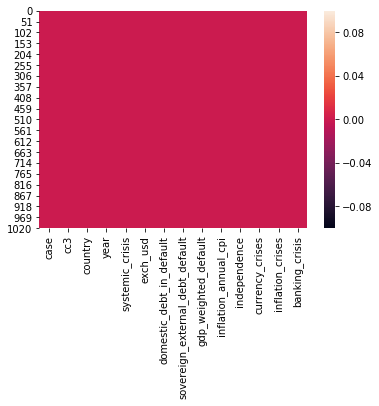

In [8]:
sns.heatmap(df.isna())

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [11]:
# Data Visualization

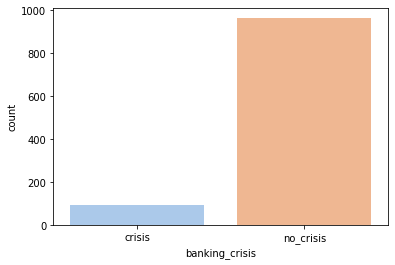

In [12]:
sns.countplot(df.banking_crisis,palette='pastel')

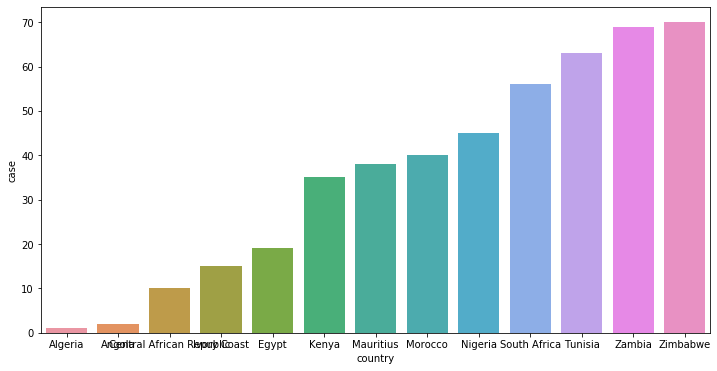

In [13]:
plt.subplots(figsize=(12,6))
sns.barplot(df.country,df.case)


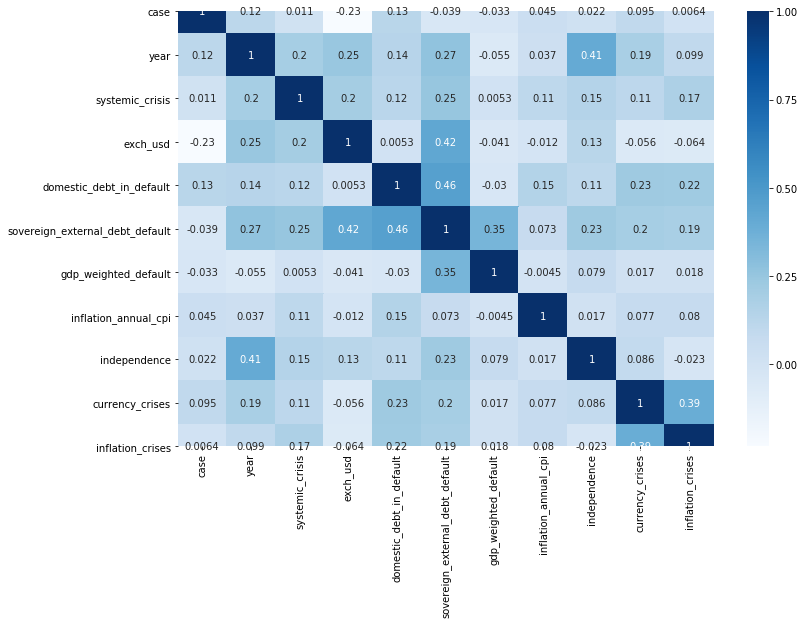

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

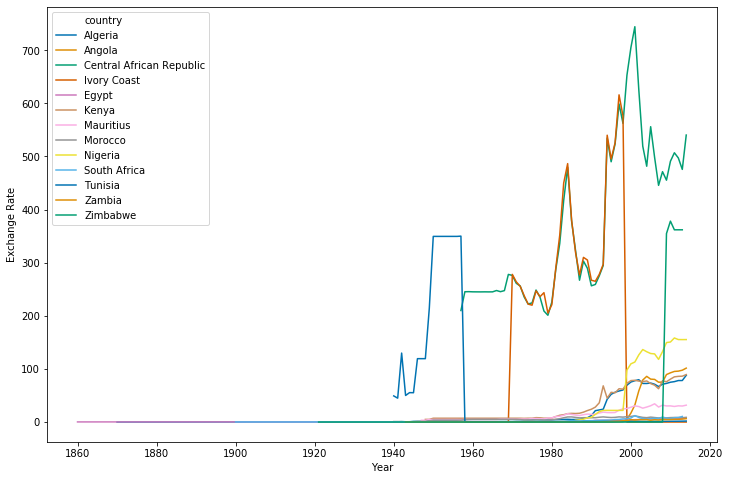

In [15]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'year', y = 'exch_usd', hue = 'country', data = df, palette = 'colorblind')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
display()

In [16]:
df=df.drop(['case','cc3','country','year'],axis=1)

In [17]:
df.sample(5)

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
828,0,119.300000,0,0,0.0,49.612539,0,1,1,no_crisis
484,1,44.838900,0,1,0.0,28.814000,1,0,1,crisis
418,0,3.390000,0,0,0.0,9.361000,1,0,0,crisis
151,0,85.987790,0,0,0.0,43.559000,1,1,1,no_crisis
686,1,21.881838,0,1,0.0,57.143000,1,0,1,crisis


In [18]:
df['banking_crisis']=[1 if i=='crisis' else 0 for i in df.banking_crisis]

In [19]:
df.sample(5)

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
908,0,7.180000e-04,0,0,0.0,3.703704,0,0,0,0
504,0,8.935000e+01,0,0,0.0,6.878000,1,0,0,0
269,0,0.000000e+00,0,1,0.0,4.355000,1,0,0,0
277,0,0.000000e+00,0,1,0.0,1.009000,1,0,0,0
976,0,5.930000e-27,0,0,0.0,-7.017544,0,0,0,0


In [20]:
y=df.banking_crisis
x=df.drop('banking_crisis',axis=1)

In [21]:
x.shape,y.shape

((1059, 9), (1059,))

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [23]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [24]:
# Model Building

In [25]:
def create_model(optimizer='rmsprop',init='glorot_uniform'):
    model=Sequential()
    model.add(Dense(64,activation='relu',init=init,input_dim=xtrain.shape[1]))
    model.add(Dense(32,activation='relu',init=init))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [26]:
estimator=KerasClassifier(build_fn=create_model,verbose=1)
optimizers=['rmsprop','adam']
init=['glorot_uniform','uniform','normal']
epochs=np.array([50,100,150])
batches=np.array([5,10,20])

param_grid=dict(optimizer=optimizers,epochs=epochs,init=init,batch_size=batches)
grid=GridSearchCV(estimator,param_grid=param_grid)
scores=grid.fit(xtrain,ytrain)

Epoch 1/50
564/564 [==============================] - 1s 1ms/step - loss: 0.2829 - accuracy: 0.9202
Epoch 2/50
564/564 [==============================] - 0s 679us/step - loss: 0.1280 - accuracy: 0.9734
Epoch 3/50
564/564 [==============================] - 0s 447us/step - loss: 0.1052 - accuracy: 0.9752
Epoch 4/50
564/564 [==============================] - 0s 359us/step - loss: 0.1068 - accuracy: 0.9752
Epoch 5/50
564/564 [==============================] - 0s 348us/step - loss: 0.1076 - accuracy: 0.9752
Epoch 6/50
564/564 [==============================] - 0s 484us/step - loss: 0.1081 - accuracy: 0.9752
Epoch 7/50
564/564 [==============================] - 0s 392us/step - loss: 0.1033 - accuracy: 0.9752
Epoch 8/50
564/564 [==============================] - 0s 639us/step - loss: 0.1057 - accuracy: 0.9770
Epoch 9/50
564/564 [==============================] - 0s 504us/step - loss: 0.1050 - accuracy: 0.9752
Epoch 10/50
564/564 [==============================] - 0s 491us/step - loss: 0.0946 

565/565 [==============================] - 0s 476us/step - loss: 0.0679 - accuracy: 0.9841
Epoch 30/50
565/565 [==============================] - 0s 412us/step - loss: 0.0695 - accuracy: 0.9841
Epoch 31/50
565/565 [==============================] - 0s 429us/step - loss: 0.0740 - accuracy: 0.9823
Epoch 32/50
565/565 [==============================] - 0s 361us/step - loss: 0.0762 - accuracy: 0.9841
Epoch 33/50
565/565 [==============================] - 0s 499us/step - loss: 0.0770 - accuracy: 0.9841
Epoch 34/50
565/565 [==============================] - 0s 661us/step - loss: 0.0717 - accuracy: 0.9841
Epoch 35/50
565/565 [==============================] - 0s 511us/step - loss: 0.0731 - accuracy: 0.9841
Epoch 36/50
565/565 [==============================] - 0s 355us/step - loss: 0.0717 - accuracy: 0.9841
Epoch 37/50
565/565 [==============================] - 0s 335us/step - loss: 0.0708 - accuracy: 0.9823
Epoch 38/50
565/565 [==============================] - 0s 359us/step - loss: 0.0747 -

564/564 [==============================] - 0s 378us/step - loss: 0.0884 - accuracy: 0.9770
Epoch 8/50
564/564 [==============================] - 0s 384us/step - loss: 0.0859 - accuracy: 0.9770
Epoch 9/50
564/564 [==============================] - 0s 497us/step - loss: 0.0831 - accuracy: 0.9787
Epoch 10/50
564/564 [==============================] - 0s 666us/step - loss: 0.0822 - accuracy: 0.9787
Epoch 11/50
564/564 [==============================] - 0s 692us/step - loss: 0.0805 - accuracy: 0.9787
Epoch 12/50
564/564 [==============================] - 0s 460us/step - loss: 0.0807 - accuracy: 0.9770
Epoch 13/50
564/564 [==============================] - 0s 412us/step - loss: 0.0809 - accuracy: 0.9787
Epoch 14/50
564/564 [==============================] - 0s 402us/step - loss: 0.0789 - accuracy: 0.9805
Epoch 15/50
564/564 [==============================] - 0s 385us/step - loss: 0.0795 - accuracy: 0.9805
Epoch 16/50
564/564 [==============================] - 0s 673us/step - loss: 0.0784 - a

565/565 [==============================] - 0s 449us/step - loss: 0.0628 - accuracy: 0.9823
Epoch 36/50
565/565 [==============================] - 0s 433us/step - loss: 0.0625 - accuracy: 0.9823
Epoch 37/50
565/565 [==============================] - 0s 574us/step - loss: 0.0606 - accuracy: 0.9841
Epoch 38/50
565/565 [==============================] - 0s 597us/step - loss: 0.0605 - accuracy: 0.9823
Epoch 39/50
565/565 [==============================] - 0s 440us/step - loss: 0.0622 - accuracy: 0.9841
Epoch 40/50
565/565 [==============================] - 0s 455us/step - loss: 0.0620 - accuracy: 0.9841
Epoch 41/50
565/565 [==============================] - 0s 357us/step - loss: 0.0607 - accuracy: 0.9841
Epoch 42/50
565/565 [==============================] - 0s 450us/step - loss: 0.0623 - accuracy: 0.9841
Epoch 43/50
565/565 [==============================] - 0s 787us/step - loss: 0.0613 - accuracy: 0.9823
Epoch 44/50
565/565 [==============================] - 0s 456us/step - loss: 0.0615 -

Epoch 13/50
564/564 [==============================] - 0s 437us/step - loss: 0.0979 - accuracy: 0.9752
Epoch 14/50
564/564 [==============================] - 0s 343us/step - loss: 0.1030 - accuracy: 0.9770
Epoch 15/50
564/564 [==============================] - 0s 383us/step - loss: 0.1016 - accuracy: 0.9752
Epoch 16/50
564/564 [==============================] - 0s 668us/step - loss: 0.1016 - accuracy: 0.9770
Epoch 17/50
564/564 [==============================] - 0s 693us/step - loss: 0.1011 - accuracy: 0.9770
Epoch 18/50
564/564 [==============================] - 0s 393us/step - loss: 0.1029 - accuracy: 0.9770
Epoch 19/50
564/564 [==============================] - 0s 354us/step - loss: 0.0967 - accuracy: 0.9770
Epoch 20/50
564/564 [==============================] - 0s 488us/step - loss: 0.1014 - accuracy: 0.9770
Epoch 21/50
564/564 [==============================] - 0s 477us/step - loss: 0.0974 - accuracy: 0.97700s - loss: 0.0984 - accuracy
Epoch 22/50
564/564 [========================

565/565 [==============================] - 0s 516us/step - loss: 0.0753 - accuracy: 0.9805
Epoch 42/50
565/565 [==============================] - 0s 505us/step - loss: 0.0729 - accuracy: 0.9841
Epoch 43/50
565/565 [==============================] - 0s 699us/step - loss: 0.0739 - accuracy: 0.9823
Epoch 44/50
565/565 [==============================] - 0s 455us/step - loss: 0.0804 - accuracy: 0.9823
Epoch 45/50
565/565 [==============================] - 0s 412us/step - loss: 0.0707 - accuracy: 0.9823
Epoch 46/50
565/565 [==============================] - 0s 355us/step - loss: 0.0775 - accuracy: 0.9841
Epoch 47/50
565/565 [==============================] - 0s 412us/step - loss: 0.0693 - accuracy: 0.9841
Epoch 48/50
565/565 [==============================] - 0s 542us/step - loss: 0.0741 - accuracy: 0.9823
Epoch 49/50
565/565 [==============================] - 0s 757us/step - loss: 0.0715 - accuracy: 0.9841
Epoch 50/50
282/282 [==============================] - 0s 443us/step
Epoch 1/50
565/5

564/564 [==============================] - 0s 406us/step - loss: 0.0789 - accuracy: 0.9823
Epoch 20/50
564/564 [==============================] - 0s 646us/step - loss: 0.0776 - accuracy: 0.9805
Epoch 21/50
564/564 [==============================] - 0s 682us/step - loss: 0.0777 - accuracy: 0.9823
Epoch 22/50
564/564 [==============================] - 0s 498us/step - loss: 0.0788 - accuracy: 0.9823
Epoch 23/50
564/564 [==============================] - 0s 612us/step - loss: 0.0756 - accuracy: 0.9823
Epoch 24/50
564/564 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.98 - 0s 419us/step - loss: 0.0777 - accuracy: 0.9823
Epoch 25/50
564/564 [==============================] - 0s 535us/step - loss: 0.0757 - accuracy: 0.9823
Epoch 26/50
564/564 [==============================] - 0s 616us/step - loss: 0.0749 - accuracy: 0.9823
Epoch 27/50
564/564 [==============================] - 0s 518us/step - loss: 0.0766 - accuracy: 0.9823
Epoch 28/50
564/564 [======================

565/565 [==============================] - 0s 417us/step - loss: 0.0621 - accuracy: 0.9823
Epoch 47/50
565/565 [==============================] - 1s 917us/step - loss: 0.0618 - accuracy: 0.9823
Epoch 48/50
565/565 [==============================] - 0s 522us/step - loss: 0.0617 - accuracy: 0.9823
Epoch 49/50
565/565 [==============================] - 0s 388us/step - loss: 0.0618 - accuracy: 0.9823
Epoch 50/50
282/282 [==============================] - 0s 509us/step
Epoch 1/50
565/565 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.9168
Epoch 2/50
565/565 [==============================] - 0s 567us/step - loss: 0.1221 - accuracy: 0.9681
Epoch 3/50
565/565 [==============================] - 0s 617us/step - loss: 0.1023 - accuracy: 0.9752
Epoch 4/50
565/565 [==============================] - 0s 470us/step - loss: 0.0971 - accuracy: 0.9752
Epoch 5/50
565/565 [==============================] - 0s 389us/step - loss: 0.0949 - accuracy: 0.9735
Epoch 6/50
565/565 [===

564/564 [==============================] - 0s 396us/step - loss: 0.1042 - accuracy: 0.9770
Epoch 25/50
564/564 [==============================] - 0s 423us/step - loss: 0.1043 - accuracy: 0.9734
Epoch 26/50
564/564 [==============================] - 0s 603us/step - loss: 0.1032 - accuracy: 0.9770
Epoch 27/50
564/564 [==============================] - 0s 488us/step - loss: 0.0987 - accuracy: 0.9752
Epoch 28/50
564/564 [==============================] - 0s 488us/step - loss: 0.1021 - accuracy: 0.9770
Epoch 29/50
564/564 [==============================] - 0s 349us/step - loss: 0.0929 - accuracy: 0.9770
Epoch 30/50
564/564 [==============================] - 0s 348us/step - loss: 0.1003 - accuracy: 0.9770
Epoch 31/50
564/564 [==============================] - 0s 484us/step - loss: 0.0946 - accuracy: 0.9752
Epoch 32/50
564/564 [==============================] - 0s 776us/step - loss: 0.0976 - accuracy: 0.9770
Epoch 33/50
564/564 [==============================] - 0s 348us/step - loss: 0.0937 -

565/565 [==============================] - 0s 586us/step - loss: 0.1344 - accuracy: 0.9646
Epoch 3/50
565/565 [==============================] - 0s 428us/step - loss: 0.1161 - accuracy: 0.9717
Epoch 4/50
565/565 [==============================] - 0s 363us/step - loss: 0.1021 - accuracy: 0.9735
Epoch 5/50
565/565 [==============================] - 0s 477us/step - loss: 0.1092 - accuracy: 0.9735
Epoch 6/50
565/565 [==============================] - 0s 376us/step - loss: 0.0992 - accuracy: 0.9752
Epoch 7/50
565/565 [==============================] - 0s 587us/step - loss: 0.1036 - accuracy: 0.9752
Epoch 8/50
565/565 [==============================] - 0s 740us/step - loss: 0.1021 - accuracy: 0.9752
Epoch 9/50
565/565 [==============================] - 0s 374us/step - loss: 0.0999 - accuracy: 0.9770
Epoch 10/50
565/565 [==============================] - 0s 384us/step - loss: 0.1061 - accuracy: 0.9752
Epoch 11/50
565/565 [==============================] - 0s 397us/step - loss: 0.1024 - accura

564/564 [==============================] - 0s 426us/step - loss: 0.0734 - accuracy: 0.9823
Epoch 31/50
564/564 [==============================] - 0s 626us/step - loss: 0.0720 - accuracy: 0.9805
Epoch 32/50
564/564 [==============================] - 0s 629us/step - loss: 0.0746 - accuracy: 0.9805
Epoch 33/50
564/564 [==============================] - 0s 439us/step - loss: 0.0712 - accuracy: 0.9823
Epoch 34/50
564/564 [==============================] - 0s 413us/step - loss: 0.0723 - accuracy: 0.9823
Epoch 35/50
564/564 [==============================] - 0s 400us/step - loss: 0.0710 - accuracy: 0.9823
Epoch 36/50
564/564 [==============================] - 0s 878us/step - loss: 0.0711 - accuracy: 0.9823
Epoch 37/50
564/564 [==============================] - 0s 504us/step - loss: 0.0716 - accuracy: 0.9840
Epoch 38/50
564/564 [==============================] - 0s 401us/step - loss: 0.0711 - accuracy: 0.9823
Epoch 39/50
564/564 [==============================] - 0s 401us/step - loss: 0.0716 -

565/565 [==============================] - 0s 406us/step - loss: 0.0933 - accuracy: 0.9752
Epoch 9/50
565/565 [==============================] - 0s 457us/step - loss: 0.0901 - accuracy: 0.9752
Epoch 10/50
565/565 [==============================] - 0s 422us/step - loss: 0.0903 - accuracy: 0.9752
Epoch 11/50
565/565 [==============================] - 0s 665us/step - loss: 0.0888 - accuracy: 0.9752
Epoch 12/50
565/565 [==============================] - 0s 608us/step - loss: 0.0889 - accuracy: 0.9752
Epoch 13/50
565/565 [==============================] - 0s 568us/step - loss: 0.0871 - accuracy: 0.9735
Epoch 14/50
565/565 [==============================] - 0s 379us/step - loss: 0.0885 - accuracy: 0.9735
Epoch 15/50
565/565 [==============================] - 0s 568us/step - loss: 0.0852 - accuracy: 0.9735
Epoch 16/50
565/565 [==============================] - 1s 914us/step - loss: 0.0837 - accuracy: 0.9752
Epoch 17/50
565/565 [==============================] - 0s 599us/step - loss: 0.0837 - 

564/564 [==============================] - 0s 545us/step - loss: 0.0856 - accuracy: 0.9805
Epoch 37/100
564/564 [==============================] - 0s 688us/step - loss: 0.0907 - accuracy: 0.9823
Epoch 38/100
564/564 [==============================] - 0s 355us/step - loss: 0.0909 - accuracy: 0.9823
Epoch 39/100
564/564 [==============================] - 0s 365us/step - loss: 0.0854 - accuracy: 0.9823
Epoch 40/100
564/564 [==============================] - 0s 348us/step - loss: 0.0949 - accuracy: 0.9823
Epoch 41/100
564/564 [==============================] - 0s 363us/step - loss: 0.0872 - accuracy: 0.9805
Epoch 42/100
564/564 [==============================] - 0s 630us/step - loss: 0.0844 - accuracy: 0.9823
Epoch 43/100
564/564 [==============================] - 0s 575us/step - loss: 0.0970 - accuracy: 0.9805
Epoch 44/100
564/564 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.98 - 0s 421us/step - loss: 0.0899 - accuracy: 0.9840
Epoch 45/100
564/564 [=============

565/565 [==============================] - 0s 537us/step - loss: 0.0752 - accuracy: 0.9823
Epoch 14/100
565/565 [==============================] - 0s 605us/step - loss: 0.0717 - accuracy: 0.9805
Epoch 15/100
565/565 [==============================] - 0s 495us/step - loss: 0.0736 - accuracy: 0.9823
Epoch 16/100
565/565 [==============================] - 0s 344us/step - loss: 0.0738 - accuracy: 0.9823
Epoch 17/100
565/565 [==============================] - 0s 358us/step - loss: 0.0720 - accuracy: 0.9841
Epoch 18/100
565/565 [==============================] - 0s 342us/step - loss: 0.0723 - accuracy: 0.9788
Epoch 19/100
565/565 [==============================] - 0s 515us/step - loss: 0.0719 - accuracy: 0.9841
Epoch 20/100
565/565 [==============================] - 0s 798us/step - loss: 0.0687 - accuracy: 0.9841
Epoch 21/100
565/565 [==============================] - 0s 360us/step - loss: 0.0740 - accuracy: 0.9841
Epoch 22/100
565/565 [==============================] - 0s 347us/step - loss:

565/565 [==============================] - 0s 416us/step - loss: 0.0667 - accuracy: 0.9841
Epoch 92/100
565/565 [==============================] - 0s 379us/step - loss: 0.0693 - accuracy: 0.9841
Epoch 93/100
565/565 [==============================] - 0s 357us/step - loss: 0.0745 - accuracy: 0.9841
Epoch 94/100
565/565 [==============================] - 0s 591us/step - loss: 0.0692 - accuracy: 0.9841
Epoch 95/100
565/565 [==============================] - 0s 581us/step - loss: 0.0759 - accuracy: 0.9841
Epoch 96/100
565/565 [==============================] - 0s 512us/step - loss: 0.0707 - accuracy: 0.9841
Epoch 97/100
565/565 [==============================] - 0s 356us/step - loss: 0.0778 - accuracy: 0.9841
Epoch 98/100
565/565 [==============================] - 0s 497us/step - loss: 0.0732 - accuracy: 0.9841
Epoch 99/100
565/565 [==============================] - 0s 358us/step - loss: 0.0715 - accuracy: 0.9823
Epoch 100/100
282/282 [==============================] - 0s 925us/step
Epoch 

565/565 [==============================] - 0s 404us/step - loss: 0.0798 - accuracy: 0.9788
Epoch 69/100
565/565 [==============================] - 0s 418us/step - loss: 0.0813 - accuracy: 0.9788
Epoch 70/100
565/565 [==============================] - 0s 808us/step - loss: 0.0863 - accuracy: 0.9788
Epoch 71/100
565/565 [==============================] - 0s 427us/step - loss: 0.0824 - accuracy: 0.9788
Epoch 72/100
565/565 [==============================] - 0s 434us/step - loss: 0.0826 - accuracy: 0.9788
Epoch 73/100
565/565 [==============================] - 0s 374us/step - loss: 0.0807 - accuracy: 0.9788
Epoch 74/100
565/565 [==============================] - 0s 539us/step - loss: 0.0797 - accuracy: 0.9788
Epoch 75/100
565/565 [==============================] - 0s 552us/step - loss: 0.0851 - accuracy: 0.9805
Epoch 76/100
565/565 [==============================] - 0s 603us/step - loss: 0.0847 - accuracy: 0.9770
Epoch 77/100
565/565 [==============================] - 0s 481us/step - loss:

564/564 [==============================] - 0s 401us/step - loss: 0.0725 - accuracy: 0.9823
Epoch 47/100
564/564 [==============================] - 0s 662us/step - loss: 0.0707 - accuracy: 0.98230s - loss: 0.0868 - accura
Epoch 48/100
564/564 [==============================] - 0s 620us/step - loss: 0.0705 - accuracy: 0.9840
Epoch 49/100
564/564 [==============================] - 0s 376us/step - loss: 0.0703 - accuracy: 0.9840
Epoch 50/100
564/564 [==============================] - 0s 400us/step - loss: 0.0715 - accuracy: 0.9823
Epoch 51/100
564/564 [==============================] - 0s 518us/step - loss: 0.0711 - accuracy: 0.9840
Epoch 52/100
564/564 [==============================] - 0s 401us/step - loss: 0.0683 - accuracy: 0.9823
Epoch 53/100
564/564 [==============================] - 0s 673us/step - loss: 0.0704 - accuracy: 0.9840
Epoch 54/100
564/564 [==============================] - 0s 684us/step - loss: 0.0702 - accuracy: 0.9823
Epoch 55/100
564/564 [=============================

565/565 [==============================] - 0s 466us/step - loss: 0.0620 - accuracy: 0.9841
Epoch 24/100
565/565 [==============================] - 0s 567us/step - loss: 0.0625 - accuracy: 0.9823
Epoch 25/100
565/565 [==============================] - 0s 645us/step - loss: 0.0616 - accuracy: 0.9841
Epoch 26/100
565/565 [==============================] - 0s 490us/step - loss: 0.0629 - accuracy: 0.9823
Epoch 27/100
565/565 [==============================] - 0s 390us/step - loss: 0.0619 - accuracy: 0.9823
Epoch 28/100
565/565 [==============================] - 0s 391us/step - loss: 0.0631 - accuracy: 0.9841
Epoch 29/100
565/565 [==============================] - 0s 849us/step - loss: 0.0599 - accuracy: 0.9841
Epoch 30/100
565/565 [==============================] - 0s 580us/step - loss: 0.0646 - accuracy: 0.9805
Epoch 31/100
565/565 [==============================] - 0s 391us/step - loss: 0.0619 - accuracy: 0.9841
Epoch 32/100
565/565 [==============================] - 0s 387us/step - loss:

565/565 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8973
Epoch 2/100
565/565 [==============================] - 0s 619us/step - loss: 0.1257 - accuracy: 0.9717
Epoch 3/100
565/565 [==============================] - 0s 711us/step - loss: 0.1021 - accuracy: 0.9752
Epoch 4/100
565/565 [==============================] - 0s 421us/step - loss: 0.0975 - accuracy: 0.9717
Epoch 5/100
565/565 [==============================] - 0s 395us/step - loss: 0.0947 - accuracy: 0.9717
Epoch 6/100
565/565 [==============================] - 0s 410us/step - loss: 0.0946 - accuracy: 0.96810s - loss: 0.1192 - accuracy: 0.
Epoch 7/100
565/565 [==============================] - 0s 715us/step - loss: 0.0898 - accuracy: 0.9752
Epoch 8/100
565/565 [==============================] - 0s 587us/step - loss: 0.0904 - accuracy: 0.9699
Epoch 9/100
565/565 [==============================] - 0s 407us/step - loss: 0.0876 - accuracy: 0.9717
Epoch 10/100
565/565 [==============================] -

565/565 [==============================] - 0s 601us/step - loss: 0.0713 - accuracy: 0.9788
Epoch 80/100
565/565 [==============================] - 0s 779us/step - loss: 0.0729 - accuracy: 0.9788
Epoch 81/100
565/565 [==============================] - 1s 1ms/step - loss: 0.0731 - accuracy: 0.9805
Epoch 82/100
565/565 [==============================] - 0s 629us/step - loss: 0.0742 - accuracy: 0.9770
Epoch 83/100
565/565 [==============================] - 0s 602us/step - loss: 0.0706 - accuracy: 0.9788
Epoch 84/100
565/565 [==============================] - 0s 824us/step - loss: 0.0721 - accuracy: 0.9788
Epoch 85/100
565/565 [==============================] - 0s 800us/step - loss: 0.0724 - accuracy: 0.9805
Epoch 86/100
565/565 [==============================] - 0s 630us/step - loss: 0.0722 - accuracy: 0.9788
Epoch 87/100
565/565 [==============================] - 0s 469us/step - loss: 0.0714 - accuracy: 0.9788
Epoch 88/100
565/565 [==============================] - 0s 588us/step - loss: 0

564/564 [==============================] - 0s 367us/step - loss: 0.0856 - accuracy: 0.9823
Epoch 58/100
564/564 [==============================] - 0s 353us/step - loss: 0.0854 - accuracy: 0.9823
Epoch 59/100
564/564 [==============================] - 0s 426us/step - loss: 0.0870 - accuracy: 0.9823
Epoch 60/100
564/564 [==============================] - 0s 423us/step - loss: 0.0865 - accuracy: 0.9823
Epoch 61/100
564/564 [==============================] - 0s 573us/step - loss: 0.0784 - accuracy: 0.9823
Epoch 62/100
564/564 [==============================] - 0s 689us/step - loss: 0.0905 - accuracy: 0.9823
Epoch 63/100
564/564 [==============================] - 0s 702us/step - loss: 0.0852 - accuracy: 0.9823
Epoch 64/100
564/564 [==============================] - 0s 382us/step - loss: 0.0855 - accuracy: 0.9823
Epoch 65/100
564/564 [==============================] - 0s 446us/step - loss: 0.0894 - accuracy: 0.9823
Epoch 66/100
564/564 [==============================] - 0s 531us/step - loss:

565/565 [==============================] - 0s 615us/step - loss: 0.0789 - accuracy: 0.9805
Epoch 35/100
565/565 [==============================] - 0s 361us/step - loss: 0.0770 - accuracy: 0.9823
Epoch 36/100
565/565 [==============================] - 0s 531us/step - loss: 0.0752 - accuracy: 0.9805
Epoch 37/100
565/565 [==============================] - 0s 386us/step - loss: 0.0777 - accuracy: 0.9805
Epoch 38/100
565/565 [==============================] - 0s 356us/step - loss: 0.0734 - accuracy: 0.9823
Epoch 39/100
565/565 [==============================] - 0s 546us/step - loss: 0.0743 - accuracy: 0.9823
Epoch 40/100
565/565 [==============================] - 0s 738us/step - loss: 0.0721 - accuracy: 0.9823
Epoch 41/100
565/565 [==============================] - 0s 529us/step - loss: 0.0712 - accuracy: 0.9788
Epoch 42/100
565/565 [==============================] - 0s 351us/step - loss: 0.0723 - accuracy: 0.9805
Epoch 43/100
565/565 [==============================] - 0s 351us/step - loss:

565/565 [==============================] - 0s 443us/step - loss: 0.1012 - accuracy: 0.9735
Epoch 13/100
565/565 [==============================] - 0s 518us/step - loss: 0.1005 - accuracy: 0.9752
Epoch 14/100
565/565 [==============================] - 0s 409us/step - loss: 0.1009 - accuracy: 0.9770
Epoch 15/100
565/565 [==============================] - 0s 358us/step - loss: 0.0996 - accuracy: 0.9735
Epoch 16/100
565/565 [==============================] - 0s 498us/step - loss: 0.0977 - accuracy: 0.9752
Epoch 17/100
565/565 [==============================] - 0s 644us/step - loss: 0.1046 - accuracy: 0.9770
Epoch 18/100
565/565 [==============================] - 0s 448us/step - loss: 0.0982 - accuracy: 0.9752
Epoch 19/100
565/565 [==============================] - 0s 355us/step - loss: 0.0974 - accuracy: 0.9770
Epoch 20/100
565/565 [==============================] - 0s 356us/step - loss: 0.1020 - accuracy: 0.9770
Epoch 21/100
565/565 [==============================] - 0s 352us/step - loss:

565/565 [==============================] - 0s 512us/step - loss: 0.0864 - accuracy: 0.9770
Epoch 91/100
565/565 [==============================] - 0s 621us/step - loss: 0.0800 - accuracy: 0.9805
Epoch 92/100
565/565 [==============================] - 0s 430us/step - loss: 0.0863 - accuracy: 0.9752
Epoch 93/100
565/565 [==============================] - 0s 421us/step - loss: 0.0857 - accuracy: 0.9752
Epoch 94/100
565/565 [==============================] - 0s 388us/step - loss: 0.0846 - accuracy: 0.9788
Epoch 95/100
565/565 [==============================] - 0s 374us/step - loss: 0.0857 - accuracy: 0.9770
Epoch 96/100
565/565 [==============================] - 0s 540us/step - loss: 0.0828 - accuracy: 0.9788
Epoch 97/100
565/565 [==============================] - 0s 766us/step - loss: 0.0812 - accuracy: 0.9788
Epoch 98/100
565/565 [==============================] - 0s 369us/step - loss: 0.0868 - accuracy: 0.9770
Epoch 99/100
565/565 [==============================] - 0s 354us/step - loss:

564/564 [==============================] - 0s 429us/step - loss: 0.0672 - accuracy: 0.9840
Epoch 68/100
564/564 [==============================] - 0s 458us/step - loss: 0.0702 - accuracy: 0.9840
Epoch 69/100
564/564 [==============================] - 0s 605us/step - loss: 0.0674 - accuracy: 0.9840
Epoch 70/100
564/564 [==============================] - 0s 710us/step - loss: 0.0689 - accuracy: 0.9840
Epoch 71/100
564/564 [==============================] - 0s 411us/step - loss: 0.0675 - accuracy: 0.9840
Epoch 72/100
564/564 [==============================] - 0s 417us/step - loss: 0.0674 - accuracy: 0.9840
Epoch 73/100
564/564 [==============================] - 0s 408us/step - loss: 0.0690 - accuracy: 0.9840
Epoch 74/100
564/564 [==============================] - 0s 690us/step - loss: 0.0680 - accuracy: 0.9840
Epoch 75/100
564/564 [==============================] - 0s 683us/step - loss: 0.0670 - accuracy: 0.9840
Epoch 76/100
564/564 [==============================] - 0s 460us/step - loss:

Epoch 45/100
565/565 [==============================] - 0s 539us/step - loss: 0.0587 - accuracy: 0.9841
Epoch 46/100
565/565 [==============================] - 0s 624us/step - loss: 0.0615 - accuracy: 0.9805
Epoch 47/100
565/565 [==============================] - 0s 561us/step - loss: 0.0628 - accuracy: 0.9805
Epoch 48/100
565/565 [==============================] - 0s 392us/step - loss: 0.0600 - accuracy: 0.9805
Epoch 49/100
565/565 [==============================] - 0s 406us/step - loss: 0.0592 - accuracy: 0.9823
Epoch 50/100
565/565 [==============================] - 0s 399us/step - loss: 0.0604 - accuracy: 0.98410s - loss: 0.0713 - accuracy: 
Epoch 51/100
565/565 [==============================] - 1s 929us/step - loss: 0.0599 - accuracy: 0.9841
Epoch 52/100
565/565 [==============================] - 0s 552us/step - loss: 0.0599 - accuracy: 0.9841
Epoch 53/100
565/565 [==============================] - 0s 387us/step - loss: 0.0609 - accuracy: 0.9823
Epoch 54/100
565/565 [============

565/565 [==============================] - 0s 635us/step - loss: 0.0851 - accuracy: 0.9788
Epoch 23/100
565/565 [==============================] - 0s 531us/step - loss: 0.0838 - accuracy: 0.97520s - loss: 0.0407 - accuracy
Epoch 24/100
565/565 [==============================] - 0s 439us/step - loss: 0.0841 - accuracy: 0.9752
Epoch 25/100
565/565 [==============================] - 0s 510us/step - loss: 0.0892 - accuracy: 0.9770
Epoch 26/100
565/565 [==============================] - 0s 409us/step - loss: 0.0842 - accuracy: 0.9752
Epoch 27/100
565/565 [==============================] - 0s 703us/step - loss: 0.0842 - accuracy: 0.97350s - loss: 0.1071 - accu
Epoch 28/100
565/565 [==============================] - 0s 823us/step - loss: 0.0817 - accuracy: 0.9788
Epoch 29/100
565/565 [==============================] - 0s 453us/step - loss: 0.0830 - accuracy: 0.9752
Epoch 30/100
565/565 [==============================] - 0s 474us/step - loss: 0.0806 - accuracy: 0.9770
Epoch 31/100
565/565 [===

565/565 [==============================] - 0s 644us/step - loss: 0.0713 - accuracy: 0.9805
Epoch 100/100
282/282 [==============================] - 0s 476us/step
Epoch 1/100
564/564 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.9078
Epoch 2/100
564/564 [==============================] - 0s 358us/step - loss: 0.1285 - accuracy: 0.9592
Epoch 3/100
564/564 [==============================] - 0s 494us/step - loss: 0.1106 - accuracy: 0.9752
Epoch 4/100
564/564 [==============================] - 0s 566us/step - loss: 0.1070 - accuracy: 0.9752
Epoch 5/100
564/564 [==============================] - 0s 546us/step - loss: 0.1060 - accuracy: 0.9752
Epoch 6/100
564/564 [==============================] - 0s 346us/step - loss: 0.1104 - accuracy: 0.9770
Epoch 7/100
564/564 [==============================] - 0s 483us/step - loss: 0.1079 - accuracy: 0.9752
Epoch 8/100
564/564 [==============================] - 0s 423us/step - loss: 0.1014 - accuracy: 0.9770
Epoch 9/100
564/

564/564 [==============================] - 0s 750us/step - loss: 0.0878 - accuracy: 0.9770
Epoch 78/100
564/564 [==============================] - 0s 391us/step - loss: 0.0854 - accuracy: 0.9787
Epoch 79/100
564/564 [==============================] - 0s 356us/step - loss: 0.0888 - accuracy: 0.9805
Epoch 80/100
564/564 [==============================] - 0s 356us/step - loss: 0.0885 - accuracy: 0.9787
Epoch 81/100
564/564 [==============================] - 0s 365us/step - loss: 0.0839 - accuracy: 0.9787
Epoch 82/100
564/564 [==============================] - 0s 648us/step - loss: 0.0878 - accuracy: 0.9770
Epoch 83/100
564/564 [==============================] - 0s 617us/step - loss: 0.0857 - accuracy: 0.9787
Epoch 84/100
564/564 [==============================] - 0s 419us/step - loss: 0.0855 - accuracy: 0.9770
Epoch 85/100
564/564 [==============================] - 0s 395us/step - loss: 0.0849 - accuracy: 0.9787
Epoch 86/100
564/564 [==============================] - 0s 484us/step - loss:

565/565 [==============================] - 0s 764us/step - loss: 0.0751 - accuracy: 0.9805
Epoch 56/100
565/565 [==============================] - 0s 348us/step - loss: 0.0742 - accuracy: 0.9841
Epoch 57/100
565/565 [==============================] - 0s 354us/step - loss: 0.0770 - accuracy: 0.9841
Epoch 58/100
565/565 [==============================] - 0s 363us/step - loss: 0.0734 - accuracy: 0.9823
Epoch 59/100
565/565 [==============================] - 0s 486us/step - loss: 0.0754 - accuracy: 0.9841
Epoch 60/100
565/565 [==============================] - 0s 627us/step - loss: 0.0727 - accuracy: 0.9823
Epoch 61/100
565/565 [==============================] - 0s 566us/step - loss: 0.0736 - accuracy: 0.9841
Epoch 62/100
565/565 [==============================] - 0s 357us/step - loss: 0.0749 - accuracy: 0.9841
Epoch 63/100
565/565 [==============================] - 0s 371us/step - loss: 0.0756 - accuracy: 0.9841
Epoch 64/100
565/565 [==============================] - 0s 446us/step - loss:

565/565 [==============================] - 0s 369us/step - loss: 0.0976 - accuracy: 0.9770
Epoch 33/100
565/565 [==============================] - 0s 361us/step - loss: 0.0951 - accuracy: 0.9770
Epoch 34/100
565/565 [==============================] - 0s 643us/step - loss: 0.0951 - accuracy: 0.9752
Epoch 35/100
565/565 [==============================] - 0s 659us/step - loss: 0.0936 - accuracy: 0.9752
Epoch 36/100
565/565 [==============================] - 0s 343us/step - loss: 0.0935 - accuracy: 0.9752
Epoch 37/100
565/565 [==============================] - 0s 349us/step - loss: 0.0910 - accuracy: 0.9752
Epoch 38/100
565/565 [==============================] - 0s 349us/step - loss: 0.0895 - accuracy: 0.9752
Epoch 39/100
565/565 [==============================] - 0s 345us/step - loss: 0.0962 - accuracy: 0.9770
Epoch 40/100
565/565 [==============================] - 0s 631us/step - loss: 0.0968 - accuracy: 0.9752
Epoch 41/100
565/565 [==============================] - 0s 620us/step - loss:

564/564 [==============================] - 0s 426us/step - loss: 0.0869 - accuracy: 0.9770
Epoch 10/100
564/564 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.97 - 0s 427us/step - loss: 0.0873 - accuracy: 0.9787
Epoch 11/100
564/564 [==============================] - 0s 537us/step - loss: 0.0863 - accuracy: 0.9787
Epoch 12/100
564/564 [==============================] - 0s 706us/step - loss: 0.0858 - accuracy: 0.9787
Epoch 13/100
564/564 [==============================] - 0s 645us/step - loss: 0.0851 - accuracy: 0.9787
Epoch 14/100
564/564 [==============================] - 0s 422us/step - loss: 0.0829 - accuracy: 0.9787
Epoch 15/100
564/564 [==============================] - 0s 575us/step - loss: 0.0816 - accuracy: 0.9787
Epoch 16/100
564/564 [==============================] - 0s 419us/step - loss: 0.0817 - accuracy: 0.9787
Epoch 17/100
564/564 [==============================] - 0s 585us/step - loss: 0.0802 - accuracy: 0.9787
Epoch 18/100
564/564 [=============

Epoch 87/100
564/564 [==============================] - 0s 591us/step - loss: 0.0657 - accuracy: 0.9840
Epoch 88/100
564/564 [==============================] - 0s 745us/step - loss: 0.0671 - accuracy: 0.9840
Epoch 89/100
564/564 [==============================] - 0s 388us/step - loss: 0.0669 - accuracy: 0.9840
Epoch 90/100
564/564 [==============================] - 0s 414us/step - loss: 0.0660 - accuracy: 0.9840
Epoch 91/100
564/564 [==============================] - 0s 412us/step - loss: 0.0657 - accuracy: 0.9840
Epoch 92/100
564/564 [==============================] - 0s 694us/step - loss: 0.0660 - accuracy: 0.98400s - loss: 0.0599 - accu
Epoch 93/100
564/564 [==============================] - 0s 677us/step - loss: 0.0673 - accuracy: 0.9840
Epoch 94/100
564/564 [==============================] - 0s 485us/step - loss: 0.0659 - accuracy: 0.9840
Epoch 95/100
564/564 [==============================] - 0s 404us/step - loss: 0.0673 - accuracy: 0.9840
Epoch 96/100
564/564 [==================

565/565 [==============================] - 0s 399us/step - loss: 0.0600 - accuracy: 0.9823
Epoch 65/100
565/565 [==============================] - 0s 397us/step - loss: 0.0585 - accuracy: 0.9841
Epoch 66/100
565/565 [==============================] - 0s 376us/step - loss: 0.0608 - accuracy: 0.9823
Epoch 67/100
565/565 [==============================] - 0s 601us/step - loss: 0.0591 - accuracy: 0.9841
Epoch 68/100
565/565 [==============================] - 0s 630us/step - loss: 0.0586 - accuracy: 0.9823
Epoch 69/100
565/565 [==============================] - 0s 449us/step - loss: 0.0590 - accuracy: 0.9805
Epoch 70/100
565/565 [==============================] - 0s 397us/step - loss: 0.0586 - accuracy: 0.9841
Epoch 71/100
565/565 [==============================] - 0s 598us/step - loss: 0.0583 - accuracy: 0.9841
Epoch 72/100
565/565 [==============================] - 0s 414us/step - loss: 0.0594 - accuracy: 0.9841
Epoch 73/100
565/565 [==============================] - 0s 661us/step - loss:

565/565 [==============================] - 0s 420us/step - loss: 0.0756 - accuracy: 0.9805
Epoch 43/100
565/565 [==============================] - 0s 404us/step - loss: 0.0789 - accuracy: 0.9788
Epoch 44/100
565/565 [==============================] - 0s 540us/step - loss: 0.0752 - accuracy: 0.9770
Epoch 45/100
565/565 [==============================] - 0s 591us/step - loss: 0.0745 - accuracy: 0.9805
Epoch 46/100
565/565 [==============================] - 0s 559us/step - loss: 0.0774 - accuracy: 0.97520s - loss: 0.0882 - accuracy
Epoch 47/100
565/565 [==============================] - 0s 387us/step - loss: 0.0761 - accuracy: 0.9770
Epoch 48/100
565/565 [==============================] - 0s 580us/step - loss: 0.0752 - accuracy: 0.9788
Epoch 49/100
565/565 [==============================] - 0s 406us/step - loss: 0.0756 - accuracy: 0.9770
Epoch 50/100
565/565 [==============================] - 0s 590us/step - loss: 0.0748 - accuracy: 0.9788
Epoch 51/100
565/565 [===========================

564/564 [==============================] - 0s 596us/step - loss: 0.0973 - accuracy: 0.9770
Epoch 20/150
564/564 [==============================] - 0s 588us/step - loss: 0.1000 - accuracy: 0.9770
Epoch 21/150
564/564 [==============================] - 0s 425us/step - loss: 0.0917 - accuracy: 0.9770
Epoch 22/150
564/564 [==============================] - 0s 439us/step - loss: 0.0978 - accuracy: 0.9770
Epoch 23/150
564/564 [==============================] - 0s 355us/step - loss: 0.0967 - accuracy: 0.9770
Epoch 24/150
564/564 [==============================] - 0s 406us/step - loss: 0.0954 - accuracy: 0.9770
Epoch 25/150
564/564 [==============================] - 0s 787us/step - loss: 0.0925 - accuracy: 0.9770
Epoch 26/150
564/564 [==============================] - 0s 454us/step - loss: 0.0956 - accuracy: 0.9770
Epoch 27/150
564/564 [==============================] - 0s 340us/step - loss: 0.0910 - accuracy: 0.9770
Epoch 28/150
564/564 [==============================] - 0s 348us/step - loss:

564/564 [==============================] - 0s 583us/step - loss: 0.0780 - accuracy: 0.9840
Epoch 98/150
564/564 [==============================] - 0s 357us/step - loss: 0.0829 - accuracy: 0.98400s - loss: 0.0870 - accuracy: 0.
Epoch 99/150
564/564 [==============================] - 0s 505us/step - loss: 0.0836 - accuracy: 0.9840
Epoch 100/150
564/564 [==============================] - 0s 362us/step - loss: 0.0830 - accuracy: 0.9840
Epoch 101/150
564/564 [==============================] - 0s 397us/step - loss: 0.0821 - accuracy: 0.9840
Epoch 102/150
564/564 [==============================] - 0s 611us/step - loss: 0.0811 - accuracy: 0.9840
Epoch 103/150
564/564 [==============================] - 0s 640us/step - loss: 0.0821 - accuracy: 0.9840
Epoch 104/150
564/564 [==============================] - 0s 381us/step - loss: 0.0895 - accuracy: 0.9840
Epoch 105/150
564/564 [==============================] - 0s 339us/step - loss: 0.0794 - accuracy: 0.9840
Epoch 106/150
564/564 [================

565/565 [==============================] - 0s 391us/step - loss: 0.0773 - accuracy: 0.9823
Epoch 25/150
565/565 [==============================] - 0s 507us/step - loss: 0.0731 - accuracy: 0.9823
Epoch 26/150
565/565 [==============================] - 0s 877us/step - loss: 0.0707 - accuracy: 0.9823
Epoch 27/150
565/565 [==============================] - 0s 453us/step - loss: 0.0740 - accuracy: 0.9841
Epoch 28/150
565/565 [==============================] - 0s 376us/step - loss: 0.0747 - accuracy: 0.9823
Epoch 29/150
565/565 [==============================] - 0s 357us/step - loss: 0.0725 - accuracy: 0.9823
Epoch 30/150
565/565 [==============================] - 0s 361us/step - loss: 0.0694 - accuracy: 0.9841
Epoch 31/150
565/565 [==============================] - 0s 709us/step - loss: 0.0778 - accuracy: 0.9841
Epoch 32/150
565/565 [==============================] - 0s 692us/step - loss: 0.0742 - accuracy: 0.9841
Epoch 33/150
565/565 [==============================] - 0s 372us/step - loss:

Epoch 102/150
565/565 [==============================] - 0s 437us/step - loss: 0.0689 - accuracy: 0.9841
Epoch 103/150
565/565 [==============================] - 0s 709us/step - loss: 0.0849 - accuracy: 0.9841
Epoch 104/150
565/565 [==============================] - 0s 553us/step - loss: 0.0756 - accuracy: 0.9841
Epoch 105/150
565/565 [==============================] - 0s 355us/step - loss: 0.0683 - accuracy: 0.9858
Epoch 106/150
565/565 [==============================] - 0s 343us/step - loss: 0.0687 - accuracy: 0.9841
Epoch 107/150
565/565 [==============================] - 0s 347us/step - loss: 0.0708 - accuracy: 0.9841
Epoch 108/150
565/565 [==============================] - 0s 541us/step - loss: 0.0667 - accuracy: 0.9841
Epoch 109/150
565/565 [==============================] - 0s 589us/step - loss: 0.0739 - accuracy: 0.9841
Epoch 110/150
565/565 [==============================] - 0s 538us/step - loss: 0.0694 - accuracy: 0.9841
Epoch 111/150
565/565 [==============================] 

565/565 [==============================] - 0s 475us/step - loss: 0.0883 - accuracy: 0.9752
Epoch 30/150
565/565 [==============================] - 0s 378us/step - loss: 0.0872 - accuracy: 0.97520s - loss: 0.1151 - accuracy
Epoch 31/150
565/565 [==============================] - 0s 347us/step - loss: 0.0889 - accuracy: 0.9752
Epoch 32/150
565/565 [==============================] - 0s 394us/step - loss: 0.0872 - accuracy: 0.9752
Epoch 33/150
565/565 [==============================] - 0s 854us/step - loss: 0.0830 - accuracy: 0.9752
Epoch 34/150
565/565 [==============================] - 0s 411us/step - loss: 0.0828 - accuracy: 0.9735
Epoch 35/150
565/565 [==============================] - 0s 369us/step - loss: 0.0867 - accuracy: 0.9735
Epoch 36/150
565/565 [==============================] - 0s 351us/step - loss: 0.0860 - accuracy: 0.9717
Epoch 37/150
565/565 [==============================] - 0s 398us/step - loss: 0.0825 - accuracy: 0.9752
Epoch 38/150
565/565 [===========================

565/565 [==============================] - 0s 504us/step - loss: 0.0771 - accuracy: 0.9788
Epoch 107/150
565/565 [==============================] - 0s 401us/step - loss: 0.0797 - accuracy: 0.9788
Epoch 108/150
565/565 [==============================] - 0s 415us/step - loss: 0.0773 - accuracy: 0.9805
Epoch 109/150
565/565 [==============================] - 0s 652us/step - loss: 0.0830 - accuracy: 0.9788
Epoch 110/150
565/565 [==============================] - 0s 547us/step - loss: 0.0786 - accuracy: 0.9805
Epoch 111/150
565/565 [==============================] - 0s 442us/step - loss: 0.0872 - accuracy: 0.9805
Epoch 112/150
565/565 [==============================] - 0s 361us/step - loss: 0.0779 - accuracy: 0.9805
Epoch 113/150
565/565 [==============================] - 0s 382us/step - loss: 0.0824 - accuracy: 0.9770
Epoch 114/150
565/565 [==============================] - 0s 568us/step - loss: 0.0811 - accuracy: 0.9788
Epoch 115/150
565/565 [==============================] - 0s 695us/ste

564/564 [==============================] - 0s 470us/step - loss: 0.0724 - accuracy: 0.9823
Epoch 33/150
564/564 [==============================] - 0s 423us/step - loss: 0.0730 - accuracy: 0.9823
Epoch 34/150
564/564 [==============================] - 0s 436us/step - loss: 0.0726 - accuracy: 0.9805
Epoch 35/150
564/564 [==============================] - 0s 603us/step - loss: 0.0717 - accuracy: 0.9805
Epoch 36/150
564/564 [==============================] - 0s 865us/step - loss: 0.0718 - accuracy: 0.9823
Epoch 37/150
564/564 [==============================] - 0s 455us/step - loss: 0.0728 - accuracy: 0.9823
Epoch 38/150
564/564 [==============================] - 0s 516us/step - loss: 0.0715 - accuracy: 0.9823
Epoch 39/150
564/564 [==============================] - 0s 445us/step - loss: 0.0711 - accuracy: 0.9823
Epoch 40/150
564/564 [==============================] - 0s 536us/step - loss: 0.0710 - accuracy: 0.9823
Epoch 41/150
564/564 [==============================] - 0s 625us/step - loss:

564/564 [==============================] - 0s 558us/step - loss: 0.0655 - accuracy: 0.9840
Epoch 111/150
564/564 [==============================] - 0s 500us/step - loss: 0.0656 - accuracy: 0.9840
Epoch 112/150
564/564 [==============================] - 0s 495us/step - loss: 0.0659 - accuracy: 0.9840
Epoch 113/150
564/564 [==============================] - 0s 510us/step - loss: 0.0657 - accuracy: 0.9840
Epoch 114/150
564/564 [==============================] - 0s 690us/step - loss: 0.0659 - accuracy: 0.9840
Epoch 115/150
564/564 [==============================] - 0s 635us/step - loss: 0.0653 - accuracy: 0.9840
Epoch 116/150
564/564 [==============================] - 0s 424us/step - loss: 0.0663 - accuracy: 0.9840
Epoch 117/150
564/564 [==============================] - 0s 421us/step - loss: 0.0648 - accuracy: 0.9840
Epoch 118/150
564/564 [==============================] - 0s 491us/step - loss: 0.0666 - accuracy: 0.9840
Epoch 119/150
564/564 [==============================] - 0s 881us/ste

565/565 [==============================] - 0s 436us/step - loss: 0.0614 - accuracy: 0.9841
Epoch 38/150
565/565 [==============================] - 0s 428us/step - loss: 0.0616 - accuracy: 0.9823
Epoch 39/150
565/565 [==============================] - 0s 634us/step - loss: 0.0604 - accuracy: 0.9823
Epoch 40/150
565/565 [==============================] - 0s 666us/step - loss: 0.0606 - accuracy: 0.9858
Epoch 41/150
565/565 [==============================] - 0s 391us/step - loss: 0.0611 - accuracy: 0.9841
Epoch 42/150
565/565 [==============================] - 0s 396us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 43/150
565/565 [==============================] - 0s 406us/step - loss: 0.0600 - accuracy: 0.9841
Epoch 44/150
565/565 [==============================] - 1s 1ms/step - loss: 0.0630 - accuracy: 0.9805
Epoch 45/150
565/565 [==============================] - 0s 453us/step - loss: 0.0604 - accuracy: 0.9805
Epoch 46/150
565/565 [==============================] - 0s 412us/step - loss: 0

565/565 [==============================] - 0s 423us/step - loss: 0.0534 - accuracy: 0.9858
Epoch 116/150
565/565 [==============================] - 0s 402us/step - loss: 0.0528 - accuracy: 0.9858
Epoch 117/150
565/565 [==============================] - 0s 410us/step - loss: 0.0525 - accuracy: 0.9858
Epoch 118/150
565/565 [==============================] - 0s 784us/step - loss: 0.0544 - accuracy: 0.9841
Epoch 119/150
565/565 [==============================] - 0s 546us/step - loss: 0.0527 - accuracy: 0.9858
Epoch 120/150
565/565 [==============================] - 0s 396us/step - loss: 0.0520 - accuracy: 0.9858
Epoch 121/150
565/565 [==============================] - 0s 403us/step - loss: 0.0539 - accuracy: 0.9858
Epoch 122/150
565/565 [==============================] - 0s 413us/step - loss: 0.0526 - accuracy: 0.9858
Epoch 123/150
565/565 [==============================] - 0s 678us/step - loss: 0.0530 - accuracy: 0.9858
Epoch 124/150
565/565 [==============================] - 0s 705us/ste

565/565 [==============================] - 0s 425us/step - loss: 0.0754 - accuracy: 0.9788
Epoch 44/150
565/565 [==============================] - 0s 425us/step - loss: 0.0744 - accuracy: 0.9770
Epoch 45/150
565/565 [==============================] - 0s 646us/step - loss: 0.0759 - accuracy: 0.9770
Epoch 46/150
565/565 [==============================] - 0s 621us/step - loss: 0.0758 - accuracy: 0.9770
Epoch 47/150
565/565 [==============================] - 0s 503us/step - loss: 0.0739 - accuracy: 0.9805
Epoch 48/150
565/565 [==============================] - 0s 431us/step - loss: 0.0728 - accuracy: 0.97880s - loss: 0.0863 - accuracy
Epoch 49/150
565/565 [==============================] - 0s 716us/step - loss: 0.0743 - accuracy: 0.9788
Epoch 50/150
565/565 [==============================] - 0s 519us/step - loss: 0.0768 - accuracy: 0.9735
Epoch 51/150
565/565 [==============================] - 0s 636us/step - loss: 0.0752 - accuracy: 0.9770
Epoch 52/150
565/565 [===========================

565/565 [==============================] - 0s 423us/step - loss: 0.0691 - accuracy: 0.9805
Epoch 122/150
565/565 [==============================] - 0s 562us/step - loss: 0.0683 - accuracy: 0.9805
Epoch 123/150
565/565 [==============================] - 0s 456us/step - loss: 0.0689 - accuracy: 0.9823
Epoch 124/150
565/565 [==============================] - 0s 529us/step - loss: 0.0711 - accuracy: 0.9752
Epoch 125/150
565/565 [==============================] - 0s 785us/step - loss: 0.0692 - accuracy: 0.9788
Epoch 126/150
565/565 [==============================] - 0s 426us/step - loss: 0.0695 - accuracy: 0.9823
Epoch 127/150
565/565 [==============================] - 0s 429us/step - loss: 0.0677 - accuracy: 0.9841
Epoch 128/150
565/565 [==============================] - 0s 436us/step - loss: 0.0688 - accuracy: 0.9823
Epoch 129/150
565/565 [==============================] - 0s 453us/step - loss: 0.0682 - accuracy: 0.9823
Epoch 130/150
565/565 [==============================] - 1s 896us/ste

Epoch 48/150
564/564 [==============================] - 0s 409us/step - loss: 0.0932 - accuracy: 0.9770
Epoch 49/150
564/564 [==============================] - 0s 492us/step - loss: 0.0882 - accuracy: 0.9770
Epoch 50/150
564/564 [==============================] - 0s 492us/step - loss: 0.0932 - accuracy: 0.9770
Epoch 51/150
564/564 [==============================] - 0s 614us/step - loss: 0.0864 - accuracy: 0.9770
Epoch 52/150
564/564 [==============================] - 0s 640us/step - loss: 0.0906 - accuracy: 0.9770
Epoch 53/150
564/564 [==============================] - 0s 382us/step - loss: 0.0949 - accuracy: 0.9770
Epoch 54/150
564/564 [==============================] - 0s 487us/step - loss: 0.0905 - accuracy: 0.9770
Epoch 55/150
564/564 [==============================] - 0s 430us/step - loss: 0.0919 - accuracy: 0.9770
Epoch 56/150
564/564 [==============================] - 0s 435us/step - loss: 0.0961 - accuracy: 0.9770
Epoch 57/150
564/564 [==============================] - 0s 581us

564/564 [==============================] - 0s 621us/step - loss: 0.0833 - accuracy: 0.98400s - loss: 0.0592 - accuracy: 
Epoch 126/150
564/564 [==============================] - 0s 723us/step - loss: 0.0826 - accuracy: 0.9840
Epoch 127/150
564/564 [==============================] - 0s 377us/step - loss: 0.0801 - accuracy: 0.9840
Epoch 128/150
564/564 [==============================] - 0s 384us/step - loss: 0.0871 - accuracy: 0.9840
Epoch 129/150
564/564 [==============================] - 0s 531us/step - loss: 0.0809 - accuracy: 0.9840
Epoch 130/150
564/564 [==============================] - 0s 737us/step - loss: 0.0801 - accuracy: 0.9840
Epoch 131/150
564/564 [==============================] - 0s 651us/step - loss: 0.0831 - accuracy: 0.9840
Epoch 132/150
564/564 [==============================] - 0s 378us/step - loss: 0.0814 - accuracy: 0.9840
Epoch 133/150
564/564 [==============================] - 0s 399us/step - loss: 0.0857 - accuracy: 0.9840
Epoch 134/150
564/564 [================

565/565 [==============================] - 0s 530us/step - loss: 0.0701 - accuracy: 0.9841
Epoch 53/150
565/565 [==============================] - 0s 521us/step - loss: 0.0768 - accuracy: 0.9805
Epoch 54/150
565/565 [==============================] - 0s 632us/step - loss: 0.0706 - accuracy: 0.9841
Epoch 55/150
565/565 [==============================] - 0s 384us/step - loss: 0.0744 - accuracy: 0.9823
Epoch 56/150
565/565 [==============================] - 0s 475us/step - loss: 0.0701 - accuracy: 0.9841
Epoch 57/150
565/565 [==============================] - 0s 389us/step - loss: 0.0771 - accuracy: 0.9823
Epoch 58/150
565/565 [==============================] - 0s 361us/step - loss: 0.0738 - accuracy: 0.9823
Epoch 59/150
565/565 [==============================] - 0s 518us/step - loss: 0.0713 - accuracy: 0.9805
Epoch 60/150
565/565 [==============================] - 0s 752us/step - loss: 0.0727 - accuracy: 0.9841
Epoch 61/150
565/565 [==============================] - 0s 405us/step - loss:

565/565 [==============================] - 0s 364us/step - loss: 0.0683 - accuracy: 0.9823
Epoch 130/150
565/565 [==============================] - 0s 375us/step - loss: 0.0757 - accuracy: 0.9841
Epoch 131/150
565/565 [==============================] - 0s 366us/step - loss: 0.0694 - accuracy: 0.9858
Epoch 132/150
565/565 [==============================] - 0s 456us/step - loss: 0.0659 - accuracy: 0.9841
Epoch 133/150
565/565 [==============================] - 0s 670us/step - loss: 0.0722 - accuracy: 0.9841
Epoch 134/150
565/565 [==============================] - 0s 556us/step - loss: 0.0733 - accuracy: 0.9841
Epoch 135/150
565/565 [==============================] - 0s 359us/step - loss: 0.0671 - accuracy: 0.9823
Epoch 136/150
565/565 [==============================] - 0s 453us/step - loss: 0.0736 - accuracy: 0.9841
Epoch 137/150
565/565 [==============================] - 0s 419us/step - loss: 0.0707 - accuracy: 0.9841
Epoch 138/150
565/565 [==============================] - 0s 487us/ste

Epoch 57/150
565/565 [==============================] - 0s 675us/step - loss: 0.0914 - accuracy: 0.9752
Epoch 58/150
565/565 [==============================] - 0s 376us/step - loss: 0.0904 - accuracy: 0.97700s - loss: 0.0579 - accuracy
Epoch 59/150
565/565 [==============================] - 0s 363us/step - loss: 0.0920 - accuracy: 0.9770
Epoch 60/150
565/565 [==============================] - 0s 432us/step - loss: 0.0847 - accuracy: 0.9770
Epoch 61/150
565/565 [==============================] - 0s 398us/step - loss: 0.0895 - accuracy: 0.9717
Epoch 62/150
565/565 [==============================] - 0s 628us/step - loss: 0.0911 - accuracy: 0.9752
Epoch 63/150
565/565 [==============================] - 0s 572us/step - loss: 0.0906 - accuracy: 0.9788
Epoch 64/150
565/565 [==============================] - 0s 433us/step - loss: 0.0872 - accuracy: 0.9752
Epoch 65/150
565/565 [==============================] - 0s 413us/step - loss: 0.0862 - accuracy: 0.9752
Epoch 66/150
565/565 [==============

565/565 [==============================] - 0s 588us/step - loss: 0.0809 - accuracy: 0.9788
Epoch 135/150
565/565 [==============================] - 0s 582us/step - loss: 0.0837 - accuracy: 0.9788
Epoch 136/150
565/565 [==============================] - 0s 459us/step - loss: 0.0795 - accuracy: 0.9805
Epoch 137/150
565/565 [==============================] - 0s 438us/step - loss: 0.0840 - accuracy: 0.9770
Epoch 138/150
565/565 [==============================] - 0s 513us/step - loss: 0.0802 - accuracy: 0.9788
Epoch 139/150
565/565 [==============================] - 0s 588us/step - loss: 0.0919 - accuracy: 0.9788
Epoch 140/150
565/565 [==============================] - 0s 884us/step - loss: 0.0854 - accuracy: 0.9788
Epoch 141/150
565/565 [==============================] - 0s 492us/step - loss: 0.0860 - accuracy: 0.9788
Epoch 142/150
565/565 [==============================] - 0s 424us/step - loss: 0.0823 - accuracy: 0.9788
Epoch 143/150
565/565 [==============================] - 0s 515us/ste

564/564 [==============================] - 0s 426us/step - loss: 0.0698 - accuracy: 0.9823
Epoch 63/150
564/564 [==============================] - 0s 827us/step - loss: 0.0699 - accuracy: 0.9805
Epoch 64/150
564/564 [==============================] - 0s 546us/step - loss: 0.0694 - accuracy: 0.9823
Epoch 65/150
564/564 [==============================] - 0s 436us/step - loss: 0.0695 - accuracy: 0.9823
Epoch 66/150
564/564 [==============================] - 0s 511us/step - loss: 0.0700 - accuracy: 0.9840
Epoch 67/150
564/564 [==============================] - 0s 579us/step - loss: 0.0692 - accuracy: 0.9823
Epoch 68/150
564/564 [==============================] - 0s 695us/step - loss: 0.0714 - accuracy: 0.9823
Epoch 69/150
564/564 [==============================] - 0s 531us/step - loss: 0.0706 - accuracy: 0.9823
Epoch 70/150
564/564 [==============================] - 0s 528us/step - loss: 0.0713 - accuracy: 0.9805
Epoch 71/150
564/564 [==============================] - 0s 436us/step - loss:

564/564 [==============================] - 0s 496us/step - loss: 0.0658 - accuracy: 0.9840
Epoch 141/150
564/564 [==============================] - 0s 536us/step - loss: 0.0666 - accuracy: 0.98400s - loss: 0.0374 - accuracy
Epoch 142/150
564/564 [==============================] - 0s 585us/step - loss: 0.0651 - accuracy: 0.9840
Epoch 143/150
564/564 [==============================] - 0s 566us/step - loss: 0.0698 - accuracy: 0.9840
Epoch 144/150
564/564 [==============================] - 0s 542us/step - loss: 0.0675 - accuracy: 0.9840
Epoch 145/150
564/564 [==============================] - 0s 452us/step - loss: 0.0688 - accuracy: 0.9840
Epoch 146/150
564/564 [==============================] - 0s 640us/step - loss: 0.0675 - accuracy: 0.9840
Epoch 147/150
564/564 [==============================] - 0s 750us/step - loss: 0.0676 - accuracy: 0.9840
Epoch 148/150
564/564 [==============================] - 0s 536us/step - loss: 0.0664 - accuracy: 0.9840
Epoch 149/150
564/564 [==================

565/565 [==============================] - 0s 425us/step - loss: 0.0597 - accuracy: 0.9841
Epoch 68/150
565/565 [==============================] - 0s 683us/step - loss: 0.0599 - accuracy: 0.9841
Epoch 69/150
565/565 [==============================] - 0s 674us/step - loss: 0.0588 - accuracy: 0.9841
Epoch 70/150
565/565 [==============================] - 0s 400us/step - loss: 0.0584 - accuracy: 0.9841
Epoch 71/150
565/565 [==============================] - 0s 406us/step - loss: 0.0592 - accuracy: 0.9841
Epoch 72/150
565/565 [==============================] - 0s 498us/step - loss: 0.0590 - accuracy: 0.9841
Epoch 73/150
565/565 [==============================] - 0s 884us/step - loss: 0.0592 - accuracy: 0.9823
Epoch 74/150
565/565 [==============================] - 0s 442us/step - loss: 0.0584 - accuracy: 0.9858
Epoch 75/150
565/565 [==============================] - 0s 596us/step - loss: 0.0584 - accuracy: 0.9823
Epoch 76/150
565/565 [==============================] - 0s 413us/step - loss:

565/565 [==============================] - 0s 433us/step - loss: 0.0533 - accuracy: 0.9858
Epoch 145/150
565/565 [==============================] - 0s 597us/step - loss: 0.0540 - accuracy: 0.9858
Epoch 146/150
565/565 [==============================] - 0s 782us/step - loss: 0.0524 - accuracy: 0.9841
Epoch 147/150
565/565 [==============================] - 0s 424us/step - loss: 0.0528 - accuracy: 0.9858
Epoch 148/150
565/565 [==============================] - 0s 405us/step - loss: 0.0523 - accuracy: 0.9858
Epoch 149/150
565/565 [==============================] - 0s 400us/step - loss: 0.0524 - accuracy: 0.9858
Epoch 150/150
282/282 [==============================] - 0s 833us/step
Epoch 1/150
565/565 [==============================] - 1s 2ms/step - loss: 0.3835 - accuracy: 0.9133
Epoch 2/150
565/565 [==============================] - 0s 438us/step - loss: 0.1201 - accuracy: 0.9717
Epoch 3/150
565/565 [==============================] - 0s 466us/step - loss: 0.1016 - accuracy: 0.9752
Epoch 

565/565 [==============================] - 0s 545us/step - loss: 0.0752 - accuracy: 0.9770
Epoch 73/150
565/565 [==============================] - 0s 402us/step - loss: 0.0726 - accuracy: 0.9805
Epoch 74/150
565/565 [==============================] - 0s 527us/step - loss: 0.0721 - accuracy: 0.9788
Epoch 75/150
565/565 [==============================] - 0s 647us/step - loss: 0.0722 - accuracy: 0.9788
Epoch 76/150
565/565 [==============================] - 0s 494us/step - loss: 0.0715 - accuracy: 0.9823
Epoch 77/150
565/565 [==============================] - 0s 390us/step - loss: 0.0728 - accuracy: 0.9770
Epoch 78/150
565/565 [==============================] - 0s 399us/step - loss: 0.0716 - accuracy: 0.9805
Epoch 79/150
565/565 [==============================] - 0s 440us/step - loss: 0.0743 - accuracy: 0.9770
Epoch 80/150
565/565 [==============================] - 0s 830us/step - loss: 0.0753 - accuracy: 0.9788
Epoch 81/150
565/565 [==============================] - 0s 433us/step - loss:

565/565 [==============================] - 0s 537us/step - loss: 0.0683 - accuracy: 0.9770
Epoch 150/150
282/282 [==============================] - 0s 1ms/step
Epoch 1/150
564/564 [==============================] - 1s 2ms/step - loss: 0.2941 - accuracy: 0.9309
Epoch 2/150
564/564 [==============================] - 0s 346us/step - loss: 0.1145 - accuracy: 0.9752
Epoch 3/150
564/564 [==============================] - 0s 353us/step - loss: 0.1012 - accuracy: 0.9752
Epoch 4/150
564/564 [==============================] - 0s 356us/step - loss: 0.1021 - accuracy: 0.9752
Epoch 5/150
564/564 [==============================] - 0s 660us/step - loss: 0.1026 - accuracy: 0.9752
Epoch 6/150
564/564 [==============================] - 0s 579us/step - loss: 0.1027 - accuracy: 0.9770
Epoch 7/150
564/564 [==============================] - 0s 354us/step - loss: 0.0997 - accuracy: 0.9770
Epoch 8/150
564/564 [==============================] - 0s 346us/step - loss: 0.1061 - accuracy: 0.9770
Epoch 9/150
564/56

564/564 [==============================] - 0s 391us/step - loss: 0.0834 - accuracy: 0.9840
Epoch 78/150
564/564 [==============================] - 0s 556us/step - loss: 0.0823 - accuracy: 0.9840
Epoch 79/150
564/564 [==============================] - 0s 535us/step - loss: 0.0798 - accuracy: 0.9840
Epoch 80/150
564/564 [==============================] - 0s 509us/step - loss: 0.0867 - accuracy: 0.9840
Epoch 81/150
564/564 [==============================] - 0s 366us/step - loss: 0.0837 - accuracy: 0.9840
Epoch 82/150
564/564 [==============================] - 0s 358us/step - loss: 0.0802 - accuracy: 0.9840
Epoch 83/150
564/564 [==============================] - 0s 452us/step - loss: 0.0822 - accuracy: 0.9840
Epoch 84/150
564/564 [==============================] - 0s 788us/step - loss: 0.0878 - accuracy: 0.9840
Epoch 85/150
564/564 [==============================] - 0s 402us/step - loss: 0.0821 - accuracy: 0.9840
Epoch 86/150
564/564 [==============================] - 0s 572us/step - loss:

565/565 [==============================] - 0s 379us/step - loss: 0.0882 - accuracy: 0.9788
Epoch 5/150
565/565 [==============================] - 0s 664us/step - loss: 0.0832 - accuracy: 0.9805
Epoch 6/150
565/565 [==============================] - 0s 530us/step - loss: 0.0859 - accuracy: 0.9805
Epoch 7/150
565/565 [==============================] - 0s 608us/step - loss: 0.0833 - accuracy: 0.9823
Epoch 8/150
565/565 [==============================] - 0s 507us/step - loss: 0.0822 - accuracy: 0.9788
Epoch 9/150
565/565 [==============================] - 0s 497us/step - loss: 0.0820 - accuracy: 0.9805
Epoch 10/150
565/565 [==============================] - 0s 388us/step - loss: 0.0775 - accuracy: 0.9823
Epoch 11/150
565/565 [==============================] - 0s 403us/step - loss: 0.0774 - accuracy: 0.9823
Epoch 12/150
565/565 [==============================] - 0s 694us/step - loss: 0.0792 - accuracy: 0.98050s - loss: 0.1435 - ac
Epoch 13/150
565/565 [==============================] - 0s 5

Epoch 82/150
565/565 [==============================] - 0s 399us/step - loss: 0.0693 - accuracy: 0.98580s - loss: 0.1137 - accuracy: 
Epoch 83/150
565/565 [==============================] - 0s 532us/step - loss: 0.0754 - accuracy: 0.9841
Epoch 84/150
565/565 [==============================] - 0s 692us/step - loss: 0.0758 - accuracy: 0.9841
Epoch 85/150
565/565 [==============================] - 0s 402us/step - loss: 0.0717 - accuracy: 0.9841
Epoch 86/150
565/565 [==============================] - 0s 355us/step - loss: 0.0728 - accuracy: 0.9841
Epoch 87/150
565/565 [==============================] - 0s 365us/step - loss: 0.0736 - accuracy: 0.9841
Epoch 88/150
565/565 [==============================] - 0s 350us/step - loss: 0.0693 - accuracy: 0.9841
Epoch 89/150
565/565 [==============================] - 0s 670us/step - loss: 0.0725 - accuracy: 0.9841
Epoch 90/150
565/565 [==============================] - 0s 554us/step - loss: 0.0741 - accuracy: 0.9823
Epoch 91/150
565/565 [============

565/565 [==============================] - 0s 430us/step - loss: 0.1013 - accuracy: 0.9735
Epoch 10/150
565/565 [==============================] - 0s 750us/step - loss: 0.1002 - accuracy: 0.9717
Epoch 11/150
565/565 [==============================] - 0s 469us/step - loss: 0.0991 - accuracy: 0.9717
Epoch 12/150
565/565 [==============================] - 0s 523us/step - loss: 0.1062 - accuracy: 0.9735
Epoch 13/150
565/565 [==============================] - 0s 420us/step - loss: 0.0976 - accuracy: 0.9735
Epoch 14/150
565/565 [==============================] - 0s 531us/step - loss: 0.1146 - accuracy: 0.9752
Epoch 15/150
565/565 [==============================] - 0s 575us/step - loss: 0.1011 - accuracy: 0.9752
Epoch 16/150
565/565 [==============================] - 0s 557us/step - loss: 0.0978 - accuracy: 0.9770
Epoch 17/150
565/565 [==============================] - 0s 457us/step - loss: 0.1001 - accuracy: 0.9752
Epoch 18/150
565/565 [==============================] - 0s 498us/step - loss:

565/565 [==============================] - 0s 570us/step - loss: 0.0804 - accuracy: 0.9788
Epoch 88/150
565/565 [==============================] - 0s 575us/step - loss: 0.0848 - accuracy: 0.9752
Epoch 89/150
565/565 [==============================] - 0s 544us/step - loss: 0.0813 - accuracy: 0.9788
Epoch 90/150
565/565 [==============================] - 0s 389us/step - loss: 0.0884 - accuracy: 0.9770
Epoch 91/150
565/565 [==============================] - 0s 516us/step - loss: 0.0842 - accuracy: 0.9805
Epoch 92/150
565/565 [==============================] - 0s 419us/step - loss: 0.0831 - accuracy: 0.9788
Epoch 93/150
565/565 [==============================] - 0s 537us/step - loss: 0.0804 - accuracy: 0.9805
Epoch 94/150
565/565 [==============================] - 0s 602us/step - loss: 0.0891 - accuracy: 0.9770
Epoch 95/150
565/565 [==============================] - 0s 535us/step - loss: 0.0830 - accuracy: 0.9788
Epoch 96/150
565/565 [==============================] - 0s 391us/step - loss:

564/564 [==============================] - 0s 606us/step - loss: 0.0800 - accuracy: 0.9805
Epoch 15/150
564/564 [==============================] - 0s 406us/step - loss: 0.0782 - accuracy: 0.9805
Epoch 16/150
564/564 [==============================] - 0s 414us/step - loss: 0.0776 - accuracy: 0.9823
Epoch 17/150
564/564 [==============================] - 0s 553us/step - loss: 0.0786 - accuracy: 0.9823
Epoch 18/150
564/564 [==============================] - 0s 799us/step - loss: 0.0784 - accuracy: 0.9823
Epoch 19/150
564/564 [==============================] - 0s 393us/step - loss: 0.0768 - accuracy: 0.9823
Epoch 20/150
564/564 [==============================] - 0s 405us/step - loss: 0.0763 - accuracy: 0.98230s - loss: 0.0555 - accuracy
Epoch 21/150
564/564 [==============================] - 0s 414us/step - loss: 0.0752 - accuracy: 0.9823
Epoch 22/150
564/564 [==============================] - 0s 744us/step - loss: 0.0755 - accuracy: 0.9823
Epoch 23/150
564/564 [===========================

564/564 [==============================] - 0s 617us/step - loss: 0.0675 - accuracy: 0.9840
Epoch 93/150
564/564 [==============================] - 0s 421us/step - loss: 0.0662 - accuracy: 0.9840
Epoch 94/150
564/564 [==============================] - 0s 681us/step - loss: 0.0690 - accuracy: 0.9840
Epoch 95/150
564/564 [==============================] - 0s 775us/step - loss: 0.0670 - accuracy: 0.9840
Epoch 96/150
564/564 [==============================] - 0s 424us/step - loss: 0.0663 - accuracy: 0.9840
Epoch 97/150
564/564 [==============================] - 0s 405us/step - loss: 0.0692 - accuracy: 0.9840
Epoch 98/150
564/564 [==============================] - 0s 568us/step - loss: 0.0668 - accuracy: 0.9840
Epoch 99/150
564/564 [==============================] - 0s 691us/step - loss: 0.0681 - accuracy: 0.9840
Epoch 100/150
564/564 [==============================] - 0s 456us/step - loss: 0.0666 - accuracy: 0.9840
Epoch 101/150
564/564 [==============================] - 0s 396us/step - los

565/565 [==============================] - 0s 479us/step - loss: 0.0641 - accuracy: 0.9823
Epoch 20/150
565/565 [==============================] - 0s 875us/step - loss: 0.0647 - accuracy: 0.9823
Epoch 21/150
565/565 [==============================] - 0s 607us/step - loss: 0.0621 - accuracy: 0.9841
Epoch 22/150
565/565 [==============================] - 0s 401us/step - loss: 0.0658 - accuracy: 0.9823
Epoch 23/150
565/565 [==============================] - 0s 404us/step - loss: 0.0634 - accuracy: 0.9823
Epoch 24/150
565/565 [==============================] - 0s 749us/step - loss: 0.0630 - accuracy: 0.9823
Epoch 25/150
565/565 [==============================] - 0s 530us/step - loss: 0.0636 - accuracy: 0.9823
Epoch 26/150
565/565 [==============================] - 0s 418us/step - loss: 0.0645 - accuracy: 0.9823
Epoch 27/150
565/565 [==============================] - 0s 429us/step - loss: 0.0632 - accuracy: 0.9841
Epoch 28/150
565/565 [==============================] - 0s 621us/step - loss:

565/565 [==============================] - 0s 425us/step - loss: 0.0557 - accuracy: 0.9858
Epoch 98/150
565/565 [==============================] - 0s 510us/step - loss: 0.0564 - accuracy: 0.9858
Epoch 99/150
565/565 [==============================] - 0s 808us/step - loss: 0.0553 - accuracy: 0.9841
Epoch 100/150
565/565 [==============================] - 0s 477us/step - loss: 0.0556 - accuracy: 0.9841
Epoch 101/150
565/565 [==============================] - 0s 378us/step - loss: 0.0584 - accuracy: 0.9805
Epoch 102/150
565/565 [==============================] - 0s 387us/step - loss: 0.0580 - accuracy: 0.9823
Epoch 103/150
565/565 [==============================] - 0s 797us/step - loss: 0.0549 - accuracy: 0.9858
Epoch 104/150
565/565 [==============================] - 0s 602us/step - loss: 0.0555 - accuracy: 0.9841
Epoch 105/150
565/565 [==============================] - 0s 425us/step - loss: 0.0558 - accuracy: 0.9841
Epoch 106/150
565/565 [==============================] - 0s 528us/step 

565/565 [==============================] - 0s 800us/step - loss: 0.0820 - accuracy: 0.9735
Epoch 25/150
565/565 [==============================] - 0s 708us/step - loss: 0.0783 - accuracy: 0.9788
Epoch 26/150
565/565 [==============================] - 0s 431us/step - loss: 0.0833 - accuracy: 0.9752
Epoch 27/150
565/565 [==============================] - 0s 490us/step - loss: 0.0799 - accuracy: 0.9770
Epoch 28/150
565/565 [==============================] - 1s 905us/step - loss: 0.0778 - accuracy: 0.9788
Epoch 29/150
565/565 [==============================] - 0s 604us/step - loss: 0.0795 - accuracy: 0.9752
Epoch 30/150
565/565 [==============================] - 0s 502us/step - loss: 0.0795 - accuracy: 0.9770
Epoch 31/150
565/565 [==============================] - 0s 450us/step - loss: 0.0798 - accuracy: 0.9752
Epoch 32/150
565/565 [==============================] - 0s 596us/step - loss: 0.0765 - accuracy: 0.9752
Epoch 33/150
565/565 [==============================] - 0s 832us/step - loss:

565/565 [==============================] - 0s 559us/step - loss: 0.0690 - accuracy: 0.9805
Epoch 103/150
565/565 [==============================] - 0s 768us/step - loss: 0.0729 - accuracy: 0.9788
Epoch 104/150
565/565 [==============================] - 0s 396us/step - loss: 0.0695 - accuracy: 0.9823
Epoch 105/150
565/565 [==============================] - 0s 387us/step - loss: 0.0702 - accuracy: 0.9805
Epoch 106/150
565/565 [==============================] - 0s 399us/step - loss: 0.0723 - accuracy: 0.9770
Epoch 107/150
565/565 [==============================] - 0s 620us/step - loss: 0.0691 - accuracy: 0.9823
Epoch 108/150
565/565 [==============================] - 0s 635us/step - loss: 0.0726 - accuracy: 0.9770
Epoch 109/150
565/565 [==============================] - 0s 483us/step - loss: 0.0708 - accuracy: 0.9805
Epoch 110/150
565/565 [==============================] - 0s 521us/step - loss: 0.0692 - accuracy: 0.9805
Epoch 111/150
565/565 [==============================] - 0s 402us/ste

Epoch 30/50
564/564 [==============================] - 0s 342us/step - loss: 0.0775 - accuracy: 0.9823
Epoch 31/50
564/564 [==============================] - 0s 307us/step - loss: 0.0807 - accuracy: 0.9787
Epoch 32/50
564/564 [==============================] - 0s 219us/step - loss: 0.0796 - accuracy: 0.9823
Epoch 33/50
564/564 [==============================] - 0s 189us/step - loss: 0.0789 - accuracy: 0.9823
Epoch 34/50
564/564 [==============================] - 0s 179us/step - loss: 0.0788 - accuracy: 0.9823
Epoch 35/50
564/564 [==============================] - 0s 186us/step - loss: 0.0769 - accuracy: 0.9805
Epoch 36/50
564/564 [==============================] - 0s 181us/step - loss: 0.0818 - accuracy: 0.9823
Epoch 37/50
564/564 [==============================] - 0s 183us/step - loss: 0.0779 - accuracy: 0.9823
Epoch 38/50
564/564 [==============================] - 0s 188us/step - loss: 0.0806 - accuracy: 0.9823
Epoch 39/50
564/564 [==============================] - 0s 276us/step - lo

565/565 [==============================] - 0s 225us/step - loss: 0.0976 - accuracy: 0.9717
Epoch 8/50
565/565 [==============================] - 0s 201us/step - loss: 0.0945 - accuracy: 0.9717
Epoch 9/50
565/565 [==============================] - 0s 214us/step - loss: 0.0951 - accuracy: 0.9699
Epoch 10/50
565/565 [==============================] - 0s 202us/step - loss: 0.0933 - accuracy: 0.9735
Epoch 11/50
565/565 [==============================] - 0s 261us/step - loss: 0.0926 - accuracy: 0.9735
Epoch 12/50
565/565 [==============================] - 0s 325us/step - loss: 0.0903 - accuracy: 0.9735
Epoch 13/50
565/565 [==============================] - 0s 308us/step - loss: 0.0926 - accuracy: 0.9717
Epoch 14/50
565/565 [==============================] - 0s 437us/step - loss: 0.0912 - accuracy: 0.9735
Epoch 15/50
565/565 [==============================] - 0s 272us/step - loss: 0.0904 - accuracy: 0.9735
Epoch 16/50
565/565 [==============================] - 0s 205us/step - loss: 0.0891 - a

564/564 [==============================] - 0s 338us/step - loss: 0.0737 - accuracy: 0.9823
Epoch 36/50
564/564 [==============================] - 0s 319us/step - loss: 0.0736 - accuracy: 0.9823
Epoch 37/50
564/564 [==============================] - 0s 354us/step - loss: 0.0738 - accuracy: 0.9823
Epoch 38/50
564/564 [==============================] - 0s 327us/step - loss: 0.0728 - accuracy: 0.9823
Epoch 39/50
564/564 [==============================] - 0s 222us/step - loss: 0.0739 - accuracy: 0.9823
Epoch 40/50
564/564 [==============================] - 0s 218us/step - loss: 0.0724 - accuracy: 0.9823
Epoch 41/50
564/564 [==============================] - 0s 209us/step - loss: 0.0718 - accuracy: 0.9823
Epoch 42/50
564/564 [==============================] - 0s 359us/step - loss: 0.0723 - accuracy: 0.9823
Epoch 43/50
564/564 [==============================] - 0s 204us/step - loss: 0.0721 - accuracy: 0.9823
Epoch 44/50
564/564 [==============================] - 0s 216us/step - loss: 0.0725 -

565/565 [==============================] - 0s 240us/step - loss: 0.0872 - accuracy: 0.9735
Epoch 14/50
565/565 [==============================] - 0s 211us/step - loss: 0.0858 - accuracy: 0.9770
Epoch 15/50
565/565 [==============================] - 0s 206us/step - loss: 0.0856 - accuracy: 0.9717
Epoch 16/50
565/565 [==============================] - 0s 225us/step - loss: 0.0846 - accuracy: 0.9770
Epoch 17/50
565/565 [==============================] - 0s 250us/step - loss: 0.0858 - accuracy: 0.9752
Epoch 18/50
565/565 [==============================] - 0s 312us/step - loss: 0.0842 - accuracy: 0.9770
Epoch 19/50
565/565 [==============================] - 0s 516us/step - loss: 0.0837 - accuracy: 0.97350s - loss: 0.0663 - accuracy
Epoch 20/50
565/565 [==============================] - 0s 276us/step - loss: 0.0828 - accuracy: 0.9752
Epoch 21/50
565/565 [==============================] - 0s 218us/step - loss: 0.0837 - accuracy: 0.9752
Epoch 22/50
565/565 [==============================] - 0s

564/564 [==============================] - 0s 223us/step - loss: 0.0787 - accuracy: 0.9787
Epoch 42/50
564/564 [==============================] - 0s 385us/step - loss: 0.0802 - accuracy: 0.9787
Epoch 43/50
564/564 [==============================] - 0s 364us/step - loss: 0.0774 - accuracy: 0.9787
Epoch 44/50
564/564 [==============================] - 0s 194us/step - loss: 0.0800 - accuracy: 0.9787
Epoch 45/50
564/564 [==============================] - 0s 272us/step - loss: 0.0787 - accuracy: 0.9787
Epoch 46/50
564/564 [==============================] - 0s 279us/step - loss: 0.0781 - accuracy: 0.9805
Epoch 47/50
564/564 [==============================] - 0s 298us/step - loss: 0.0797 - accuracy: 0.9823
Epoch 48/50
564/564 [==============================] - 0s 292us/step - loss: 0.0800 - accuracy: 0.9805
Epoch 49/50
564/564 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.98 - 0s 312us/step - loss: 0.0792 - accuracy: 0.9805
Epoch 50/50
283/283 [======================

565/565 [==============================] - 0s 202us/step - loss: 0.0933 - accuracy: 0.9752
Epoch 19/50
565/565 [==============================] - 0s 308us/step - loss: 0.0893 - accuracy: 0.9735
Epoch 20/50
565/565 [==============================] - 0s 199us/step - loss: 0.0894 - accuracy: 0.9752
Epoch 21/50
565/565 [==============================] - 0s 187us/step - loss: 0.0890 - accuracy: 0.9752
Epoch 22/50
565/565 [==============================] - 0s 182us/step - loss: 0.0900 - accuracy: 0.9735
Epoch 23/50
565/565 [==============================] - 0s 270us/step - loss: 0.0875 - accuracy: 0.9735
Epoch 24/50
565/565 [==============================] - 0s 560us/step - loss: 0.0920 - accuracy: 0.9752
Epoch 25/50
565/565 [==============================] - 0s 414us/step - loss: 0.0880 - accuracy: 0.9752
Epoch 26/50
565/565 [==============================] - 0s 324us/step - loss: 0.0933 - accuracy: 0.9752
Epoch 27/50
565/565 [==============================] - 0s 200us/step - loss: 0.0876 -

564/564 [==============================] - 0s 314us/step - loss: 0.0711 - accuracy: 0.9840
Epoch 47/50
564/564 [==============================] - 0s 234us/step - loss: 0.0717 - accuracy: 0.9823
Epoch 48/50
564/564 [==============================] - 0s 215us/step - loss: 0.0711 - accuracy: 0.9840
Epoch 49/50
564/564 [==============================] - 0s 207us/step - loss: 0.0701 - accuracy: 0.9840
Epoch 50/50
283/283 [==============================] - 0s 400us/step
Epoch 1/50
565/565 [==============================] - 1s 1ms/step - loss: 0.5637 - accuracy: 0.8796
Epoch 2/50
565/565 [==============================] - 0s 206us/step - loss: 0.1976 - accuracy: 0.9434
Epoch 3/50
565/565 [==============================] - 0s 317us/step - loss: 0.1074 - accuracy: 0.9770
Epoch 4/50
565/565 [==============================] - 0s 467us/step - loss: 0.0861 - accuracy: 0.9805
Epoch 5/50
565/565 [==============================] - 0s 467us/step - loss: 0.0797 - accuracy: 0.9823
Epoch 6/50
565/565 [===

565/565 [==============================] - 0s 228us/step - loss: 0.0851 - accuracy: 0.9752
Epoch 25/50
565/565 [==============================] - 0s 415us/step - loss: 0.0866 - accuracy: 0.9752
Epoch 26/50
565/565 [==============================] - 0s 202us/step - loss: 0.0827 - accuracy: 0.9752
Epoch 27/50
565/565 [==============================] - 0s 217us/step - loss: 0.0839 - accuracy: 0.9752
Epoch 28/50
565/565 [==============================] - 0s 279us/step - loss: 0.0843 - accuracy: 0.9752
Epoch 29/50
565/565 [==============================] - 0s 318us/step - loss: 0.0827 - accuracy: 0.9752
Epoch 30/50
565/565 [==============================] - 0s 365us/step - loss: 0.0816 - accuracy: 0.9752
Epoch 31/50
565/565 [==============================] - 0s 253us/step - loss: 0.0824 - accuracy: 0.9770
Epoch 32/50
565/565 [==============================] - 0s 398us/step - loss: 0.0811 - accuracy: 0.9770
Epoch 33/50
565/565 [==============================] - 0s 212us/step - loss: 0.0814 -

565/565 [==============================] - 0s 338us/step - loss: 0.1977 - accuracy: 0.9770
Epoch 3/50
565/565 [==============================] - 0s 319us/step - loss: 0.1025 - accuracy: 0.9770
Epoch 4/50
565/565 [==============================] - 0s 276us/step - loss: 0.0854 - accuracy: 0.9788
Epoch 5/50
565/565 [==============================] - 0s 198us/step - loss: 0.0841 - accuracy: 0.9788
Epoch 6/50
565/565 [==============================] - 0s 187us/step - loss: 0.0806 - accuracy: 0.9805
Epoch 7/50
565/565 [==============================] - 0s 182us/step - loss: 0.0775 - accuracy: 0.9788
Epoch 8/50
565/565 [==============================] - 0s 194us/step - loss: 0.0751 - accuracy: 0.9805
Epoch 9/50
565/565 [==============================] - 0s 198us/step - loss: 0.0755 - accuracy: 0.9805
Epoch 10/50
565/565 [==============================] - 0s 205us/step - loss: 0.0720 - accuracy: 0.9805
Epoch 11/50
565/565 [==============================] - 0s 308us/step - loss: 0.0737 - accura

565/565 [==============================] - 0s 209us/step - loss: 0.0854 - accuracy: 0.9752
Epoch 32/50
565/565 [==============================] - 0s 317us/step - loss: 0.0866 - accuracy: 0.9770
Epoch 33/50
565/565 [==============================] - 0s 341us/step - loss: 0.0851 - accuracy: 0.9770
Epoch 34/50
565/565 [==============================] - 0s 354us/step - loss: 0.0865 - accuracy: 0.9770
Epoch 35/50
565/565 [==============================] - 0s 449us/step - loss: 0.0817 - accuracy: 0.9788
Epoch 36/50
565/565 [==============================] - 0s 217us/step - loss: 0.0857 - accuracy: 0.9770
Epoch 37/50
565/565 [==============================] - 0s 194us/step - loss: 0.0854 - accuracy: 0.9770
Epoch 38/50
565/565 [==============================] - 0s 182us/step - loss: 0.0853 - accuracy: 0.9735
Epoch 39/50
565/565 [==============================] - 0s 196us/step - loss: 0.0859 - accuracy: 0.9752
Epoch 40/50
565/565 [==============================] - 0s 179us/step - loss: 0.0832 -

565/565 [==============================] - 0s 253us/step - loss: 0.0660 - accuracy: 0.9823
Epoch 10/50
565/565 [==============================] - 0s 262us/step - loss: 0.0659 - accuracy: 0.9823
Epoch 11/50
565/565 [==============================] - 0s 392us/step - loss: 0.0656 - accuracy: 0.9805
Epoch 12/50
565/565 [==============================] - 0s 365us/step - loss: 0.0656 - accuracy: 0.9841
Epoch 13/50
565/565 [==============================] - 0s 258us/step - loss: 0.0655 - accuracy: 0.9823
Epoch 14/50
565/565 [==============================] - 0s 209us/step - loss: 0.0647 - accuracy: 0.9805
Epoch 15/50
565/565 [==============================] - 0s 217us/step - loss: 0.0631 - accuracy: 0.9841
Epoch 16/50
565/565 [==============================] - 0s 258us/step - loss: 0.0644 - accuracy: 0.9841
Epoch 17/50
565/565 [==============================] - 0s 217us/step - loss: 0.0632 - accuracy: 0.9823
Epoch 18/50
565/565 [==============================] - 0s 224us/step - loss: 0.0632 -

565/565 [==============================] - 0s 356us/step - loss: 0.0769 - accuracy: 0.98050s - loss: 0.0719 - accuracy: 0.
Epoch 39/50
565/565 [==============================] - 0s 393us/step - loss: 0.0754 - accuracy: 0.9805
Epoch 40/50
565/565 [==============================] - 0s 373us/step - loss: 0.0768 - accuracy: 0.9770
Epoch 41/50
565/565 [==============================] - 0s 395us/step - loss: 0.0754 - accuracy: 0.9805
Epoch 42/50
565/565 [==============================] - 0s 311us/step - loss: 0.0753 - accuracy: 0.9788
Epoch 43/50
565/565 [==============================] - 0s 222us/step - loss: 0.0747 - accuracy: 0.9770
Epoch 44/50
565/565 [==============================] - 0s 231us/step - loss: 0.0759 - accuracy: 0.9788
Epoch 45/50
565/565 [==============================] - 0s 291us/step - loss: 0.0759 - accuracy: 0.97880s - loss: 0.0701 - accuracy: 0.97
Epoch 46/50
565/565 [==============================] - 0s 238us/step - loss: 0.0770 - accuracy: 0.9770
Epoch 47/50
565/565

Epoch 66/100
564/564 [==============================] - 0s 204us/step - loss: 0.0735 - accuracy: 0.9823
Epoch 67/100
564/564 [==============================] - 0s 186us/step - loss: 0.0736 - accuracy: 0.9823
Epoch 68/100
564/564 [==============================] - 0s 190us/step - loss: 0.0734 - accuracy: 0.9823
Epoch 69/100
564/564 [==============================] - 0s 274us/step - loss: 0.0715 - accuracy: 0.9823
Epoch 70/100
564/564 [==============================] - 0s 305us/step - loss: 0.0777 - accuracy: 0.9823
Epoch 71/100
564/564 [==============================] - 0s 410us/step - loss: 0.0755 - accuracy: 0.9840
Epoch 72/100
564/564 [==============================] - 0s 362us/step - loss: 0.0740 - accuracy: 0.9823
Epoch 73/100
564/564 [==============================] - 0s 245us/step - loss: 0.0740 - accuracy: 0.9823
Epoch 74/100
564/564 [==============================] - 0s 191us/step - loss: 0.0747 - accuracy: 0.9823
Epoch 75/100
564/564 [==============================] - 0s 195us

565/565 [==============================] - 0s 203us/step - loss: 0.0658 - accuracy: 0.9841
Epoch 44/100
565/565 [==============================] - 0s 196us/step - loss: 0.0660 - accuracy: 0.9841
Epoch 45/100
565/565 [==============================] - 0s 440us/step - loss: 0.0662 - accuracy: 0.9841
Epoch 46/100
565/565 [==============================] - 0s 305us/step - loss: 0.0651 - accuracy: 0.9841
Epoch 47/100
565/565 [==============================] - 0s 361us/step - loss: 0.0630 - accuracy: 0.98410s - loss: 0.0815 - accuracy: 0.
Epoch 48/100
565/565 [==============================] - 0s 226us/step - loss: 0.0628 - accuracy: 0.9841
Epoch 49/100
565/565 [==============================] - 0s 198us/step - loss: 0.0643 - accuracy: 0.9841
Epoch 50/100
565/565 [==============================] - 0s 187us/step - loss: 0.0671 - accuracy: 0.9841
Epoch 51/100
565/565 [==============================] - 0s 187us/step - loss: 0.0634 - accuracy: 0.9841
Epoch 52/100
565/565 [=======================

565/565 [==============================] - 0s 226us/step - loss: 0.0869 - accuracy: 0.9752
Epoch 22/100
565/565 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.97 - 0s 184us/step - loss: 0.0866 - accuracy: 0.9735
Epoch 23/100
565/565 [==============================] - 0s 205us/step - loss: 0.0831 - accuracy: 0.9752
Epoch 24/100
565/565 [==============================] - 0s 194us/step - loss: 0.0852 - accuracy: 0.9752
Epoch 25/100
565/565 [==============================] - 0s 199us/step - loss: 0.0847 - accuracy: 0.9752
Epoch 26/100
565/565 [==============================] - 0s 201us/step - loss: 0.0841 - accuracy: 0.9735
Epoch 27/100
565/565 [==============================] - 0s 400us/step - loss: 0.0841 - accuracy: 0.9752
Epoch 28/100
565/565 [==============================] - 0s 302us/step - loss: 0.0833 - accuracy: 0.9752
Epoch 29/100
565/565 [==============================] - 0s 386us/step - loss: 0.0844 - accuracy: 0.9770
Epoch 30/100
565/565 [=============

565/565 [==============================] - 0s 317us/step - loss: 0.0744 - accuracy: 0.9805
Epoch 100/100
282/282 [==============================] - 0s 1ms/step
Epoch 1/100
564/564 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.8777
Epoch 2/100
564/564 [==============================] - 0s 201us/step - loss: 0.1871 - accuracy: 0.9681
Epoch 3/100
564/564 [==============================] - 0s 221us/step - loss: 0.1153 - accuracy: 0.9752
Epoch 4/100
564/564 [==============================] - 0s 299us/step - loss: 0.1014 - accuracy: 0.9752
Epoch 5/100
564/564 [==============================] - 0s 257us/step - loss: 0.0966 - accuracy: 0.9752
Epoch 6/100
564/564 [==============================] - 0s 229us/step - loss: 0.0944 - accuracy: 0.9752
Epoch 7/100
564/564 [==============================] - 0s 242us/step - loss: 0.0905 - accuracy: 0.9770
Epoch 8/100
564/564 [==============================] - 0s 374us/step - loss: 0.0886 - accuracy: 0.9770
Epoch 9/100
564/56

564/564 [==============================] - 0s 349us/step - loss: 0.0682 - accuracy: 0.9840
Epoch 77/100
564/564 [==============================] - 0s 328us/step - loss: 0.0690 - accuracy: 0.9840
Epoch 78/100
564/564 [==============================] - 0s 232us/step - loss: 0.0678 - accuracy: 0.9840
Epoch 79/100
564/564 [==============================] - 0s 315us/step - loss: 0.0707 - accuracy: 0.9840
Epoch 80/100
564/564 [==============================] - 0s 337us/step - loss: 0.0686 - accuracy: 0.9840
Epoch 81/100
564/564 [==============================] - 0s 237us/step - loss: 0.0683 - accuracy: 0.9840
Epoch 82/100
564/564 [==============================] - 0s 216us/step - loss: 0.0692 - accuracy: 0.9840
Epoch 83/100
564/564 [==============================] - 0s 210us/step - loss: 0.0677 - accuracy: 0.9840
Epoch 84/100
564/564 [==============================] - 0s 338us/step - loss: 0.0671 - accuracy: 0.9840
Epoch 85/100
564/564 [==============================] - 0s 317us/step - loss:

565/565 [==============================] - 0s 303us/step - loss: 0.0595 - accuracy: 0.9841
Epoch 55/100
565/565 [==============================] - 0s 216us/step - loss: 0.0602 - accuracy: 0.9823
Epoch 56/100
565/565 [==============================] - 0s 235us/step - loss: 0.0593 - accuracy: 0.9841
Epoch 57/100
565/565 [==============================] - 0s 209us/step - loss: 0.0590 - accuracy: 0.9823
Epoch 58/100
565/565 [==============================] - 0s 322us/step - loss: 0.0594 - accuracy: 0.9841
Epoch 59/100
565/565 [==============================] - 0s 325us/step - loss: 0.0600 - accuracy: 0.9841
Epoch 60/100
565/565 [==============================] - 0s 446us/step - loss: 0.0595 - accuracy: 0.9823
Epoch 61/100
565/565 [==============================] - 0s 324us/step - loss: 0.0585 - accuracy: 0.9841
Epoch 62/100
565/565 [==============================] - 0s 249us/step - loss: 0.0597 - accuracy: 0.9823
Epoch 63/100
565/565 [==============================] - 0s 321us/step - loss:

565/565 [==============================] - 0s 327us/step - loss: 0.0771 - accuracy: 0.9788
Epoch 32/100
565/565 [==============================] - 0s 538us/step - loss: 0.0778 - accuracy: 0.9770
Epoch 33/100
565/565 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.97 - 0s 215us/step - loss: 0.0787 - accuracy: 0.9770
Epoch 34/100
565/565 [==============================] - 0s 228us/step - loss: 0.0772 - accuracy: 0.9788
Epoch 35/100
565/565 [==============================] - 0s 225us/step - loss: 0.0764 - accuracy: 0.9788
Epoch 36/100
565/565 [==============================] - 0s 211us/step - loss: 0.0770 - accuracy: 0.9770
Epoch 37/100
565/565 [==============================] - 0s 211us/step - loss: 0.0790 - accuracy: 0.9752
Epoch 38/100
565/565 [==============================] - 0s 232us/step - loss: 0.0770 - accuracy: 0.9770
Epoch 39/100
565/565 [==============================] - 0s 347us/step - loss: 0.0771 - accuracy: 0.9770
Epoch 40/100
565/565 [=============

564/564 [==============================] - 0s 404us/step - loss: 0.0962 - accuracy: 0.9752
Epoch 9/100
564/564 [==============================] - 0s 363us/step - loss: 0.0917 - accuracy: 0.9752
Epoch 10/100
564/564 [==============================] - 0s 209us/step - loss: 0.0936 - accuracy: 0.9787
Epoch 11/100
564/564 [==============================] - 0s 203us/step - loss: 0.0953 - accuracy: 0.9770
Epoch 12/100
564/564 [==============================] - 0s 207us/step - loss: 0.0912 - accuracy: 0.9787
Epoch 13/100
564/564 [==============================] - 0s 216us/step - loss: 0.0897 - accuracy: 0.9770
Epoch 14/100
564/564 [==============================] - 0s 236us/step - loss: 0.0893 - accuracy: 0.9787
Epoch 15/100
564/564 [==============================] - 0s 246us/step - loss: 0.0913 - accuracy: 0.9770
Epoch 16/100
564/564 [==============================] - 0s 246us/step - loss: 0.0882 - accuracy: 0.9787
Epoch 17/100
564/564 [==============================] - 0s 393us/step - loss: 

564/564 [==============================] - 0s 208us/step - loss: 0.0745 - accuracy: 0.9840
Epoch 86/100
564/564 [==============================] - 0s 190us/step - loss: 0.0727 - accuracy: 0.9840
Epoch 87/100
564/564 [==============================] - 0s 375us/step - loss: 0.0778 - accuracy: 0.9840
Epoch 88/100
564/564 [==============================] - 0s 383us/step - loss: 0.0736 - accuracy: 0.9840
Epoch 89/100
564/564 [==============================] - 0s 348us/step - loss: 0.0747 - accuracy: 0.9840
Epoch 90/100
564/564 [==============================] - 0s 205us/step - loss: 0.0746 - accuracy: 0.9840
Epoch 91/100
564/564 [==============================] - 0s 200us/step - loss: 0.0773 - accuracy: 0.9840
Epoch 92/100
564/564 [==============================] - 0s 210us/step - loss: 0.0758 - accuracy: 0.9823
Epoch 93/100
564/564 [==============================] - 0s 241us/step - loss: 0.0768 - accuracy: 0.98400s - loss: 0.0726 - accuracy: 0.98
Epoch 94/100
564/564 [=====================

565/565 [==============================] - 0s 221us/step - loss: 0.0650 - accuracy: 0.9823
Epoch 64/100
565/565 [==============================] - 0s 196us/step - loss: 0.0651 - accuracy: 0.9841
Epoch 65/100
565/565 [==============================] - 0s 204us/step - loss: 0.0637 - accuracy: 0.9823
Epoch 66/100
565/565 [==============================] - 0s 257us/step - loss: 0.0625 - accuracy: 0.9841
Epoch 67/100
565/565 [==============================] - 0s 314us/step - loss: 0.0638 - accuracy: 0.9841
Epoch 68/100
565/565 [==============================] - 0s 315us/step - loss: 0.0630 - accuracy: 0.9841
Epoch 69/100
565/565 [==============================] - 0s 352us/step - loss: 0.0642 - accuracy: 0.9823
Epoch 70/100
565/565 [==============================] - 0s 246us/step - loss: 0.0626 - accuracy: 0.9841
Epoch 71/100
565/565 [==============================] - 0s 197us/step - loss: 0.0642 - accuracy: 0.9841
Epoch 72/100
565/565 [==============================] - 0s 191us/step - loss:

565/565 [==============================] - 0s 313us/step - loss: 0.0843 - accuracy: 0.9752
Epoch 42/100
565/565 [==============================] - 0s 361us/step - loss: 0.0856 - accuracy: 0.9770
Epoch 43/100
565/565 [==============================] - 0s 368us/step - loss: 0.0856 - accuracy: 0.9735
Epoch 44/100
565/565 [==============================] - 0s 194us/step - loss: 0.0875 - accuracy: 0.9770
Epoch 45/100
565/565 [==============================] - 0s 183us/step - loss: 0.0885 - accuracy: 0.9770
Epoch 46/100
565/565 [==============================] - 0s 255us/step - loss: 0.0857 - accuracy: 0.9752
Epoch 47/100
565/565 [==============================] - 0s 213us/step - loss: 0.0883 - accuracy: 0.9770
Epoch 48/100
565/565 [==============================] - 0s 220us/step - loss: 0.0874 - accuracy: 0.9770
Epoch 49/100
565/565 [==============================] - 0s 199us/step - loss: 0.0874 - accuracy: 0.9752
Epoch 50/100
565/565 [==============================] - 0s 238us/step - loss:

564/564 [==============================] - 0s 225us/step - loss: 0.0844 - accuracy: 0.9787
Epoch 19/100
564/564 [==============================] - 0s 236us/step - loss: 0.0830 - accuracy: 0.9787
Epoch 20/100
564/564 [==============================] - 0s 304us/step - loss: 0.0815 - accuracy: 0.9787
Epoch 21/100
564/564 [==============================] - 0s 371us/step - loss: 0.0837 - accuracy: 0.97870s - loss: 0.1118 - accuracy: 
Epoch 22/100
564/564 [==============================] - 0s 377us/step - loss: 0.0814 - accuracy: 0.9787
Epoch 23/100
564/564 [==============================] - 0s 263us/step - loss: 0.0805 - accuracy: 0.9787
Epoch 24/100
564/564 [==============================] - 0s 206us/step - loss: 0.0797 - accuracy: 0.9787
Epoch 25/100
564/564 [==============================] - 0s 228us/step - loss: 0.0783 - accuracy: 0.9787
Epoch 26/100
564/564 [==============================] - 0s 217us/step - loss: 0.0782 - accuracy: 0.9787
Epoch 27/100
564/564 [=========================

564/564 [==============================] - 0s 400us/step - loss: 0.0671 - accuracy: 0.9840
Epoch 95/100
564/564 [==============================] - 0s 400us/step - loss: 0.0672 - accuracy: 0.9823
Epoch 96/100
564/564 [==============================] - 0s 409us/step - loss: 0.0688 - accuracy: 0.9840
Epoch 97/100
564/564 [==============================] - 0s 352us/step - loss: 0.0673 - accuracy: 0.9840
Epoch 98/100
564/564 [==============================] - 0s 208us/step - loss: 0.0666 - accuracy: 0.9840
Epoch 99/100
564/564 [==============================] - 0s 205us/step - loss: 0.0665 - accuracy: 0.9840
Epoch 100/100
283/283 [==============================] - 0s 441us/step
Epoch 1/100
565/565 [==============================] - 1s 1ms/step - loss: 0.4767 - accuracy: 0.9009
Epoch 2/100
565/565 [==============================] - 0s 311us/step - loss: 0.1468 - accuracy: 0.9558
Epoch 3/100
565/565 [==============================] - 0s 608us/step - loss: 0.0981 - accuracy: 0.9788
Epoch 4/100

565/565 [==============================] - 0s 251us/step - loss: 0.0596 - accuracy: 0.9841
Epoch 72/100
565/565 [==============================] - 0s 343us/step - loss: 0.0597 - accuracy: 0.9841
Epoch 73/100
565/565 [==============================] - 0s 301us/step - loss: 0.0593 - accuracy: 0.9841
Epoch 74/100
565/565 [==============================] - 0s 239us/step - loss: 0.0593 - accuracy: 0.9841
Epoch 75/100
565/565 [==============================] - 0s 233us/step - loss: 0.0583 - accuracy: 0.9823
Epoch 76/100
565/565 [==============================] - 0s 223us/step - loss: 0.0575 - accuracy: 0.9858
Epoch 77/100
565/565 [==============================] - 0s 274us/step - loss: 0.0567 - accuracy: 0.9841
Epoch 78/100
565/565 [==============================] - 0s 327us/step - loss: 0.0580 - accuracy: 0.9823
Epoch 79/100
565/565 [==============================] - 0s 529us/step - loss: 0.0595 - accuracy: 0.9823
Epoch 80/100
565/565 [==============================] - 0s 246us/step - loss:

565/565 [==============================] - 0s 244us/step - loss: 0.0760 - accuracy: 0.9788
Epoch 49/100
565/565 [==============================] - 0s 213us/step - loss: 0.0764 - accuracy: 0.9805
Epoch 50/100
565/565 [==============================] - 0s 209us/step - loss: 0.0757 - accuracy: 0.9788
Epoch 51/100
565/565 [==============================] - 0s 268us/step - loss: 0.0775 - accuracy: 0.9788
Epoch 52/100
565/565 [==============================] - 0s 539us/step - loss: 0.0762 - accuracy: 0.9770
Epoch 53/100
565/565 [==============================] - 0s 361us/step - loss: 0.0755 - accuracy: 0.9788
Epoch 54/100
565/565 [==============================] - 0s 217us/step - loss: 0.0748 - accuracy: 0.9805
Epoch 55/100
565/565 [==============================] - 0s 210us/step - loss: 0.0753 - accuracy: 0.9770
Epoch 56/100
565/565 [==============================] - 0s 289us/step - loss: 0.0757 - accuracy: 0.9805
Epoch 57/100
565/565 [==============================] - 0s 214us/step - loss:

564/564 [==============================] - 0s 198us/step - loss: 0.0850 - accuracy: 0.9787
Epoch 26/100
564/564 [==============================] - 0s 243us/step - loss: 0.0843 - accuracy: 0.9770
Epoch 27/100
564/564 [==============================] - 0s 335us/step - loss: 0.0830 - accuracy: 0.9787
Epoch 28/100
564/564 [==============================] - 0s 470us/step - loss: 0.0842 - accuracy: 0.9787
Epoch 29/100
564/564 [==============================] - 0s 234us/step - loss: 0.0828 - accuracy: 0.9787
Epoch 30/100
564/564 [==============================] - 0s 261us/step - loss: 0.0822 - accuracy: 0.9787
Epoch 31/100
564/564 [==============================] - 0s 213us/step - loss: 0.0831 - accuracy: 0.9787
Epoch 32/100
564/564 [==============================] - 0s 195us/step - loss: 0.0827 - accuracy: 0.9770
Epoch 33/100
564/564 [==============================] - 0s 198us/step - loss: 0.0826 - accuracy: 0.9787
Epoch 34/100
564/564 [==============================] - 0s 210us/step - loss:

565/565 [==============================] - 0s 180us/step - loss: 0.1041 - accuracy: 0.9770
Epoch 4/100
565/565 [==============================] - 0s 196us/step - loss: 0.0867 - accuracy: 0.9770
Epoch 5/100
565/565 [==============================] - 0s 217us/step - loss: 0.0815 - accuracy: 0.9788
Epoch 6/100
565/565 [==============================] - 0s 322us/step - loss: 0.0782 - accuracy: 0.9788
Epoch 7/100
565/565 [==============================] - 0s 414us/step - loss: 0.0760 - accuracy: 0.9805
Epoch 8/100
565/565 [==============================] - 0s 336us/step - loss: 0.0756 - accuracy: 0.9805
Epoch 9/100
565/565 [==============================] - 0s 197us/step - loss: 0.0736 - accuracy: 0.9823
Epoch 10/100
565/565 [==============================] - 0s 182us/step - loss: 0.0737 - accuracy: 0.9823
Epoch 11/100
565/565 [==============================] - 0s 194us/step - loss: 0.0707 - accuracy: 0.9805
Epoch 12/100
565/565 [==============================] - 0s 198us/step - loss: 0.070

565/565 [==============================] - 0s 199us/step - loss: 0.0627 - accuracy: 0.9841
Epoch 82/100
565/565 [==============================] - 0s 221us/step - loss: 0.0681 - accuracy: 0.9841
Epoch 83/100
565/565 [==============================] - 0s 211us/step - loss: 0.0634 - accuracy: 0.9841
Epoch 84/100
565/565 [==============================] - 0s 320us/step - loss: 0.0654 - accuracy: 0.9823
Epoch 85/100
565/565 [==============================] - 0s 190us/step - loss: 0.0642 - accuracy: 0.9823
Epoch 86/100
565/565 [==============================] - 0s 196us/step - loss: 0.0625 - accuracy: 0.9805
Epoch 87/100
565/565 [==============================] - 0s 180us/step - loss: 0.0624 - accuracy: 0.9841
Epoch 88/100
565/565 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.98 - 0s 304us/step - loss: 0.0661 - accuracy: 0.9841
Epoch 89/100
565/565 [==============================] - 0s 398us/step - loss: 0.0628 - accuracy: 0.9841
Epoch 90/100
565/565 [=============

565/565 [==============================] - 0s 400us/step - loss: 0.0825 - accuracy: 0.9770
Epoch 59/100
565/565 [==============================] - 0s 334us/step - loss: 0.0832 - accuracy: 0.9735
Epoch 60/100
565/565 [==============================] - 0s 222us/step - loss: 0.0821 - accuracy: 0.9735
Epoch 61/100
565/565 [==============================] - 0s 209us/step - loss: 0.0817 - accuracy: 0.9770
Epoch 62/100
565/565 [==============================] - 0s 263us/step - loss: 0.0828 - accuracy: 0.9788
Epoch 63/100
565/565 [==============================] - 0s 271us/step - loss: 0.0810 - accuracy: 0.9752
Epoch 64/100
565/565 [==============================] - 0s 203us/step - loss: 0.0807 - accuracy: 0.9770
Epoch 65/100
565/565 [==============================] - 0s 181us/step - loss: 0.0831 - accuracy: 0.9717
Epoch 66/100
565/565 [==============================] - 0s 234us/step - loss: 0.0824 - accuracy: 0.9752
Epoch 67/100
565/565 [==============================] - 0s 315us/step - loss:

564/564 [==============================] - 0s 223us/step - loss: 0.0746 - accuracy: 0.9823
Epoch 36/100
564/564 [==============================] - 0s 276us/step - loss: 0.0753 - accuracy: 0.9805
Epoch 37/100
564/564 [==============================] - 0s 269us/step - loss: 0.0742 - accuracy: 0.9805
Epoch 38/100
564/564 [==============================] - 0s 202us/step - loss: 0.0734 - accuracy: 0.9823
Epoch 39/100
564/564 [==============================] - 0s 223us/step - loss: 0.0740 - accuracy: 0.9823
Epoch 40/100
564/564 [==============================] - 0s 408us/step - loss: 0.0742 - accuracy: 0.9823
Epoch 41/100
564/564 [==============================] - 0s 363us/step - loss: 0.0728 - accuracy: 0.9805
Epoch 42/100
564/564 [==============================] - 0s 337us/step - loss: 0.0733 - accuracy: 0.9823
Epoch 43/100
564/564 [==============================] - 0s 344us/step - loss: 0.0734 - accuracy: 0.9823
Epoch 44/100
564/564 [==============================] - 0s 228us/step - loss:

565/565 [==============================] - 0s 315us/step - loss: 0.0636 - accuracy: 0.9841
Epoch 13/100
565/565 [==============================] - 0s 391us/step - loss: 0.0633 - accuracy: 0.9823
Epoch 14/100
565/565 [==============================] - 0s 251us/step - loss: 0.0655 - accuracy: 0.9841
Epoch 15/100
565/565 [==============================] - 0s 225us/step - loss: 0.0639 - accuracy: 0.9841
Epoch 16/100
565/565 [==============================] - 0s 348us/step - loss: 0.0643 - accuracy: 0.9823
Epoch 17/100
565/565 [==============================] - 0s 221us/step - loss: 0.0619 - accuracy: 0.9823
Epoch 18/100
565/565 [==============================] - 0s 211us/step - loss: 0.0638 - accuracy: 0.9788
Epoch 19/100
565/565 [==============================] - 0s 209us/step - loss: 0.0629 - accuracy: 0.9841
Epoch 20/100
565/565 [==============================] - 0s 249us/step - loss: 0.0637 - accuracy: 0.9823
Epoch 21/100
565/565 [==============================] - 0s 384us/step - loss:

Epoch 90/100
565/565 [==============================] - 0s 224us/step - loss: 0.0585 - accuracy: 0.9858
Epoch 91/100
565/565 [==============================] - 0s 212us/step - loss: 0.0576 - accuracy: 0.98230s - loss: 0.0424 - accuracy: 0.98
Epoch 92/100
565/565 [==============================] - 0s 229us/step - loss: 0.0577 - accuracy: 0.9841
Epoch 93/100
565/565 [==============================] - 0s 351us/step - loss: 0.0562 - accuracy: 0.9858
Epoch 94/100
565/565 [==============================] - 0s 320us/step - loss: 0.0571 - accuracy: 0.9841
Epoch 95/100
565/565 [==============================] - 0s 402us/step - loss: 0.0559 - accuracy: 0.9858
Epoch 96/100
565/565 [==============================] - 0s 358us/step - loss: 0.0558 - accuracy: 0.9841
Epoch 97/100
565/565 [==============================] - 0s 219us/step - loss: 0.0562 - accuracy: 0.9876
Epoch 98/100
565/565 [==============================] - 0s 217us/step - loss: 0.0571 - accuracy: 0.9841
Epoch 99/100
565/565 [========

Epoch 68/100
565/565 [==============================] - 0s 219us/step - loss: 0.0709 - accuracy: 0.9788
Epoch 69/100
565/565 [==============================] - 0s 208us/step - loss: 0.0739 - accuracy: 0.9788
Epoch 70/100
565/565 [==============================] - 0s 265us/step - loss: 0.0739 - accuracy: 0.9788
Epoch 71/100
565/565 [==============================] - 0s 301us/step - loss: 0.0731 - accuracy: 0.9788
Epoch 72/100
565/565 [==============================] - 0s 351us/step - loss: 0.0719 - accuracy: 0.98050s - loss: 0.0492 - accuracy: 
Epoch 73/100
565/565 [==============================] - 0s 295us/step - loss: 0.0731 - accuracy: 0.9788
Epoch 74/100
565/565 [==============================] - 0s 311us/step - loss: 0.0737 - accuracy: 0.9805
Epoch 75/100
565/565 [==============================] - 0s 209us/step - loss: 0.0726 - accuracy: 0.9805
Epoch 76/100
565/565 [==============================] - 0s 211us/step - loss: 0.0725 - accuracy: 0.9788
Epoch 77/100
565/565 [============

564/564 [==============================] - 0s 231us/step - loss: 0.0763 - accuracy: 0.9823
Epoch 46/150
564/564 [==============================] - 0s 337us/step - loss: 0.0797 - accuracy: 0.9823
Epoch 47/150
564/564 [==============================] - 0s 220us/step - loss: 0.0785 - accuracy: 0.9823
Epoch 48/150
564/564 [==============================] - 0s 204us/step - loss: 0.0773 - accuracy: 0.9823
Epoch 49/150
564/564 [==============================] - 0s 245us/step - loss: 0.0747 - accuracy: 0.9823
Epoch 50/150
564/564 [==============================] - 0s 272us/step - loss: 0.0806 - accuracy: 0.9823
Epoch 51/150
564/564 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.98 - 0s 314us/step - loss: 0.0802 - accuracy: 0.9823
Epoch 52/150
564/564 [==============================] - 0s 291us/step - loss: 0.0766 - accuracy: 0.9823
Epoch 53/150
564/564 [==============================] - 0s 326us/step - loss: 0.0784 - accuracy: 0.9823
Epoch 54/150
564/564 [=============

564/564 [==============================] - 0s 553us/step - loss: 0.0725 - accuracy: 0.9840
Epoch 123/150
564/564 [==============================] - 0s 214us/step - loss: 0.0761 - accuracy: 0.9840
Epoch 124/150
564/564 [==============================] - 0s 186us/step - loss: 0.0737 - accuracy: 0.9840
Epoch 125/150
564/564 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.98 - 0s 214us/step - loss: 0.0713 - accuracy: 0.9840
Epoch 126/150
564/564 [==============================] - 0s 310us/step - loss: 0.0696 - accuracy: 0.9840
Epoch 127/150
564/564 [==============================] - 0s 255us/step - loss: 0.0759 - accuracy: 0.9840
Epoch 128/150
564/564 [==============================] - 0s 181us/step - loss: 0.0722 - accuracy: 0.9840
Epoch 129/150
564/564 [==============================] - 0s 206us/step - loss: 0.0717 - accuracy: 0.9840
Epoch 130/150
564/564 [==============================] - 0s 372us/step - loss: 0.0741 - accuracy: 0.9840
Epoch 131/150
564/564 [====

565/565 [==============================] - 0s 219us/step - loss: 0.0646 - accuracy: 0.9841
Epoch 49/150
565/565 [==============================] - 0s 206us/step - loss: 0.0659 - accuracy: 0.9841
Epoch 50/150
565/565 [==============================] - 0s 261us/step - loss: 0.0643 - accuracy: 0.9841
Epoch 51/150
565/565 [==============================] - 0s 188us/step - loss: 0.0646 - accuracy: 0.9841
Epoch 52/150
565/565 [==============================] - 0s 352us/step - loss: 0.0668 - accuracy: 0.9841
Epoch 53/150
565/565 [==============================] - 0s 306us/step - loss: 0.0655 - accuracy: 0.9841
Epoch 54/150
565/565 [==============================] - 0s 324us/step - loss: 0.0646 - accuracy: 0.9841
Epoch 55/150
565/565 [==============================] - 0s 313us/step - loss: 0.0660 - accuracy: 0.9841
Epoch 56/150
565/565 [==============================] - 0s 216us/step - loss: 0.0657 - accuracy: 0.9841
Epoch 57/150
565/565 [==============================] - 0s 223us/step - loss:

565/565 [==============================] - 0s 354us/step - loss: 0.0628 - accuracy: 0.9823
Epoch 127/150
565/565 [==============================] - 0s 203us/step - loss: 0.0633 - accuracy: 0.9841
Epoch 128/150
565/565 [==============================] - 0s 347us/step - loss: 0.0665 - accuracy: 0.98230s - loss: 0.0805 - accuracy: 
Epoch 129/150
565/565 [==============================] - 0s 333us/step - loss: 0.0646 - accuracy: 0.9841
Epoch 130/150
565/565 [==============================] - 0s 374us/step - loss: 0.0626 - accuracy: 0.9841
Epoch 131/150
565/565 [==============================] - 0s 226us/step - loss: 0.0629 - accuracy: 0.9841
Epoch 132/150
565/565 [==============================] - 0s 352us/step - loss: 0.0605 - accuracy: 0.9841
Epoch 133/150
565/565 [==============================] - 0s 218us/step - loss: 0.0651 - accuracy: 0.9841
Epoch 134/150
565/565 [==============================] - 0s 214us/step - loss: 0.0630 - accuracy: 0.9841
Epoch 135/150
565/565 [================

Epoch 54/150
565/565 [==============================] - 0s 233us/step - loss: 0.0749 - accuracy: 0.9805
Epoch 55/150
565/565 [==============================] - 0s 221us/step - loss: 0.0755 - accuracy: 0.9788
Epoch 56/150
565/565 [==============================] - 0s 301us/step - loss: 0.0790 - accuracy: 0.9788
Epoch 57/150
565/565 [==============================] - 0s 575us/step - loss: 0.0803 - accuracy: 0.9788
Epoch 58/150
565/565 [==============================] - 0s 379us/step - loss: 0.0759 - accuracy: 0.9788
Epoch 59/150
565/565 [==============================] - 0s 217us/step - loss: 0.0770 - accuracy: 0.9805
Epoch 60/150
565/565 [==============================] - 0s 228us/step - loss: 0.0806 - accuracy: 0.9788
Epoch 61/150
565/565 [==============================] - 0s 185us/step - loss: 0.0774 - accuracy: 0.9788
Epoch 62/150
565/565 [==============================] - 0s 203us/step - loss: 0.0782 - accuracy: 0.9805
Epoch 63/150
565/565 [==============================] - 0s 215us

565/565 [==============================] - 0s 230us/step - loss: 0.0762 - accuracy: 0.9770
Epoch 132/150
565/565 [==============================] - 0s 216us/step - loss: 0.0738 - accuracy: 0.9805
Epoch 133/150
565/565 [==============================] - 0s 379us/step - loss: 0.0773 - accuracy: 0.9805
Epoch 134/150
565/565 [==============================] - 0s 527us/step - loss: 0.0747 - accuracy: 0.9788
Epoch 135/150
565/565 [==============================] - 0s 352us/step - loss: 0.0738 - accuracy: 0.9788
Epoch 136/150
565/565 [==============================] - 0s 309us/step - loss: 0.0750 - accuracy: 0.9788
Epoch 137/150
565/565 [==============================] - 0s 285us/step - loss: 0.0750 - accuracy: 0.9805
Epoch 138/150
565/565 [==============================] - 0s 345us/step - loss: 0.0739 - accuracy: 0.9805
Epoch 139/150
565/565 [==============================] - 0s 340us/step - loss: 0.0741 - accuracy: 0.9788
Epoch 140/150
565/565 [==============================] - 0s 314us/ste

564/564 [==============================] - 0s 266us/step - loss: 0.0695 - accuracy: 0.9823
Epoch 60/150
564/564 [==============================] - 0s 221us/step - loss: 0.0707 - accuracy: 0.9823
Epoch 61/150
564/564 [==============================] - 0s 330us/step - loss: 0.0729 - accuracy: 0.9805
Epoch 62/150
564/564 [==============================] - 0s 255us/step - loss: 0.0703 - accuracy: 0.9823
Epoch 63/150
564/564 [==============================] - 0s 314us/step - loss: 0.0712 - accuracy: 0.9823
Epoch 64/150
564/564 [==============================] - 0s 314us/step - loss: 0.0703 - accuracy: 0.9840
Epoch 65/150
564/564 [==============================] - 0s 343us/step - loss: 0.0698 - accuracy: 0.9823
Epoch 66/150
564/564 [==============================] - 0s 330us/step - loss: 0.0692 - accuracy: 0.9840
Epoch 67/150
564/564 [==============================] - 0s 393us/step - loss: 0.0688 - accuracy: 0.9840
Epoch 68/150
564/564 [==============================] - 0s 250us/step - loss:

564/564 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.98 - 0s 415us/step - loss: 0.0654 - accuracy: 0.9840
Epoch 138/150
564/564 [==============================] - 0s 323us/step - loss: 0.0661 - accuracy: 0.9840
Epoch 139/150
564/564 [==============================] - 0s 308us/step - loss: 0.0656 - accuracy: 0.9840
Epoch 140/150
564/564 [==============================] - 0s 246us/step - loss: 0.0652 - accuracy: 0.9840
Epoch 141/150
564/564 [==============================] - 0s 239us/step - loss: 0.0670 - accuracy: 0.9840
Epoch 142/150
564/564 [==============================] - 0s 257us/step - loss: 0.0661 - accuracy: 0.9840
Epoch 143/150
564/564 [==============================] - 0s 247us/step - loss: 0.0654 - accuracy: 0.9840
Epoch 144/150
564/564 [==============================] - 0s 347us/step - loss: 0.0649 - accuracy: 0.9840
Epoch 145/150
564/564 [==============================] - 0s 626us/step - loss: 0.0659 - accuracy: 0.9840
Epoch 146/150
564/564 [====

565/565 [==============================] - 0s 444us/step - loss: 0.0585 - accuracy: 0.9841
Epoch 65/150
565/565 [==============================] - 0s 430us/step - loss: 0.0597 - accuracy: 0.9823
Epoch 66/150
565/565 [==============================] - 0s 246us/step - loss: 0.0590 - accuracy: 0.9841
Epoch 67/150
565/565 [==============================] - 0s 251us/step - loss: 0.0581 - accuracy: 0.9823
Epoch 68/150
565/565 [==============================] - 0s 329us/step - loss: 0.0582 - accuracy: 0.9823
Epoch 69/150
565/565 [==============================] - 0s 264us/step - loss: 0.0589 - accuracy: 0.9823
Epoch 70/150
565/565 [==============================] - 0s 263us/step - loss: 0.0573 - accuracy: 0.9841
Epoch 71/150
565/565 [==============================] - 0s 280us/step - loss: 0.0576 - accuracy: 0.9841
Epoch 72/150
565/565 [==============================] - 0s 430us/step - loss: 0.0586 - accuracy: 0.9841
Epoch 73/150
565/565 [==============================] - 0s 400us/step - loss:

565/565 [==============================] - 0s 279us/step - loss: 0.0547 - accuracy: 0.9858
Epoch 143/150
565/565 [==============================] - 0s 311us/step - loss: 0.0538 - accuracy: 0.9841
Epoch 144/150
565/565 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.98 - 0s 398us/step - loss: 0.0548 - accuracy: 0.9876
Epoch 145/150
565/565 [==============================] - 0s 472us/step - loss: 0.0539 - accuracy: 0.9858
Epoch 146/150
565/565 [==============================] - 0s 264us/step - loss: 0.0540 - accuracy: 0.9858
Epoch 147/150
565/565 [==============================] - 0s 211us/step - loss: 0.0537 - accuracy: 0.9858
Epoch 148/150
565/565 [==============================] - 0s 242us/step - loss: 0.0541 - accuracy: 0.9858
Epoch 149/150
565/565 [==============================] - 0s 232us/step - loss: 0.0539 - accuracy: 0.9841
Epoch 150/150
282/282 [==============================] - 0s 535us/step
Epoch 1/150
565/565 [==============================] - 1s 2ms

565/565 [==============================] - 0s 248us/step - loss: 0.0721 - accuracy: 0.9823
Epoch 70/150
565/565 [==============================] - 0s 265us/step - loss: 0.0728 - accuracy: 0.9805
Epoch 71/150
565/565 [==============================] - 0s 348us/step - loss: 0.0734 - accuracy: 0.9788
Epoch 72/150
565/565 [==============================] - 0s 354us/step - loss: 0.0719 - accuracy: 0.9788
Epoch 73/150
565/565 [==============================] - 0s 451us/step - loss: 0.0723 - accuracy: 0.9770
Epoch 74/150
565/565 [==============================] - 0s 241us/step - loss: 0.0710 - accuracy: 0.9805
Epoch 75/150
565/565 [==============================] - 0s 242us/step - loss: 0.0728 - accuracy: 0.9788
Epoch 76/150
565/565 [==============================] - 0s 306us/step - loss: 0.0713 - accuracy: 0.9805
Epoch 77/150
565/565 [==============================] - 0s 234us/step - loss: 0.0727 - accuracy: 0.9805
Epoch 78/150
565/565 [==============================] - 0s 237us/step - loss:

565/565 [==============================] - 0s 338us/step - loss: 0.0681 - accuracy: 0.9823
Epoch 148/150
565/565 [==============================] - 0s 259us/step - loss: 0.0667 - accuracy: 0.9823
Epoch 149/150
565/565 [==============================] - 0s 239us/step - loss: 0.0675 - accuracy: 0.9841
Epoch 150/150
282/282 [==============================] - 0s 480us/step
Epoch 1/150
564/564 [==============================] - 1s 1ms/step - loss: 0.4394 - accuracy: 0.9078
Epoch 2/150
564/564 [==============================] - 0s 342us/step - loss: 0.1519 - accuracy: 0.9592
Epoch 3/150
564/564 [==============================] - 0s 354us/step - loss: 0.1098 - accuracy: 0.9752
Epoch 4/150
564/564 [==============================] - 0s 320us/step - loss: 0.1013 - accuracy: 0.9752
Epoch 5/150
564/564 [==============================] - 0s 331us/step - loss: 0.0959 - accuracy: 0.9752
Epoch 6/150
564/564 [==============================] - 0s 239us/step - loss: 0.0928 - accuracy: 0.9752
Epoch 7/150


564/564 [==============================] - 0s 223us/step - loss: 0.0730 - accuracy: 0.9840
Epoch 76/150
564/564 [==============================] - 0s 227us/step - loss: 0.0744 - accuracy: 0.9840
Epoch 77/150
564/564 [==============================] - 0s 222us/step - loss: 0.0730 - accuracy: 0.9840
Epoch 78/150
564/564 [==============================] - 0s 491us/step - loss: 0.0757 - accuracy: 0.9840
Epoch 79/150
564/564 [==============================] - 0s 370us/step - loss: 0.0730 - accuracy: 0.9840
Epoch 80/150
564/564 [==============================] - 0s 358us/step - loss: 0.0718 - accuracy: 0.9840
Epoch 81/150
564/564 [==============================] - 0s 266us/step - loss: 0.0723 - accuracy: 0.9840
Epoch 82/150
564/564 [==============================] - 0s 223us/step - loss: 0.0727 - accuracy: 0.9840
Epoch 83/150
564/564 [==============================] - 0s 245us/step - loss: 0.0732 - accuracy: 0.9840
Epoch 84/150
564/564 [==============================] - 0s 383us/step - loss:

565/565 [==============================] - 0s 371us/step - loss: 0.1536 - accuracy: 0.9752
Epoch 3/150
565/565 [==============================] - 0s 267us/step - loss: 0.1011 - accuracy: 0.9770
Epoch 4/150
565/565 [==============================] - 0s 208us/step - loss: 0.0887 - accuracy: 0.9788
Epoch 5/150
565/565 [==============================] - 0s 215us/step - loss: 0.0827 - accuracy: 0.9770
Epoch 6/150
565/565 [==============================] - 0s 249us/step - loss: 0.0794 - accuracy: 0.9823
Epoch 7/150
565/565 [==============================] - 0s 313us/step - loss: 0.0811 - accuracy: 0.9805
Epoch 8/150
565/565 [==============================] - 0s 217us/step - loss: 0.0801 - accuracy: 0.9805
Epoch 9/150
565/565 [==============================] - 0s 214us/step - loss: 0.0777 - accuracy: 0.9805
Epoch 10/150
565/565 [==============================] - 0s 352us/step - loss: 0.0772 - accuracy: 0.9823
Epoch 11/150
565/565 [==============================] - 0s 455us/step - loss: 0.0755

565/565 [==============================] - 0s 264us/step - loss: 0.0662 - accuracy: 0.9841
Epoch 80/150
565/565 [==============================] - 0s 213us/step - loss: 0.0638 - accuracy: 0.9841
Epoch 81/150
565/565 [==============================] - 0s 343us/step - loss: 0.0639 - accuracy: 0.9841
Epoch 82/150
565/565 [==============================] - 0s 271us/step - loss: 0.0665 - accuracy: 0.9823
Epoch 83/150
565/565 [==============================] - 0s 217us/step - loss: 0.0635 - accuracy: 0.9841
Epoch 84/150
565/565 [==============================] - 0s 230us/step - loss: 0.0693 - accuracy: 0.9841
Epoch 85/150
565/565 [==============================] - 0s 225us/step - loss: 0.0653 - accuracy: 0.9841
Epoch 86/150
565/565 [==============================] - 0s 310us/step - loss: 0.0668 - accuracy: 0.9841
Epoch 87/150
565/565 [==============================] - 0s 325us/step - loss: 0.0656 - accuracy: 0.9823
Epoch 88/150
565/565 [==============================] - 0s 375us/step - loss:

565/565 [==============================] - 0s 488us/step - loss: 0.0984 - accuracy: 0.9735
Epoch 6/150
565/565 [==============================] - 0s 313us/step - loss: 0.0978 - accuracy: 0.9752
Epoch 7/150
565/565 [==============================] - 0s 329us/step - loss: 0.0976 - accuracy: 0.9699
Epoch 8/150
565/565 [==============================] - 0s 225us/step - loss: 0.0962 - accuracy: 0.9717
Epoch 9/150
565/565 [==============================] - 0s 223us/step - loss: 0.0947 - accuracy: 0.9735
Epoch 10/150
565/565 [==============================] - 0s 200us/step - loss: 0.0953 - accuracy: 0.9717
Epoch 11/150
565/565 [==============================] - 0s 224us/step - loss: 0.0941 - accuracy: 0.9770
Epoch 12/150
565/565 [==============================] - 0s 248us/step - loss: 0.0931 - accuracy: 0.9752
Epoch 13/150
565/565 [==============================] - 0s 287us/step - loss: 0.0955 - accuracy: 0.9752
Epoch 14/150
565/565 [==============================] - 0s 182us/step - loss: 0.0

565/565 [==============================] - 0s 310us/step - loss: 0.0772 - accuracy: 0.9770
Epoch 84/150
565/565 [==============================] - 0s 273us/step - loss: 0.0770 - accuracy: 0.9770
Epoch 85/150
565/565 [==============================] - 0s 219us/step - loss: 0.0778 - accuracy: 0.9770
Epoch 86/150
565/565 [==============================] - 0s 242us/step - loss: 0.0770 - accuracy: 0.9788
Epoch 87/150
565/565 [==============================] - 0s 428us/step - loss: 0.0778 - accuracy: 0.9788
Epoch 88/150
565/565 [==============================] - 0s 301us/step - loss: 0.0778 - accuracy: 0.9770
Epoch 89/150
565/565 [==============================] - 0s 400us/step - loss: 0.0758 - accuracy: 0.9788
Epoch 90/150
565/565 [==============================] - 0s 338us/step - loss: 0.0785 - accuracy: 0.9752
Epoch 91/150
565/565 [==============================] - 0s 215us/step - loss: 0.0771 - accuracy: 0.9788
Epoch 92/150
565/565 [==============================] - 0s 218us/step - loss:

564/564 [==============================] - 0s 314us/step - loss: 0.0885 - accuracy: 0.9770
Epoch 10/150
564/564 [==============================] - 0s 250us/step - loss: 0.0878 - accuracy: 0.9787
Epoch 11/150
564/564 [==============================] - 0s 246us/step - loss: 0.0862 - accuracy: 0.9770
Epoch 12/150
564/564 [==============================] - 0s 220us/step - loss: 0.0852 - accuracy: 0.9787
Epoch 13/150
564/564 [==============================] - 0s 233us/step - loss: 0.0836 - accuracy: 0.9787
Epoch 14/150
564/564 [==============================] - 0s 275us/step - loss: 0.0828 - accuracy: 0.9787
Epoch 15/150
564/564 [==============================] - 0s 216us/step - loss: 0.0831 - accuracy: 0.9787
Epoch 16/150
564/564 [==============================] - 0s 498us/step - loss: 0.0816 - accuracy: 0.9787
Epoch 17/150
564/564 [==============================] - 0s 328us/step - loss: 0.0800 - accuracy: 0.9787
Epoch 18/150
564/564 [==============================] - 0s 367us/step - loss:

564/564 [==============================] - 0s 235us/step - loss: 0.0674 - accuracy: 0.9840
Epoch 88/150
564/564 [==============================] - 0s 235us/step - loss: 0.0673 - accuracy: 0.9840
Epoch 89/150
564/564 [==============================] - 0s 262us/step - loss: 0.0665 - accuracy: 0.9840
Epoch 90/150
564/564 [==============================] - 0s 422us/step - loss: 0.0670 - accuracy: 0.9840
Epoch 91/150
564/564 [==============================] - 0s 335us/step - loss: 0.0665 - accuracy: 0.9840
Epoch 92/150
564/564 [==============================] - 0s 477us/step - loss: 0.0669 - accuracy: 0.9823
Epoch 93/150
564/564 [==============================] - 0s 333us/step - loss: 0.0672 - accuracy: 0.9840
Epoch 94/150
564/564 [==============================] - 0s 236us/step - loss: 0.0671 - accuracy: 0.9840
Epoch 95/150
564/564 [==============================] - 0s 252us/step - loss: 0.0667 - accuracy: 0.9840
Epoch 96/150
564/564 [==============================] - 0s 242us/step - loss:

565/565 [==============================] - 0s 336us/step - loss: 0.0651 - accuracy: 0.9805
Epoch 15/150
565/565 [==============================] - 0s 226us/step - loss: 0.0657 - accuracy: 0.9805
Epoch 16/150
565/565 [==============================] - 0s 260us/step - loss: 0.0648 - accuracy: 0.9841
Epoch 17/150
565/565 [==============================] - 0s 226us/step - loss: 0.0636 - accuracy: 0.9805
Epoch 18/150
565/565 [==============================] - 0s 294us/step - loss: 0.0670 - accuracy: 0.9805
Epoch 19/150
565/565 [==============================] - 0s 359us/step - loss: 0.0628 - accuracy: 0.9841
Epoch 20/150
565/565 [==============================] - 0s 505us/step - loss: 0.0638 - accuracy: 0.9823
Epoch 21/150
565/565 [==============================] - 0s 347us/step - loss: 0.0628 - accuracy: 0.9841
Epoch 22/150
565/565 [==============================] - 0s 230us/step - loss: 0.0627 - accuracy: 0.9841
Epoch 23/150
565/565 [==============================] - 0s 229us/step - loss:

565/565 [==============================] - 0s 232us/step - loss: 0.0587 - accuracy: 0.9841
Epoch 93/150
565/565 [==============================] - 0s 221us/step - loss: 0.0581 - accuracy: 0.9841
Epoch 94/150
565/565 [==============================] - 0s 234us/step - loss: 0.0583 - accuracy: 0.9823
Epoch 95/150
565/565 [==============================] - 0s 344us/step - loss: 0.0597 - accuracy: 0.9841
Epoch 96/150
565/565 [==============================] - 0s 338us/step - loss: 0.0592 - accuracy: 0.9823
Epoch 97/150
565/565 [==============================] - 0s 348us/step - loss: 0.0582 - accuracy: 0.9841
Epoch 98/150
565/565 [==============================] - 0s 341us/step - loss: 0.0589 - accuracy: 0.9841
Epoch 99/150
565/565 [==============================] - 0s 256us/step - loss: 0.0582 - accuracy: 0.9841
Epoch 100/150
565/565 [==============================] - 0s 232us/step - loss: 0.0600 - accuracy: 0.9823
Epoch 101/150
565/565 [==============================] - 0s 334us/step - los

565/565 [==============================] - 0s 265us/step - loss: 0.0868 - accuracy: 0.9770
Epoch 20/150
565/565 [==============================] - 0s 436us/step - loss: 0.0853 - accuracy: 0.9770
Epoch 21/150
565/565 [==============================] - 0s 470us/step - loss: 0.0847 - accuracy: 0.9752
Epoch 22/150
565/565 [==============================] - 0s 277us/step - loss: 0.0855 - accuracy: 0.9752
Epoch 23/150
565/565 [==============================] - 0s 221us/step - loss: 0.0842 - accuracy: 0.9770
Epoch 24/150
565/565 [==============================] - 0s 194us/step - loss: 0.0836 - accuracy: 0.9752
Epoch 25/150
565/565 [==============================] - 0s 359us/step - loss: 0.0822 - accuracy: 0.9770
Epoch 26/150
565/565 [==============================] - 0s 355us/step - loss: 0.0842 - accuracy: 0.9735
Epoch 27/150
565/565 [==============================] - 0s 356us/step - loss: 0.0822 - accuracy: 0.9752
Epoch 28/150
565/565 [==============================] - 0s 562us/step - loss:

565/565 [==============================] - 0s 320us/step - loss: 0.0743 - accuracy: 0.9770
Epoch 98/150
565/565 [==============================] - 0s 329us/step - loss: 0.0698 - accuracy: 0.9805
Epoch 99/150
565/565 [==============================] - 0s 274us/step - loss: 0.0726 - accuracy: 0.98050s - loss: 0.0560 - accuracy: 0.98
Epoch 100/150
565/565 [==============================] - 0s 264us/step - loss: 0.0708 - accuracy: 0.9788
Epoch 101/150
565/565 [==============================] - 0s 367us/step - loss: 0.0712 - accuracy: 0.9788
Epoch 102/150
565/565 [==============================] - 0s 354us/step - loss: 0.0698 - accuracy: 0.9805
Epoch 103/150
565/565 [==============================] - 0s 591us/step - loss: 0.0726 - accuracy: 0.9805
Epoch 104/150
565/565 [==============================] - 0s 285us/step - loss: 0.0693 - accuracy: 0.9823
Epoch 105/150
565/565 [==============================] - 0s 262us/step - loss: 0.0747 - accuracy: 0.9770
Epoch 106/150
565/565 [==============

564/564 [==============================] - 0s 402us/step - loss: 0.0879 - accuracy: 0.9770
Epoch 25/150
564/564 [==============================] - 0s 388us/step - loss: 0.0867 - accuracy: 0.9770
Epoch 26/150
564/564 [==============================] - 0s 361us/step - loss: 0.0850 - accuracy: 0.9770
Epoch 27/150
564/564 [==============================] - 0s 207us/step - loss: 0.0840 - accuracy: 0.9787
Epoch 28/150
564/564 [==============================] - 0s 220us/step - loss: 0.0835 - accuracy: 0.9770
Epoch 29/150
564/564 [==============================] - 0s 221us/step - loss: 0.0865 - accuracy: 0.9787
Epoch 30/150
564/564 [==============================] - 0s 209us/step - loss: 0.0851 - accuracy: 0.9770
Epoch 31/150
564/564 [==============================] - 0s 236us/step - loss: 0.0846 - accuracy: 0.9770
Epoch 32/150
564/564 [==============================] - 0s 246us/step - loss: 0.0828 - accuracy: 0.9770
Epoch 33/150
564/564 [==============================] - 0s 535us/step - loss:

564/564 [==============================] - 0s 452us/step - loss: 0.0752 - accuracy: 0.9840
Epoch 103/150
564/564 [==============================] - 0s 209us/step - loss: 0.0732 - accuracy: 0.9840
Epoch 104/150
564/564 [==============================] - 0s 216us/step - loss: 0.0732 - accuracy: 0.9840
Epoch 105/150
564/564 [==============================] - 0s 214us/step - loss: 0.0731 - accuracy: 0.9840
Epoch 106/150
564/564 [==============================] - 0s 220us/step - loss: 0.0723 - accuracy: 0.9840
Epoch 107/150
564/564 [==============================] - 0s 214us/step - loss: 0.0749 - accuracy: 0.9840
Epoch 108/150
564/564 [==============================] - 0s 214us/step - loss: 0.0743 - accuracy: 0.9840
Epoch 109/150
564/564 [==============================] - 0s 413us/step - loss: 0.0728 - accuracy: 0.9840
Epoch 110/150
564/564 [==============================] - 0s 585us/step - loss: 0.0729 - accuracy: 0.9840
Epoch 111/150
564/564 [==============================] - 0s 326us/ste

565/565 [==============================] - 0s 205us/step - loss: 0.0662 - accuracy: 0.9841
Epoch 30/150
565/565 [==============================] - 0s 216us/step - loss: 0.0682 - accuracy: 0.9841
Epoch 31/150
565/565 [==============================] - 0s 200us/step - loss: 0.0652 - accuracy: 0.9823
Epoch 32/150
565/565 [==============================] - 0s 243us/step - loss: 0.0643 - accuracy: 0.9823
Epoch 33/150
565/565 [==============================] - 0s 290us/step - loss: 0.0669 - accuracy: 0.9823
Epoch 34/150
565/565 [==============================] - 0s 337us/step - loss: 0.0673 - accuracy: 0.9841
Epoch 35/150
565/565 [==============================] - 0s 307us/step - loss: 0.0667 - accuracy: 0.9823
Epoch 36/150
565/565 [==============================] - 0s 350us/step - loss: 0.0670 - accuracy: 0.98230s - loss: 0.0410 - accuracy: 0.
Epoch 37/150
565/565 [==============================] - 0s 218us/step - loss: 0.0644 - accuracy: 0.9841
Epoch 38/150
565/565 [=======================

565/565 [==============================] - 0s 409us/step - loss: 0.0643 - accuracy: 0.9823
Epoch 108/150
565/565 [==============================] - 0s 375us/step - loss: 0.0621 - accuracy: 0.9823
Epoch 109/150
565/565 [==============================] - 0s 324us/step - loss: 0.0617 - accuracy: 0.9841
Epoch 110/150
565/565 [==============================] - 0s 343us/step - loss: 0.0648 - accuracy: 0.9841
Epoch 111/150
565/565 [==============================] - 0s 239us/step - loss: 0.0625 - accuracy: 0.9823
Epoch 112/150
565/565 [==============================] - 0s 220us/step - loss: 0.0652 - accuracy: 0.9841
Epoch 113/150
565/565 [==============================] - 0s 262us/step - loss: 0.0619 - accuracy: 0.9841
Epoch 114/150
565/565 [==============================] - 0s 334us/step - loss: 0.0607 - accuracy: 0.9841
Epoch 115/150
565/565 [==============================] - 0s 318us/step - loss: 0.0624 - accuracy: 0.9841
Epoch 116/150
565/565 [==============================] - 0s 394us/ste

565/565 [==============================] - 0s 320us/step - loss: 0.0812 - accuracy: 0.9752
Epoch 36/150
565/565 [==============================] - 0s 331us/step - loss: 0.0816 - accuracy: 0.9770
Epoch 37/150
565/565 [==============================] - 0s 513us/step - loss: 0.0820 - accuracy: 0.9770
Epoch 38/150
565/565 [==============================] - 0s 230us/step - loss: 0.0806 - accuracy: 0.9752
Epoch 39/150
565/565 [==============================] - 0s 230us/step - loss: 0.0805 - accuracy: 0.9788
Epoch 40/150
565/565 [==============================] - 0s 232us/step - loss: 0.0800 - accuracy: 0.9788
Epoch 41/150
565/565 [==============================] - 0s 212us/step - loss: 0.0792 - accuracy: 0.9805
Epoch 42/150
565/565 [==============================] - 0s 212us/step - loss: 0.0796 - accuracy: 0.9788
Epoch 43/150
565/565 [==============================] - 0s 228us/step - loss: 0.0799 - accuracy: 0.9770
Epoch 44/150
565/565 [==============================] - 0s 221us/step - loss:

565/565 [==============================] - 0s 343us/step - loss: 0.0758 - accuracy: 0.9805
Epoch 113/150
565/565 [==============================] - 0s 337us/step - loss: 0.0721 - accuracy: 0.9805
Epoch 114/150
565/565 [==============================] - 0s 357us/step - loss: 0.0750 - accuracy: 0.9805
Epoch 115/150
565/565 [==============================] - 0s 248us/step - loss: 0.0722 - accuracy: 0.9788
Epoch 116/150
565/565 [==============================] - 0s 241us/step - loss: 0.0751 - accuracy: 0.9770
Epoch 117/150
565/565 [==============================] - 0s 325us/step - loss: 0.0739 - accuracy: 0.9823
Epoch 118/150
565/565 [==============================] - 0s 310us/step - loss: 0.0735 - accuracy: 0.9788
Epoch 119/150
565/565 [==============================] - 0s 245us/step - loss: 0.0719 - accuracy: 0.9805
Epoch 120/150
565/565 [==============================] - 0s 311us/step - loss: 0.0731 - accuracy: 0.9788
Epoch 121/150
565/565 [==============================] - 0s 345us/ste

564/564 [==============================] - 0s 241us/step - loss: 0.0792 - accuracy: 0.9787
Epoch 39/150
564/564 [==============================] - 0s 269us/step - loss: 0.0783 - accuracy: 0.9787
Epoch 40/150
564/564 [==============================] - 0s 240us/step - loss: 0.0772 - accuracy: 0.9787
Epoch 41/150
564/564 [==============================] - 0s 250us/step - loss: 0.0775 - accuracy: 0.9787
Epoch 42/150
564/564 [==============================] - 0s 276us/step - loss: 0.0773 - accuracy: 0.9787
Epoch 43/150
564/564 [==============================] - 0s 464us/step - loss: 0.0754 - accuracy: 0.9787
Epoch 44/150
564/564 [==============================] - 0s 362us/step - loss: 0.0755 - accuracy: 0.9787
Epoch 45/150
564/564 [==============================] - 0s 429us/step - loss: 0.0766 - accuracy: 0.9823
Epoch 46/150
564/564 [==============================] - 0s 330us/step - loss: 0.0767 - accuracy: 0.9805
Epoch 47/150
564/564 [==============================] - 0s 262us/step - loss:

Epoch 116/150
564/564 [==============================] - 0s 260us/step - loss: 0.0673 - accuracy: 0.9840
Epoch 117/150
564/564 [==============================] - 0s 235us/step - loss: 0.0679 - accuracy: 0.9840
Epoch 118/150
564/564 [==============================] - 0s 264us/step - loss: 0.0667 - accuracy: 0.9840
Epoch 119/150
564/564 [==============================] - 0s 343us/step - loss: 0.0678 - accuracy: 0.9840
Epoch 120/150
564/564 [==============================] - 0s 459us/step - loss: 0.0672 - accuracy: 0.9840
Epoch 121/150
564/564 [==============================] - 0s 394us/step - loss: 0.0663 - accuracy: 0.9840
Epoch 122/150
564/564 [==============================] - 0s 276us/step - loss: 0.0663 - accuracy: 0.9840
Epoch 123/150
564/564 [==============================] - 0s 247us/step - loss: 0.0664 - accuracy: 0.9840
Epoch 124/150
564/564 [==============================] - 0s 239us/step - loss: 0.0661 - accuracy: 0.9840
Epoch 125/150
564/564 [==============================] 

565/565 [==============================] - 0s 386us/step - loss: 0.0616 - accuracy: 0.9823
Epoch 44/150
565/565 [==============================] - 0s 241us/step - loss: 0.0618 - accuracy: 0.9841
Epoch 45/150
565/565 [==============================] - 0s 249us/step - loss: 0.0616 - accuracy: 0.9841
Epoch 46/150
565/565 [==============================] - 0s 263us/step - loss: 0.0653 - accuracy: 0.9788
Epoch 47/150
565/565 [==============================] - 0s 449us/step - loss: 0.0619 - accuracy: 0.9841
Epoch 48/150
565/565 [==============================] - 0s 439us/step - loss: 0.0617 - accuracy: 0.9841
Epoch 49/150
565/565 [==============================] - 0s 485us/step - loss: 0.0608 - accuracy: 0.9823
Epoch 50/150
565/565 [==============================] - 0s 226us/step - loss: 0.0615 - accuracy: 0.9823
Epoch 51/150
565/565 [==============================] - 0s 255us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 52/150
565/565 [==============================] - 0s 226us/step - loss:

565/565 [==============================] - 0s 244us/step - loss: 0.0585 - accuracy: 0.9823
Epoch 122/150
565/565 [==============================] - 0s 221us/step - loss: 0.0580 - accuracy: 0.9823
Epoch 123/150
565/565 [==============================] - 0s 242us/step - loss: 0.0589 - accuracy: 0.9823
Epoch 124/150
565/565 [==============================] - 0s 271us/step - loss: 0.0571 - accuracy: 0.9841
Epoch 125/150
565/565 [==============================] - 0s 375us/step - loss: 0.0593 - accuracy: 0.9823
Epoch 126/150
565/565 [==============================] - 0s 556us/step - loss: 0.0586 - accuracy: 0.9823
Epoch 127/150
565/565 [==============================] - 0s 283us/step - loss: 0.0569 - accuracy: 0.9858
Epoch 128/150
565/565 [==============================] - 0s 237us/step - loss: 0.0575 - accuracy: 0.9841
Epoch 129/150
565/565 [==============================] - 0s 255us/step - loss: 0.0584 - accuracy: 0.9841
Epoch 130/150
565/565 [==============================] - 0s 271us/ste

565/565 [==============================] - 0s 251us/step - loss: 0.0750 - accuracy: 0.9805
Epoch 49/150
565/565 [==============================] - 0s 343us/step - loss: 0.0734 - accuracy: 0.9805
Epoch 50/150
565/565 [==============================] - 0s 233us/step - loss: 0.0752 - accuracy: 0.9788
Epoch 51/150
565/565 [==============================] - 0s 219us/step - loss: 0.0746 - accuracy: 0.9788
Epoch 52/150
565/565 [==============================] - 0s 241us/step - loss: 0.0740 - accuracy: 0.9788
Epoch 53/150
565/565 [==============================] - 0s 265us/step - loss: 0.0747 - accuracy: 0.9788
Epoch 54/150
565/565 [==============================] - 0s 334us/step - loss: 0.0754 - accuracy: 0.9770
Epoch 55/150
565/565 [==============================] - 0s 330us/step - loss: 0.0722 - accuracy: 0.9805
Epoch 56/150
565/565 [==============================] - 0s 561us/step - loss: 0.0751 - accuracy: 0.9788
Epoch 57/150
565/565 [==============================] - 0s 379us/step - loss:

Epoch 126/150
565/565 [==============================] - 0s 266us/step - loss: 0.0668 - accuracy: 0.9841
Epoch 127/150
565/565 [==============================] - 0s 359us/step - loss: 0.0667 - accuracy: 0.9823
Epoch 128/150
565/565 [==============================] - 0s 405us/step - loss: 0.0690 - accuracy: 0.9823
Epoch 129/150
565/565 [==============================] - 0s 338us/step - loss: 0.0686 - accuracy: 0.9823
Epoch 130/150
565/565 [==============================] - 0s 348us/step - loss: 0.0666 - accuracy: 0.9823
Epoch 131/150
565/565 [==============================] - 0s 300us/step - loss: 0.0666 - accuracy: 0.9823
Epoch 132/150
565/565 [==============================] - 0s 258us/step - loss: 0.0686 - accuracy: 0.9805
Epoch 133/150
565/565 [==============================] - 0s 255us/step - loss: 0.0669 - accuracy: 0.9805
Epoch 134/150
565/565 [==============================] - 0s 269us/step - loss: 0.0702 - accuracy: 0.9770
Epoch 135/150
565/565 [==============================] 

565/565 [==============================] - 0s 140us/step - loss: 0.1984 - accuracy: 0.9752
Epoch 4/50
565/565 [==============================] - 0s 211us/step - loss: 0.1215 - accuracy: 0.9752
Epoch 5/50
565/565 [==============================] - 0s 233us/step - loss: 0.0950 - accuracy: 0.9770
Epoch 6/50
565/565 [==============================] - 0s 193us/step - loss: 0.0867 - accuracy: 0.9788
Epoch 7/50
565/565 [==============================] - 0s 177us/step - loss: 0.0819 - accuracy: 0.9823
Epoch 8/50
565/565 [==============================] - 0s 180us/step - loss: 0.0795 - accuracy: 0.9805
Epoch 9/50
565/565 [==============================] - 0s 218us/step - loss: 0.0781 - accuracy: 0.9823
Epoch 10/50
565/565 [==============================] - 0s 149us/step - loss: 0.0747 - accuracy: 0.9823
Epoch 11/50
565/565 [==============================] - 0s 119us/step - loss: 0.0734 - accuracy: 0.9823
Epoch 12/50
565/565 [==============================] - 0s 113us/step - loss: 0.0713 - accur

565/565 [==============================] - 0s 124us/step - loss: 0.0821 - accuracy: 0.9735
Epoch 32/50
565/565 [==============================] - 0s 117us/step - loss: 0.0828 - accuracy: 0.9735
Epoch 33/50
565/565 [==============================] - 0s 120us/step - loss: 0.0818 - accuracy: 0.9770
Epoch 34/50
565/565 [==============================] - 0s 138us/step - loss: 0.0825 - accuracy: 0.9770
Epoch 35/50
565/565 [==============================] - 0s 110us/step - loss: 0.0807 - accuracy: 0.9735
Epoch 36/50
565/565 [==============================] - 0s 122us/step - loss: 0.0826 - accuracy: 0.9770
Epoch 37/50
565/565 [==============================] - 0s 170us/step - loss: 0.0805 - accuracy: 0.9735
Epoch 38/50
565/565 [==============================] - 0s 175us/step - loss: 0.0808 - accuracy: 0.9735
Epoch 39/50
565/565 [==============================] - 0s 180us/step - loss: 0.0801 - accuracy: 0.9770
Epoch 40/50
565/565 [==============================] - 0s 150us/step - loss: 0.0799 -

Epoch 9/50
565/565 [==============================] - 0s 147us/step - loss: 0.0744 - accuracy: 0.9823
Epoch 10/50
565/565 [==============================] - 0s 152us/step - loss: 0.0727 - accuracy: 0.9805
Epoch 11/50
565/565 [==============================] - 0s 166us/step - loss: 0.0705 - accuracy: 0.9823
Epoch 12/50
565/565 [==============================] - 0s 188us/step - loss: 0.0700 - accuracy: 0.9823
Epoch 13/50
565/565 [==============================] - 0s 184us/step - loss: 0.0689 - accuracy: 0.9823
Epoch 14/50
565/565 [==============================] - 0s 320us/step - loss: 0.0676 - accuracy: 0.9823
Epoch 15/50
565/565 [==============================] - 0s 278us/step - loss: 0.0666 - accuracy: 0.9823
Epoch 16/50
565/565 [==============================] - 0s 180us/step - loss: 0.0666 - accuracy: 0.9823
Epoch 17/50
565/565 [==============================] - 0s 198us/step - loss: 0.0649 - accuracy: 0.9823
Epoch 18/50
565/565 [==============================] - 0s 145us/step - los

565/565 [==============================] - 0s 177us/step - loss: 0.0790 - accuracy: 0.9735
Epoch 39/50
565/565 [==============================] - 0s 133us/step - loss: 0.0781 - accuracy: 0.9770
Epoch 40/50
565/565 [==============================] - 0s 186us/step - loss: 0.0760 - accuracy: 0.9788
Epoch 41/50
565/565 [==============================] - 0s 191us/step - loss: 0.0766 - accuracy: 0.9752
Epoch 42/50
565/565 [==============================] - 0s 182us/step - loss: 0.0761 - accuracy: 0.9770
Epoch 43/50
565/565 [==============================] - 0s 281us/step - loss: 0.0756 - accuracy: 0.9752
Epoch 44/50
565/565 [==============================] - 0s 209us/step - loss: 0.0761 - accuracy: 0.9788
Epoch 45/50
565/565 [==============================] - 0s 157us/step - loss: 0.0755 - accuracy: 0.9788
Epoch 46/50
565/565 [==============================] - 0s 134us/step - loss: 0.0758 - accuracy: 0.9752
Epoch 47/50
565/565 [==============================] - 0s 143us/step - loss: 0.0773 -

565/565 [==============================] - 0s 117us/step - loss: 0.0679 - accuracy: 0.9823
Epoch 17/50
565/565 [==============================] - 0s 127us/step - loss: 0.0671 - accuracy: 0.9823
Epoch 18/50
565/565 [==============================] - 0s 168us/step - loss: 0.0661 - accuracy: 0.9805
Epoch 19/50
565/565 [==============================] - 0s 142us/step - loss: 0.0664 - accuracy: 0.9805
Epoch 20/50
565/565 [==============================] - 0s 120us/step - loss: 0.0673 - accuracy: 0.9805
Epoch 21/50
565/565 [==============================] - 0s 111us/step - loss: 0.0637 - accuracy: 0.9823
Epoch 22/50
565/565 [==============================] - 0s 120us/step - loss: 0.0655 - accuracy: 0.9823
Epoch 23/50
565/565 [==============================] - 0s 131us/step - loss: 0.0644 - accuracy: 0.9823
Epoch 24/50
565/565 [==============================] - 0s 110us/step - loss: 0.0640 - accuracy: 0.9805
Epoch 25/50
565/565 [==============================] - 0s 243us/step - loss: 0.0647 -

565/565 [==============================] - 0s 156us/step - loss: 0.0848 - accuracy: 0.9752
Epoch 46/50
565/565 [==============================] - 0s 219us/step - loss: 0.0832 - accuracy: 0.9770
Epoch 47/50
565/565 [==============================] - 0s 223us/step - loss: 0.0836 - accuracy: 0.9770
Epoch 48/50
565/565 [==============================] - 0s 140us/step - loss: 0.0806 - accuracy: 0.9770
Epoch 49/50
565/565 [==============================] - 0s 120us/step - loss: 0.0815 - accuracy: 0.9770
Epoch 50/50
282/282 [==============================] - 0s 432us/step
Epoch 1/50
564/564 [==============================] - 1s 2ms/step - loss: 0.6538 - accuracy: 0.8688
Epoch 2/50
564/564 [==============================] - 0s 120us/step - loss: 0.4707 - accuracy: 0.9309
Epoch 3/50
564/564 [==============================] - 0s 227us/step - loss: 0.2227 - accuracy: 0.9752
Epoch 4/50
564/564 [==============================] - 0s 151us/step - loss: 0.1214 - accuracy: 0.9752
Epoch 5/50
564/564 [==

565/565 [==============================] - 0s 189us/step - loss: 0.0633 - accuracy: 0.9841
Epoch 24/50
565/565 [==============================] - 0s 195us/step - loss: 0.0629 - accuracy: 0.9841
Epoch 25/50
565/565 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.98 - 0s 203us/step - loss: 0.0624 - accuracy: 0.9823
Epoch 26/50
565/565 [==============================] - 0s 222us/step - loss: 0.0624 - accuracy: 0.98410s - loss: 0.0561 - accuracy: 0.98
Epoch 27/50
565/565 [==============================] - 0s 166us/step - loss: 0.0621 - accuracy: 0.9841
Epoch 28/50
565/565 [==============================] - 0s 113us/step - loss: 0.0615 - accuracy: 0.9823
Epoch 29/50
565/565 [==============================] - 0s 133us/step - loss: 0.0612 - accuracy: 0.9841
Epoch 30/50
565/565 [==============================] - 0s 191us/step - loss: 0.0633 - accuracy: 0.9841
Epoch 31/50
565/565 [==============================] - 0s 205us/step - loss: 0.0601 - accuracy: 0.9841
Epoch 32/

282/282 [==============================] - 0s 735us/step
Epoch 1/50
564/564 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.8918
Epoch 2/50
564/564 [==============================] - 0s 315us/step - loss: 0.2818 - accuracy: 0.9273
Epoch 3/50
564/564 [==============================] - 0s 190us/step - loss: 0.1565 - accuracy: 0.9699
Epoch 4/50
564/564 [==============================] - 0s 158us/step - loss: 0.1141 - accuracy: 0.9752
Epoch 5/50
564/564 [==============================] - 0s 119us/step - loss: 0.1027 - accuracy: 0.9752
Epoch 6/50
564/564 [==============================] - 0s 128us/step - loss: 0.0974 - accuracy: 0.9752
Epoch 7/50
564/564 [==============================] - 0s 120us/step - loss: 0.0941 - accuracy: 0.9752
Epoch 8/50
564/564 [==============================] - 0s 128us/step - loss: 0.0945 - accuracy: 0.9770
Epoch 9/50
564/564 [==============================] - 0s 133us/step - loss: 0.0924 - accuracy: 0.9770
Epoch 10/50
564/564 [======

565/565 [==============================] - 0s 134us/step - loss: 0.0632 - accuracy: 0.9823
Epoch 29/50
565/565 [==============================] - 0s 110us/step - loss: 0.0633 - accuracy: 0.9841
Epoch 30/50
565/565 [==============================] - 0s 154us/step - loss: 0.0633 - accuracy: 0.9841
Epoch 31/50
565/565 [==============================] - 0s 225us/step - loss: 0.0637 - accuracy: 0.9823
Epoch 32/50
565/565 [==============================] - 0s 214us/step - loss: 0.0624 - accuracy: 0.9841
Epoch 33/50
565/565 [==============================] - 0s 177us/step - loss: 0.0617 - accuracy: 0.9841
Epoch 34/50
565/565 [==============================] - 0s 191us/step - loss: 0.0626 - accuracy: 0.9823
Epoch 35/50
565/565 [==============================] - 0s 157us/step - loss: 0.0624 - accuracy: 0.9841
Epoch 36/50
565/565 [==============================] - 0s 198us/step - loss: 0.0615 - accuracy: 0.9841
Epoch 37/50
565/565 [==============================] - 0s 163us/step - loss: 0.0625 -

564/564 [==============================] - 0s 220us/step - loss: 0.0964 - accuracy: 0.9752
Epoch 7/50
564/564 [==============================] - 0s 179us/step - loss: 0.0936 - accuracy: 0.9770
Epoch 8/50
564/564 [==============================] - 0s 170us/step - loss: 0.0931 - accuracy: 0.9752
Epoch 9/50
564/564 [==============================] - 0s 162us/step - loss: 0.0903 - accuracy: 0.9770
Epoch 10/50
564/564 [==============================] - 0s 168us/step - loss: 0.0907 - accuracy: 0.9770
Epoch 11/50
564/564 [==============================] - 0s 167us/step - loss: 0.0896 - accuracy: 0.9770
Epoch 12/50
564/564 [==============================] - 0s 159us/step - loss: 0.0877 - accuracy: 0.9770
Epoch 13/50
564/564 [==============================] - 0s 172us/step - loss: 0.0874 - accuracy: 0.9770
Epoch 14/50
564/564 [==============================] - 0s 172us/step - loss: 0.0860 - accuracy: 0.9787
Epoch 15/50
564/564 [==============================] - 0s 262us/step - loss: 0.0865 - ac

565/565 [==============================] - 0s 166us/step - loss: 0.0607 - accuracy: 0.9841
Epoch 35/50
565/565 [==============================] - 0s 184us/step - loss: 0.0624 - accuracy: 0.9805
Epoch 36/50
565/565 [==============================] - 0s 219us/step - loss: 0.0614 - accuracy: 0.9805
Epoch 37/50
565/565 [==============================] - 0s 175us/step - loss: 0.0603 - accuracy: 0.9841
Epoch 38/50
565/565 [==============================] - 0s 150us/step - loss: 0.0601 - accuracy: 0.9841
Epoch 39/50
565/565 [==============================] - 0s 147us/step - loss: 0.0606 - accuracy: 0.9841
Epoch 40/50
565/565 [==============================] - 0s 119us/step - loss: 0.0607 - accuracy: 0.9805
Epoch 41/50
565/565 [==============================] - 0s 138us/step - loss: 0.0610 - accuracy: 0.9841
Epoch 42/50
565/565 [==============================] - 0s 157us/step - loss: 0.0609 - accuracy: 0.9841
Epoch 43/50
565/565 [==============================] - 0s 264us/step - loss: 0.0605 -

564/564 [==============================] - 0s 122us/step - loss: 0.0876 - accuracy: 0.9787
Epoch 13/100
564/564 [==============================] - 0s 213us/step - loss: 0.0883 - accuracy: 0.9770
Epoch 14/100
564/564 [==============================] - 0s 163us/step - loss: 0.0869 - accuracy: 0.9770
Epoch 15/100
564/564 [==============================] - 0s 124us/step - loss: 0.0830 - accuracy: 0.9787
Epoch 16/100
564/564 [==============================] - 0s 147us/step - loss: 0.0845 - accuracy: 0.9770
Epoch 17/100
564/564 [==============================] - 0s 147us/step - loss: 0.0826 - accuracy: 0.9770
Epoch 18/100
564/564 [==============================] - 0s 144us/step - loss: 0.0827 - accuracy: 0.9770
Epoch 19/100
564/564 [==============================] - 0s 136us/step - loss: 0.0813 - accuracy: 0.9770
Epoch 20/100
564/564 [==============================] - 0s 119us/step - loss: 0.0811 - accuracy: 0.9805
Epoch 21/100
564/564 [==============================] - 0s 190us/step - loss:

564/564 [==============================] - 0s 177us/step - loss: 0.0698 - accuracy: 0.9840
Epoch 91/100
564/564 [==============================] - 0s 175us/step - loss: 0.0700 - accuracy: 0.9823
Epoch 92/100
564/564 [==============================] - 0s 190us/step - loss: 0.0697 - accuracy: 0.9840
Epoch 93/100
564/564 [==============================] - 0s 172us/step - loss: 0.0719 - accuracy: 0.9823
Epoch 94/100
564/564 [==============================] - 0s 273us/step - loss: 0.0684 - accuracy: 0.9840
Epoch 95/100
564/564 [==============================] - 0s 175us/step - loss: 0.0691 - accuracy: 0.9840
Epoch 96/100
564/564 [==============================] - 0s 156us/step - loss: 0.0698 - accuracy: 0.9840
Epoch 97/100
564/564 [==============================] - 0s 133us/step - loss: 0.0696 - accuracy: 0.9823
Epoch 98/100
564/564 [==============================] - 0s 126us/step - loss: 0.0687 - accuracy: 0.9823
Epoch 99/100
564/564 [==============================] - 0s 161us/step - loss:

565/565 [==============================] - 0s 119us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 68/100
565/565 [==============================] - 0s 161us/step - loss: 0.0606 - accuracy: 0.9823
Epoch 69/100
565/565 [==============================] - 0s 223us/step - loss: 0.0596 - accuracy: 0.9841
Epoch 70/100
565/565 [==============================] - 0s 226us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 71/100
565/565 [==============================] - 0s 172us/step - loss: 0.0601 - accuracy: 0.9841
Epoch 72/100
565/565 [==============================] - 0s 182us/step - loss: 0.0609 - accuracy: 0.9841
Epoch 73/100
565/565 [==============================] - 0s 175us/step - loss: 0.0592 - accuracy: 0.9841
Epoch 74/100
565/565 [==============================] - 0s 182us/step - loss: 0.0605 - accuracy: 0.9841
Epoch 75/100
565/565 [==============================] - 0s 161us/step - loss: 0.0598 - accuracy: 0.9823
Epoch 76/100
565/565 [==============================] - 0s 120us/step - loss:

565/565 [==============================] - 0s 127us/step - loss: 0.0781 - accuracy: 0.9735
Epoch 46/100
565/565 [==============================] - 0s 124us/step - loss: 0.0785 - accuracy: 0.9735
Epoch 47/100
565/565 [==============================] - 0s 152us/step - loss: 0.0778 - accuracy: 0.9770
Epoch 48/100
565/565 [==============================] - 0s 127us/step - loss: 0.0785 - accuracy: 0.9788
Epoch 49/100
565/565 [==============================] - 0s 189us/step - loss: 0.0796 - accuracy: 0.9752
Epoch 50/100
565/565 [==============================] - 0s 279us/step - loss: 0.0783 - accuracy: 0.9770
Epoch 51/100
565/565 [==============================] - 0s 154us/step - loss: 0.0777 - accuracy: 0.9788
Epoch 52/100
565/565 [==============================] - 0s 124us/step - loss: 0.0778 - accuracy: 0.9752
Epoch 53/100
565/565 [==============================] - 0s 136us/step - loss: 0.0771 - accuracy: 0.9788
Epoch 54/100
565/565 [==============================] - 0s 145us/step - loss:

564/564 [==============================] - 0s 278us/step - loss: 0.0778 - accuracy: 0.9823
Epoch 23/100
564/564 [==============================] - 0s 159us/step - loss: 0.0778 - accuracy: 0.9823
Epoch 24/100
564/564 [==============================] - 0s 131us/step - loss: 0.0780 - accuracy: 0.9823
Epoch 25/100
564/564 [==============================] - 0s 147us/step - loss: 0.0771 - accuracy: 0.9823
Epoch 26/100
564/564 [==============================] - 0s 138us/step - loss: 0.0763 - accuracy: 0.9823
Epoch 27/100
564/564 [==============================] - 0s 128us/step - loss: 0.0759 - accuracy: 0.9823
Epoch 28/100
564/564 [==============================] - 0s 140us/step - loss: 0.0777 - accuracy: 0.9823
Epoch 29/100
564/564 [==============================] - 0s 144us/step - loss: 0.0801 - accuracy: 0.9823
Epoch 30/100
564/564 [==============================] - 0s 135us/step - loss: 0.0763 - accuracy: 0.9823
Epoch 31/100
564/564 [==============================] - 0s 144us/step - loss:

283/283 [==============================] - 0s 634us/step
Epoch 1/100
565/565 [==============================] - 1s 2ms/step - loss: 0.6543 - accuracy: 0.6212
Epoch 2/100
565/565 [==============================] - 0s 189us/step - loss: 0.4193 - accuracy: 0.9575
Epoch 3/100
565/565 [==============================] - 0s 182us/step - loss: 0.2518 - accuracy: 0.9788
Epoch 4/100
565/565 [==============================] - 0s 173us/step - loss: 0.1454 - accuracy: 0.9788
Epoch 5/100
565/565 [==============================] - 0s 225us/step - loss: 0.1049 - accuracy: 0.9823
Epoch 6/100
565/565 [==============================] - 0s 173us/step - loss: 0.0890 - accuracy: 0.9841
Epoch 7/100
565/565 [==============================] - 0s 177us/step - loss: 0.0832 - accuracy: 0.9788
Epoch 8/100
565/565 [==============================] - 0s 161us/step - loss: 0.0768 - accuracy: 0.9823
Epoch 9/100
565/565 [==============================] - 0s 152us/step - loss: 0.0756 - accuracy: 0.9823
Epoch 10/100
565/5

565/565 [==============================] - 0s 168us/step - loss: 0.0580 - accuracy: 0.9841
Epoch 79/100
565/565 [==============================] - 0s 246us/step - loss: 0.0599 - accuracy: 0.9823
Epoch 80/100
565/565 [==============================] - 0s 145us/step - loss: 0.0585 - accuracy: 0.9841
Epoch 81/100
565/565 [==============================] - 0s 133us/step - loss: 0.0576 - accuracy: 0.9841
Epoch 82/100
565/565 [==============================] - 0s 147us/step - loss: 0.0615 - accuracy: 0.9841
Epoch 83/100
565/565 [==============================] - 0s 186us/step - loss: 0.0588 - accuracy: 0.9841
Epoch 84/100
565/565 [==============================] - 0s 189us/step - loss: 0.0595 - accuracy: 0.9841
Epoch 85/100
565/565 [==============================] - 0s 184us/step - loss: 0.0583 - accuracy: 0.9841
Epoch 86/100
565/565 [==============================] - 0s 184us/step - loss: 0.0579 - accuracy: 0.9841
Epoch 87/100
565/565 [==============================] - 0s 179us/step - loss:

565/565 [==============================] - 0s 166us/step - loss: 0.0759 - accuracy: 0.9752
Epoch 57/100
565/565 [==============================] - 0s 163us/step - loss: 0.0744 - accuracy: 0.9770
Epoch 58/100
565/565 [==============================] - 0s 157us/step - loss: 0.0727 - accuracy: 0.9788
Epoch 59/100
565/565 [==============================] - 0s 122us/step - loss: 0.0735 - accuracy: 0.9788
Epoch 60/100
565/565 [==============================] - 0s 122us/step - loss: 0.0751 - accuracy: 0.9805
Epoch 61/100
565/565 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.98 - 0s 156us/step - loss: 0.0766 - accuracy: 0.9752
Epoch 62/100
565/565 [==============================] - 0s 205us/step - loss: 0.0747 - accuracy: 0.9788
Epoch 63/100
565/565 [==============================] - 0s 224us/step - loss: 0.0743 - accuracy: 0.9770
Epoch 64/100
565/565 [==============================] - 0s 173us/step - loss: 0.0723 - accuracy: 0.9805
Epoch 65/100
565/565 [=============

564/564 [==============================] - 0s 115us/step - loss: 0.0790 - accuracy: 0.9787
Epoch 34/100
564/564 [==============================] - 0s 152us/step - loss: 0.0782 - accuracy: 0.9787
Epoch 35/100
564/564 [==============================] - 0s 159us/step - loss: 0.0783 - accuracy: 0.9787
Epoch 36/100
564/564 [==============================] - 0s 195us/step - loss: 0.0777 - accuracy: 0.9787
Epoch 37/100
564/564 [==============================] - 0s 252us/step - loss: 0.0774 - accuracy: 0.9787
Epoch 38/100
564/564 [==============================] - 0s 245us/step - loss: 0.0770 - accuracy: 0.9787
Epoch 39/100
564/564 [==============================] - 0s 167us/step - loss: 0.0770 - accuracy: 0.9787
Epoch 40/100
564/564 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.97 - 0s 115us/step - loss: 0.0782 - accuracy: 0.9787
Epoch 41/100
564/564 [==============================] - 0s 110us/step - loss: 0.0761 - accuracy: 0.9787
Epoch 42/100
564/564 [=============

565/565 [==============================] - 0s 177us/step - loss: 0.0740 - accuracy: 0.9823
Epoch 11/100
565/565 [==============================] - 0s 168us/step - loss: 0.0738 - accuracy: 0.9823
Epoch 12/100
565/565 [==============================] - 0s 147us/step - loss: 0.0732 - accuracy: 0.9823
Epoch 13/100
565/565 [==============================] - 0s 109us/step - loss: 0.0699 - accuracy: 0.9823
Epoch 14/100
565/565 [==============================] - 0s 107us/step - loss: 0.0704 - accuracy: 0.9823
Epoch 15/100
565/565 [==============================] - 0s 119us/step - loss: 0.0689 - accuracy: 0.9823
Epoch 16/100
565/565 [==============================] - 0s 127us/step - loss: 0.0673 - accuracy: 0.9823
Epoch 17/100
565/565 [==============================] - 0s 113us/step - loss: 0.0670 - accuracy: 0.9788
Epoch 18/100
565/565 [==============================] - 0s 113us/step - loss: 0.0665 - accuracy: 0.9788
Epoch 19/100
565/565 [==============================] - 0s 138us/step - loss:

565/565 [==============================] - 0s 129us/step - loss: 0.0610 - accuracy: 0.9841
Epoch 89/100
565/565 [==============================] - 0s 127us/step - loss: 0.0591 - accuracy: 0.9858
Epoch 90/100
565/565 [==============================] - 0s 117us/step - loss: 0.0600 - accuracy: 0.9841
Epoch 91/100
565/565 [==============================] - 0s 175us/step - loss: 0.0609 - accuracy: 0.9841
Epoch 92/100
565/565 [==============================] - 0s 134us/step - loss: 0.0597 - accuracy: 0.9858
Epoch 93/100
565/565 [==============================] - 0s 122us/step - loss: 0.0604 - accuracy: 0.9841
Epoch 94/100
565/565 [==============================] - 0s 150us/step - loss: 0.0595 - accuracy: 0.9823
Epoch 95/100
565/565 [==============================] - 0s 187us/step - loss: 0.0600 - accuracy: 0.9823
Epoch 96/100
565/565 [==============================] - 0s 165us/step - loss: 0.0584 - accuracy: 0.9841
Epoch 97/100
565/565 [==============================] - 0s 170us/step - loss:

565/565 [==============================] - 0s 179us/step - loss: 0.0775 - accuracy: 0.9752
Epoch 67/100
565/565 [==============================] - 0s 188us/step - loss: 0.0791 - accuracy: 0.9752
Epoch 68/100
565/565 [==============================] - 0s 302us/step - loss: 0.0779 - accuracy: 0.9752
Epoch 69/100
565/565 [==============================] - 0s 149us/step - loss: 0.0758 - accuracy: 0.9788
Epoch 70/100
565/565 [==============================] - 0s 111us/step - loss: 0.0768 - accuracy: 0.9752
Epoch 71/100
565/565 [==============================] - 0s 113us/step - loss: 0.0792 - accuracy: 0.9752
Epoch 72/100
565/565 [==============================] - 0s 122us/step - loss: 0.0763 - accuracy: 0.9770
Epoch 73/100
565/565 [==============================] - 0s 126us/step - loss: 0.0767 - accuracy: 0.9770
Epoch 74/100
565/565 [==============================] - 0s 117us/step - loss: 0.0764 - accuracy: 0.9770
Epoch 75/100
565/565 [==============================] - 0s 127us/step - loss:

Epoch 44/100
564/564 [==============================] - 0s 223us/step - loss: 0.0727 - accuracy: 0.9823
Epoch 45/100
564/564 [==============================] - 0s 161us/step - loss: 0.0727 - accuracy: 0.9823
Epoch 46/100
564/564 [==============================] - 0s 129us/step - loss: 0.0723 - accuracy: 0.9823
Epoch 47/100
564/564 [==============================] - 0s 142us/step - loss: 0.0724 - accuracy: 0.9823
Epoch 48/100
564/564 [==============================] - 0s 142us/step - loss: 0.0730 - accuracy: 0.9823
Epoch 49/100
564/564 [==============================] - 0s 151us/step - loss: 0.0719 - accuracy: 0.9823
Epoch 50/100
564/564 [==============================] - 0s 149us/step - loss: 0.0720 - accuracy: 0.9823
Epoch 51/100
564/564 [==============================] - 0s 151us/step - loss: 0.0710 - accuracy: 0.9823
Epoch 52/100
564/564 [==============================] - 0s 149us/step - loss: 0.0711 - accuracy: 0.9823
Epoch 53/100
564/564 [==============================] - 0s 126us

565/565 [==============================] - 0s 189us/step - loss: 0.0637 - accuracy: 0.9805
Epoch 22/100
565/565 [==============================] - 0s 172us/step - loss: 0.0626 - accuracy: 0.9841
Epoch 23/100
565/565 [==============================] - 0s 189us/step - loss: 0.0612 - accuracy: 0.9841
Epoch 24/100
565/565 [==============================] - 0s 161us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 25/100
565/565 [==============================] - 0s 122us/step - loss: 0.0613 - accuracy: 0.9841
Epoch 26/100
565/565 [==============================] - 0s 122us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 27/100
565/565 [==============================] - 0s 121us/step - loss: 0.0603 - accuracy: 0.9841
Epoch 28/100
565/565 [==============================] - ETA: 0s - loss: 0.0702 - accuracy: 0.97 - 0s 165us/step - loss: 0.0625 - accuracy: 0.9823
Epoch 29/100
565/565 [==============================] - 0s 145us/step - loss: 0.0640 - accuracy: 0.9805
Epoch 30/100
565/565 [=============

565/565 [==============================] - 0s 126us/step - loss: 0.0563 - accuracy: 0.9858
Epoch 99/100
565/565 [==============================] - 0s 127us/step - loss: 0.0561 - accuracy: 0.9858
Epoch 100/100
282/282 [==============================] - 0s 448us/step
Epoch 1/100
565/565 [==============================] - 1s 1ms/step - loss: 0.6154 - accuracy: 0.8938
Epoch 2/100
565/565 [==============================] - 0s 173us/step - loss: 0.3358 - accuracy: 0.9186
Epoch 3/100
565/565 [==============================] - 0s 244us/step - loss: 0.1574 - accuracy: 0.9681
Epoch 4/100
565/565 [==============================] - 0s 336us/step - loss: 0.1213 - accuracy: 0.9735
Epoch 5/100
565/565 [==============================] - 0s 253us/step - loss: 0.1083 - accuracy: 0.9752
Epoch 6/100
565/565 [==============================] - 0s 219us/step - loss: 0.1011 - accuracy: 0.9735
Epoch 7/100
565/565 [==============================] - 0s 163us/step - loss: 0.0971 - accuracy: 0.9752
Epoch 8/100
565

565/565 [==============================] - 0s 271us/step - loss: 0.0734 - accuracy: 0.9788
Epoch 77/100
565/565 [==============================] - 0s 184us/step - loss: 0.0752 - accuracy: 0.9770
Epoch 78/100
565/565 [==============================] - 0s 127us/step - loss: 0.0744 - accuracy: 0.9770
Epoch 79/100
565/565 [==============================] - 0s 126us/step - loss: 0.0748 - accuracy: 0.9788
Epoch 80/100
565/565 [==============================] - 0s 129us/step - loss: 0.0743 - accuracy: 0.9788
Epoch 81/100
565/565 [==============================] - 0s 122us/step - loss: 0.0730 - accuracy: 0.9788
Epoch 82/100
565/565 [==============================] - 0s 126us/step - loss: 0.0732 - accuracy: 0.9770
Epoch 83/100
565/565 [==============================] - 0s 124us/step - loss: 0.0737 - accuracy: 0.9788
Epoch 84/100
565/565 [==============================] - 0s 127us/step - loss: 0.0730 - accuracy: 0.9788
Epoch 85/100
565/565 [==============================] - 0s 119us/step - loss:

564/564 [==============================] - 0s 117us/step - loss: 0.0743 - accuracy: 0.9787
Epoch 55/100
564/564 [==============================] - 0s 122us/step - loss: 0.0741 - accuracy: 0.9787
Epoch 56/100
564/564 [==============================] - 0s 115us/step - loss: 0.0750 - accuracy: 0.9805
Epoch 57/100
564/564 [==============================] - 0s 154us/step - loss: 0.0744 - accuracy: 0.9823
Epoch 58/100
564/564 [==============================] - 0s 179us/step - loss: 0.0739 - accuracy: 0.9805
Epoch 59/100
564/564 [==============================] - 0s 336us/step - loss: 0.0740 - accuracy: 0.9823
Epoch 60/100
564/564 [==============================] - 0s 184us/step - loss: 0.0743 - accuracy: 0.9823
Epoch 61/100
564/564 [==============================] - 0s 170us/step - loss: 0.0734 - accuracy: 0.9805
Epoch 62/100
564/564 [==============================] - 0s 156us/step - loss: 0.0739 - accuracy: 0.9823
Epoch 63/100
564/564 [==============================] - 0s 133us/step - loss:

565/565 [==============================] - 0s 127us/step - loss: 0.0619 - accuracy: 0.9823
Epoch 33/100
565/565 [==============================] - 0s 134us/step - loss: 0.0618 - accuracy: 0.9841
Epoch 34/100
565/565 [==============================] - 0s 126us/step - loss: 0.0617 - accuracy: 0.9841
Epoch 35/100
565/565 [==============================] - 0s 126us/step - loss: 0.0618 - accuracy: 0.9841
Epoch 36/100
565/565 [==============================] - 0s 154us/step - loss: 0.0625 - accuracy: 0.9841
Epoch 37/100
565/565 [==============================] - 0s 126us/step - loss: 0.0614 - accuracy: 0.9841
Epoch 38/100
565/565 [==============================] - 0s 133us/step - loss: 0.0615 - accuracy: 0.9841
Epoch 39/100
565/565 [==============================] - 0s 127us/step - loss: 0.0606 - accuracy: 0.9841
Epoch 40/100
565/565 [==============================] - 0s 147us/step - loss: 0.0623 - accuracy: 0.9823
Epoch 41/100
565/565 [==============================] - 0s 363us/step - loss:

565/565 [==============================] - 0s 138us/step - loss: 0.0953 - accuracy: 0.9735
Epoch 11/100
565/565 [==============================] - 0s 118us/step - loss: 0.0934 - accuracy: 0.9752
Epoch 12/100
565/565 [==============================] - 0s 159us/step - loss: 0.0946 - accuracy: 0.9752
Epoch 13/100
565/565 [==============================] - 0s 170us/step - loss: 0.0928 - accuracy: 0.9735
Epoch 14/100
565/565 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.98 - 0s 241us/step - loss: 0.0908 - accuracy: 0.9752
Epoch 15/100
565/565 [==============================] - 0s 207us/step - loss: 0.0914 - accuracy: 0.9735
Epoch 16/100
565/565 [==============================] - 0s 164us/step - loss: 0.0914 - accuracy: 0.9752
Epoch 17/100
565/565 [==============================] - 0s 225us/step - loss: 0.0897 - accuracy: 0.9752
Epoch 18/100
565/565 [==============================] - 0s 170us/step - loss: 0.0906 - accuracy: 0.9752
Epoch 19/100
565/565 [=============

565/565 [==============================] - 0s 143us/step - loss: 0.0748 - accuracy: 0.9805
Epoch 89/100
565/565 [==============================] - 0s 136us/step - loss: 0.0731 - accuracy: 0.9805
Epoch 90/100
565/565 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.98 - 0s 115us/step - loss: 0.0746 - accuracy: 0.9788
Epoch 91/100
565/565 [==============================] - 0s 120us/step - loss: 0.0736 - accuracy: 0.9805
Epoch 92/100
565/565 [==============================] - 0s 133us/step - loss: 0.0738 - accuracy: 0.9788
Epoch 93/100
565/565 [==============================] - 0s 136us/step - loss: 0.0746 - accuracy: 0.9788
Epoch 94/100
565/565 [==============================] - 0s 166us/step - loss: 0.0730 - accuracy: 0.9805
Epoch 95/100
565/565 [==============================] - 0s 156us/step - loss: 0.0734 - accuracy: 0.9788
Epoch 96/100
565/565 [==============================] - 0s 165us/step - loss: 0.0733 - accuracy: 0.9788
Epoch 97/100
565/565 [=============

564/564 [==============================] - 0s 147us/step - loss: 0.0695 - accuracy: 0.9823
Epoch 66/100
564/564 [==============================] - 0s 195us/step - loss: 0.0698 - accuracy: 0.9840
Epoch 67/100
564/564 [==============================] - 0s 147us/step - loss: 0.0709 - accuracy: 0.9823
Epoch 68/100
564/564 [==============================] - 0s 145us/step - loss: 0.0702 - accuracy: 0.9840
Epoch 69/100
564/564 [==============================] - 0s 145us/step - loss: 0.0696 - accuracy: 0.9823
Epoch 70/100
564/564 [==============================] - 0s 119us/step - loss: 0.0713 - accuracy: 0.9823
Epoch 71/100
564/564 [==============================] - 0s 128us/step - loss: 0.0707 - accuracy: 0.9823
Epoch 72/100
564/564 [==============================] - 0s 135us/step - loss: 0.0693 - accuracy: 0.9823
Epoch 73/100
564/564 [==============================] - 0s 124us/step - loss: 0.0697 - accuracy: 0.9823
Epoch 74/100
564/564 [==============================] - 0s 172us/step - loss:

565/565 [==============================] - 0s 142us/step - loss: 0.0599 - accuracy: 0.9841
Epoch 43/100
565/565 [==============================] - 0s 136us/step - loss: 0.0602 - accuracy: 0.9841
Epoch 44/100
565/565 [==============================] - 0s 131us/step - loss: 0.0593 - accuracy: 0.9841
Epoch 45/100
565/565 [==============================] - 0s 180us/step - loss: 0.0614 - accuracy: 0.9823
Epoch 46/100
565/565 [==============================] - 0s 166us/step - loss: 0.0602 - accuracy: 0.9841
Epoch 47/100
565/565 [==============================] - 0s 136us/step - loss: 0.0601 - accuracy: 0.9841
Epoch 48/100
565/565 [==============================] - 0s 165us/step - loss: 0.0603 - accuracy: 0.9841
Epoch 49/100
565/565 [==============================] - 0s 131us/step - loss: 0.0610 - accuracy: 0.9823
Epoch 50/100
565/565 [==============================] - 0s 179us/step - loss: 0.0595 - accuracy: 0.9841
Epoch 51/100
565/565 [==============================] - 0s 216us/step - loss:

565/565 [==============================] - 0s 179us/step - loss: 0.0870 - accuracy: 0.9770
Epoch 20/100
565/565 [==============================] - 0s 276us/step - loss: 0.0861 - accuracy: 0.9770
Epoch 21/100
565/565 [==============================] - 0s 255us/step - loss: 0.0858 - accuracy: 0.9735
Epoch 22/100
565/565 [==============================] - 0s 239us/step - loss: 0.0839 - accuracy: 0.9752
Epoch 23/100
565/565 [==============================] - 0s 126us/step - loss: 0.0845 - accuracy: 0.9770
Epoch 24/100
565/565 [==============================] - 0s 136us/step - loss: 0.0818 - accuracy: 0.9770
Epoch 25/100
565/565 [==============================] - 0s 127us/step - loss: 0.0834 - accuracy: 0.9752
Epoch 26/100
565/565 [==============================] - 0s 122us/step - loss: 0.0852 - accuracy: 0.9752
Epoch 27/100
565/565 [==============================] - 0s 163us/step - loss: 0.0816 - accuracy: 0.9770
Epoch 28/100
565/565 [==============================] - 0s 171us/step - loss:

565/565 [==============================] - 0s 189us/step - loss: 0.0700 - accuracy: 0.9805
Epoch 98/100
565/565 [==============================] - 0s 172us/step - loss: 0.0695 - accuracy: 0.9805
Epoch 99/100
565/565 [==============================] - 0s 152us/step - loss: 0.0697 - accuracy: 0.9805
Epoch 100/100
282/282 [==============================] - 0s 438us/step
Epoch 1/150
564/564 [==============================] - 1s 1ms/step - loss: 0.6034 - accuracy: 0.8085
Epoch 2/150
564/564 [==============================] - 0s 245us/step - loss: 0.3790 - accuracy: 0.9504
Epoch 3/150
564/564 [==============================] - 0s 236us/step - loss: 0.2343 - accuracy: 0.9716
Epoch 4/150
564/564 [==============================] - 0s 186us/step - loss: 0.1504 - accuracy: 0.9734
Epoch 5/150
564/564 [==============================] - 0s 181us/step - loss: 0.1161 - accuracy: 0.9752
Epoch 6/150
564/564 [==============================] - 0s 257us/step - loss: 0.1041 - accuracy: 0.9752
Epoch 7/150
56

564/564 [==============================] - 0s 172us/step - loss: 0.0698 - accuracy: 0.9840
Epoch 76/150
564/564 [==============================] - 0s 183us/step - loss: 0.0711 - accuracy: 0.9840
Epoch 77/150
564/564 [==============================] - 0s 255us/step - loss: 0.0699 - accuracy: 0.98400s - loss: 0.0818 - accuracy: 0.
Epoch 78/150
564/564 [==============================] - 0s 191us/step - loss: 0.0697 - accuracy: 0.9840
Epoch 79/150
564/564 [==============================] - 0s 136us/step - loss: 0.0694 - accuracy: 0.9840
Epoch 80/150
564/564 [==============================] - 0s 126us/step - loss: 0.0696 - accuracy: 0.9840
Epoch 81/150
564/564 [==============================] - 0s 154us/step - loss: 0.0692 - accuracy: 0.9840
Epoch 82/150
564/564 [==============================] - 0s 131us/step - loss: 0.0702 - accuracy: 0.9840
Epoch 83/150
564/564 [==============================] - 0s 129us/step - loss: 0.0717 - accuracy: 0.9840
Epoch 84/150
564/564 [=======================

565/565 [==============================] - 0s 163us/step - loss: 0.2719 - accuracy: 0.9504
Epoch 3/150
565/565 [==============================] - 0s 110us/step - loss: 0.1595 - accuracy: 0.9735
Epoch 4/150
565/565 [==============================] - 0s 97us/step - loss: 0.1101 - accuracy: 0.9752
Epoch 5/150
565/565 [==============================] - 0s 113us/step - loss: 0.0920 - accuracy: 0.9770
Epoch 6/150
565/565 [==============================] - 0s 127us/step - loss: 0.0838 - accuracy: 0.9770
Epoch 7/150
565/565 [==============================] - 0s 124us/step - loss: 0.0791 - accuracy: 0.9770
Epoch 8/150
565/565 [==============================] - 0s 120us/step - loss: 0.0758 - accuracy: 0.9788
Epoch 9/150
565/565 [==============================] - 0s 156us/step - loss: 0.0742 - accuracy: 0.9805
Epoch 10/150
565/565 [==============================] - 0s 136us/step - loss: 0.0718 - accuracy: 0.9805
Epoch 11/150
565/565 [==============================] - 0s 129us/step - loss: 0.0705 

565/565 [==============================] - 0s 131us/step - loss: 0.0591 - accuracy: 0.9841
Epoch 82/150
565/565 [==============================] - 0s 122us/step - loss: 0.0592 - accuracy: 0.9841
Epoch 83/150
565/565 [==============================] - 0s 110us/step - loss: 0.0591 - accuracy: 0.9841
Epoch 84/150
565/565 [==============================] - 0s 122us/step - loss: 0.0601 - accuracy: 0.9841
Epoch 85/150
565/565 [==============================] - 0s 111us/step - loss: 0.0583 - accuracy: 0.9841
Epoch 86/150
565/565 [==============================] - 0s 134us/step - loss: 0.0600 - accuracy: 0.9823
Epoch 87/150
565/565 [==============================] - 0s 168us/step - loss: 0.0596 - accuracy: 0.9841
Epoch 88/150
565/565 [==============================] - 0s 165us/step - loss: 0.0588 - accuracy: 0.9823
Epoch 89/150
565/565 [==============================] - 0s 172us/step - loss: 0.0592 - accuracy: 0.9841
Epoch 90/150
565/565 [==============================] - 0s 202us/step - loss:

Epoch 9/150
565/565 [==============================] - 0s 186us/step - loss: 0.0917 - accuracy: 0.9735
Epoch 10/150
565/565 [==============================] - 0s 172us/step - loss: 0.0913 - accuracy: 0.9717
Epoch 11/150
565/565 [==============================] - 0s 168us/step - loss: 0.0892 - accuracy: 0.9770
Epoch 12/150
565/565 [==============================] - 0s 182us/step - loss: 0.0890 - accuracy: 0.9770
Epoch 13/150
565/565 [==============================] - 0s 156us/step - loss: 0.0878 - accuracy: 0.9752
Epoch 14/150
565/565 [==============================] - 0s 97us/step - loss: 0.0858 - accuracy: 0.9770
Epoch 15/150
565/565 [==============================] - 0s 117us/step - loss: 0.0876 - accuracy: 0.9735
Epoch 16/150
565/565 [==============================] - 0s 113us/step - loss: 0.0856 - accuracy: 0.9735
Epoch 17/150
565/565 [==============================] - 0s 115us/step - loss: 0.0856 - accuracy: 0.9770
Epoch 18/150
565/565 [==============================] - 0s 133us/s

565/565 [==============================] - 0s 134us/step - loss: 0.0730 - accuracy: 0.9805
Epoch 88/150
565/565 [==============================] - 0s 129us/step - loss: 0.0745 - accuracy: 0.9788
Epoch 89/150
565/565 [==============================] - 0s 119us/step - loss: 0.0742 - accuracy: 0.9788
Epoch 90/150
565/565 [==============================] - 0s 119us/step - loss: 0.0725 - accuracy: 0.9788
Epoch 91/150
565/565 [==============================] - 0s 129us/step - loss: 0.0740 - accuracy: 0.9788
Epoch 92/150
565/565 [==============================] - 0s 122us/step - loss: 0.0733 - accuracy: 0.9788
Epoch 93/150
565/565 [==============================] - 0s 111us/step - loss: 0.0736 - accuracy: 0.9788
Epoch 94/150
565/565 [==============================] - 0s 134us/step - loss: 0.0737 - accuracy: 0.9805
Epoch 95/150
565/565 [==============================] - 0s 166us/step - loss: 0.0734 - accuracy: 0.9770
Epoch 96/150
565/565 [==============================] - 0s 195us/step - loss:

Epoch 15/150
564/564 [==============================] - 0s 181us/step - loss: 0.0845 - accuracy: 0.9770
Epoch 16/150
564/564 [==============================] - 0s 236us/step - loss: 0.0832 - accuracy: 0.9770
Epoch 17/150
564/564 [==============================] - 0s 154us/step - loss: 0.0825 - accuracy: 0.9787
Epoch 18/150
564/564 [==============================] - 0s 119us/step - loss: 0.0817 - accuracy: 0.9787
Epoch 19/150
564/564 [==============================] - 0s 128us/step - loss: 0.0814 - accuracy: 0.9787
Epoch 20/150
564/564 [==============================] - 0s 129us/step - loss: 0.0812 - accuracy: 0.9770
Epoch 21/150
564/564 [==============================] - 0s 229us/step - loss: 0.0797 - accuracy: 0.9787
Epoch 22/150
564/564 [==============================] - 0s 149us/step - loss: 0.0803 - accuracy: 0.9770
Epoch 23/150
564/564 [==============================] - 0s 133us/step - loss: 0.0840 - accuracy: 0.9787
Epoch 24/150
564/564 [==============================] - 0s 142us

564/564 [==============================] - 0s 188us/step - loss: 0.0674 - accuracy: 0.9840
Epoch 94/150
564/564 [==============================] - 0s 117us/step - loss: 0.0674 - accuracy: 0.9840
Epoch 95/150
564/564 [==============================] - 0s 122us/step - loss: 0.0677 - accuracy: 0.9840
Epoch 96/150
564/564 [==============================] - 0s 133us/step - loss: 0.0679 - accuracy: 0.9840
Epoch 97/150
564/564 [==============================] - 0s 184us/step - loss: 0.0671 - accuracy: 0.9840
Epoch 98/150
564/564 [==============================] - 0s 181us/step - loss: 0.0672 - accuracy: 0.9840
Epoch 99/150
564/564 [==============================] - 0s 179us/step - loss: 0.0666 - accuracy: 0.9840
Epoch 100/150
564/564 [==============================] - 0s 191us/step - loss: 0.0666 - accuracy: 0.9840
Epoch 101/150
564/564 [==============================] - 0s 185us/step - loss: 0.0670 - accuracy: 0.9840
Epoch 102/150
564/564 [==============================] - 0s 156us/step - lo

Epoch 21/150
565/565 [==============================] - 0s 134us/step - loss: 0.0614 - accuracy: 0.9805
Epoch 22/150
565/565 [==============================] - 0s 136us/step - loss: 0.0635 - accuracy: 0.9823
Epoch 23/150
565/565 [==============================] - 0s 156us/step - loss: 0.0607 - accuracy: 0.9841
Epoch 24/150
565/565 [==============================] - 0s 173us/step - loss: 0.0604 - accuracy: 0.9823
Epoch 25/150
565/565 [==============================] - 0s 182us/step - loss: 0.0605 - accuracy: 0.9841
Epoch 26/150
565/565 [==============================] - 0s 175us/step - loss: 0.0597 - accuracy: 0.9841
Epoch 27/150
565/565 [==============================] - 0s 159us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 28/150
565/565 [==============================] - 0s 184us/step - loss: 0.0600 - accuracy: 0.9841
Epoch 29/150
565/565 [==============================] - 0s 325us/step - loss: 0.0601 - accuracy: 0.9841
Epoch 30/150
565/565 [==============================] - 0s 214us

565/565 [==============================] - 0s 221us/step - loss: 0.0578 - accuracy: 0.9841
Epoch 100/150
565/565 [==============================] - 0s 111us/step - loss: 0.0605 - accuracy: 0.9841
Epoch 101/150
565/565 [==============================] - 0s 83us/step - loss: 0.0566 - accuracy: 0.9841
Epoch 102/150
565/565 [==============================] - 0s 83us/step - loss: 0.0594 - accuracy: 0.9841
Epoch 103/150
565/565 [==============================] - 0s 83us/step - loss: 0.0585 - accuracy: 0.9823
Epoch 104/150
565/565 [==============================] - 0s 83us/step - loss: 0.0556 - accuracy: 0.9841
Epoch 105/150
565/565 [==============================] - 0s 83us/step - loss: 0.0568 - accuracy: 0.9841
Epoch 106/150
565/565 [==============================] - 0s 83us/step - loss: 0.0564 - accuracy: 0.9823
Epoch 107/150
565/565 [==============================] - 0s 166us/step - loss: 0.0568 - accuracy: 0.9841
Epoch 108/150
565/565 [==============================] - 0s 138us/step - lo

565/565 [==============================] - 0s 195us/step - loss: 0.0840 - accuracy: 0.9752
Epoch 28/150
565/565 [==============================] - 0s 173us/step - loss: 0.0819 - accuracy: 0.9752
Epoch 29/150
565/565 [==============================] - 0s 182us/step - loss: 0.0817 - accuracy: 0.9770
Epoch 30/150
565/565 [==============================] - 0s 170us/step - loss: 0.0820 - accuracy: 0.9752
Epoch 31/150
565/565 [==============================] - 0s 175us/step - loss: 0.0815 - accuracy: 0.9770
Epoch 32/150
565/565 [==============================] - 0s 205us/step - loss: 0.0829 - accuracy: 0.9770
Epoch 33/150
565/565 [==============================] - 0s 173us/step - loss: 0.0792 - accuracy: 0.9770
Epoch 34/150
565/565 [==============================] - 0s 136us/step - loss: 0.0798 - accuracy: 0.9770
Epoch 35/150
565/565 [==============================] - 0s 126us/step - loss: 0.0796 - accuracy: 0.9752
Epoch 36/150
565/565 [==============================] - 0s 122us/step - loss:

565/565 [==============================] - 0s 129us/step - loss: 0.0706 - accuracy: 0.9788
Epoch 106/150
565/565 [==============================] - 0s 127us/step - loss: 0.0702 - accuracy: 0.9823
Epoch 107/150
565/565 [==============================] - 0s 138us/step - loss: 0.0702 - accuracy: 0.9788
Epoch 108/150
565/565 [==============================] - 0s 124us/step - loss: 0.0699 - accuracy: 0.9823
Epoch 109/150
565/565 [==============================] - 0s 156us/step - loss: 0.0703 - accuracy: 0.9805
Epoch 110/150
565/565 [==============================] - 0s 410us/step - loss: 0.0707 - accuracy: 0.9805
Epoch 111/150
565/565 [==============================] - 0s 242us/step - loss: 0.0703 - accuracy: 0.9788
Epoch 112/150
565/565 [==============================] - 0s 188us/step - loss: 0.0718 - accuracy: 0.9770
Epoch 113/150
565/565 [==============================] - 0s 165us/step - loss: 0.0834 - accuracy: 0.9752
Epoch 114/150
565/565 [==============================] - 0s 145us/ste

564/564 [==============================] - 0s 165us/step - loss: 0.0796 - accuracy: 0.9787
Epoch 33/150
564/564 [==============================] - 0s 259us/step - loss: 0.0800 - accuracy: 0.9787
Epoch 34/150
564/564 [==============================] - 0s 216us/step - loss: 0.0785 - accuracy: 0.9787
Epoch 35/150
564/564 [==============================] - 0s 184us/step - loss: 0.0784 - accuracy: 0.9805
Epoch 36/150
564/564 [==============================] - 0s 152us/step - loss: 0.0789 - accuracy: 0.9787
Epoch 37/150
564/564 [==============================] - 0s 159us/step - loss: 0.0788 - accuracy: 0.9823
Epoch 38/150
564/564 [==============================] - 0s 211us/step - loss: 0.0785 - accuracy: 0.9805
Epoch 39/150
564/564 [==============================] - 0s 133us/step - loss: 0.0772 - accuracy: 0.9787
Epoch 40/150
564/564 [==============================] - 0s 124us/step - loss: 0.0769 - accuracy: 0.9823
Epoch 41/150
564/564 [==============================] - 0s 126us/step - loss:

564/564 [==============================] - 0s 266us/step - loss: 0.0706 - accuracy: 0.9840
Epoch 111/150
564/564 [==============================] - 0s 181us/step - loss: 0.0701 - accuracy: 0.98400s - loss: 0.0514 - accuracy: 0.98
Epoch 112/150
564/564 [==============================] - 0s 181us/step - loss: 0.0693 - accuracy: 0.9840
Epoch 113/150
564/564 [==============================] - 0s 167us/step - loss: 0.0690 - accuracy: 0.9840
Epoch 114/150
564/564 [==============================] - 0s 216us/step - loss: 0.0702 - accuracy: 0.9840
Epoch 115/150
564/564 [==============================] - 0s 181us/step - loss: 0.0684 - accuracy: 0.9840
Epoch 116/150
564/564 [==============================] - 0s 172us/step - loss: 0.0700 - accuracy: 0.9840
Epoch 117/150
564/564 [==============================] - 0s 154us/step - loss: 0.0690 - accuracy: 0.9840
Epoch 118/150
564/564 [==============================] - 0s 126us/step - loss: 0.0695 - accuracy: 0.9840
Epoch 119/150
564/564 [============

565/565 [==============================] - 0s 127us/step - loss: 0.0633 - accuracy: 0.9841
Epoch 37/150
565/565 [==============================] - 0s 133us/step - loss: 0.0633 - accuracy: 0.9841
Epoch 38/150
565/565 [==============================] - 0s 126us/step - loss: 0.0627 - accuracy: 0.9841
Epoch 39/150
565/565 [==============================] - 0s 124us/step - loss: 0.0627 - accuracy: 0.9823
Epoch 40/150
565/565 [==============================] - 0s 124us/step - loss: 0.0632 - accuracy: 0.9841
Epoch 41/150
565/565 [==============================] - 0s 159us/step - loss: 0.0617 - accuracy: 0.9823
Epoch 42/150
565/565 [==============================] - 0s 228us/step - loss: 0.0627 - accuracy: 0.9841
Epoch 43/150
565/565 [==============================] - 0s 180us/step - loss: 0.0622 - accuracy: 0.9841
Epoch 44/150
565/565 [==============================] - 0s 170us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 45/150
565/565 [==============================] - 0s 186us/step - loss:

565/565 [==============================] - 0s 191us/step - loss: 0.0614 - accuracy: 0.9823
Epoch 115/150
565/565 [==============================] - 0s 242us/step - loss: 0.0610 - accuracy: 0.9823
Epoch 116/150
565/565 [==============================] - 0s 212us/step - loss: 0.0604 - accuracy: 0.9841
Epoch 117/150
565/565 [==============================] - 0s 219us/step - loss: 0.0603 - accuracy: 0.98230s - loss: 0.0505 - accuracy: 0.98
Epoch 118/150
565/565 [==============================] - 0s 156us/step - loss: 0.0599 - accuracy: 0.9841
Epoch 119/150
565/565 [==============================] - 0s 117us/step - loss: 0.0604 - accuracy: 0.9841
Epoch 120/150
565/565 [==============================] - 0s 126us/step - loss: 0.0606 - accuracy: 0.9823
Epoch 121/150
565/565 [==============================] - 0s 113us/step - loss: 0.0602 - accuracy: 0.9823
Epoch 122/150
565/565 [==============================] - 0s 126us/step - loss: 0.0595 - accuracy: 0.9841
Epoch 123/150
565/565 [============

565/565 [==============================] - 0s 168us/step - loss: 0.0818 - accuracy: 0.9752
Epoch 42/150
565/565 [==============================] - 0s 188us/step - loss: 0.0817 - accuracy: 0.9752
Epoch 43/150
565/565 [==============================] - 0s 177us/step - loss: 0.0806 - accuracy: 0.9770
Epoch 44/150
565/565 [==============================] - 0s 111us/step - loss: 0.0813 - accuracy: 0.9752
Epoch 45/150
565/565 [==============================] - 0s 115us/step - loss: 0.0794 - accuracy: 0.9752
Epoch 46/150
565/565 [==============================] - 0s 103us/step - loss: 0.0806 - accuracy: 0.9752
Epoch 47/150
565/565 [==============================] - 0s 115us/step - loss: 0.0808 - accuracy: 0.9752
Epoch 48/150
565/565 [==============================] - 0s 182us/step - loss: 0.0807 - accuracy: 0.9752
Epoch 49/150
565/565 [==============================] - 0s 214us/step - loss: 0.0800 - accuracy: 0.9752
Epoch 50/150
565/565 [==============================] - 0s 165us/step - loss:

565/565 [==============================] - 0s 120us/step - loss: 0.0733 - accuracy: 0.9788
Epoch 120/150
565/565 [==============================] - 0s 150us/step - loss: 0.0735 - accuracy: 0.9788
Epoch 121/150
565/565 [==============================] - 0s 202us/step - loss: 0.0727 - accuracy: 0.9788
Epoch 122/150
565/565 [==============================] - 0s 120us/step - loss: 0.0720 - accuracy: 0.9805
Epoch 123/150
565/565 [==============================] - 0s 122us/step - loss: 0.0734 - accuracy: 0.9788
Epoch 124/150
565/565 [==============================] - 0s 133us/step - loss: 0.0687 - accuracy: 0.9823
Epoch 125/150
565/565 [==============================] - 0s 126us/step - loss: 0.0737 - accuracy: 0.9788
Epoch 126/150
565/565 [==============================] - 0s 168us/step - loss: 0.0728 - accuracy: 0.9788
Epoch 127/150
565/565 [==============================] - 0s 179us/step - loss: 0.0715 - accuracy: 0.9805
Epoch 128/150
565/565 [==============================] - 0s 170us/ste

564/564 [==============================] - 0s 292us/step - loss: 0.0719 - accuracy: 0.9823
Epoch 47/150
564/564 [==============================] - 0s 142us/step - loss: 0.0715 - accuracy: 0.9823
Epoch 48/150
564/564 [==============================] - 0s 122us/step - loss: 0.0728 - accuracy: 0.9823
Epoch 49/150
564/564 [==============================] - 0s 131us/step - loss: 0.0719 - accuracy: 0.9823
Epoch 50/150
564/564 [==============================] - 0s 124us/step - loss: 0.0723 - accuracy: 0.9823
Epoch 51/150
564/564 [==============================] - 0s 129us/step - loss: 0.0725 - accuracy: 0.9823
Epoch 52/150
564/564 [==============================] - 0s 223us/step - loss: 0.0729 - accuracy: 0.9823
Epoch 53/150
564/564 [==============================] - 0s 190us/step - loss: 0.0706 - accuracy: 0.9823
Epoch 54/150
564/564 [==============================] - 0s 172us/step - loss: 0.0714 - accuracy: 0.9823
Epoch 55/150
564/564 [==============================] - 0s 174us/step - loss:

564/564 [==============================] - 0s 142us/step - loss: 0.0668 - accuracy: 0.9823
Epoch 125/150
564/564 [==============================] - 0s 186us/step - loss: 0.0658 - accuracy: 0.9840
Epoch 126/150
564/564 [==============================] - 0s 220us/step - loss: 0.0670 - accuracy: 0.9840
Epoch 127/150
564/564 [==============================] - 0s 142us/step - loss: 0.0663 - accuracy: 0.9840
Epoch 128/150
564/564 [==============================] - 0s 128us/step - loss: 0.0664 - accuracy: 0.9840
Epoch 129/150
564/564 [==============================] - 0s 126us/step - loss: 0.0668 - accuracy: 0.9840
Epoch 130/150
564/564 [==============================] - 0s 145us/step - loss: 0.0680 - accuracy: 0.9840
Epoch 131/150
564/564 [==============================] - 0s 159us/step - loss: 0.0667 - accuracy: 0.9840
Epoch 132/150
564/564 [==============================] - 0s 193us/step - loss: 0.0662 - accuracy: 0.9840
Epoch 133/150
564/564 [==============================] - 0s 183us/ste

565/565 [==============================] - 0s 188us/step - loss: 0.0600 - accuracy: 0.9841
Epoch 52/150
565/565 [==============================] - 0s 126us/step - loss: 0.0606 - accuracy: 0.9841
Epoch 53/150
565/565 [==============================] - 0s 126us/step - loss: 0.0608 - accuracy: 0.9841
Epoch 54/150
565/565 [==============================] - 0s 143us/step - loss: 0.0600 - accuracy: 0.9823
Epoch 55/150
565/565 [==============================] - 0s 209us/step - loss: 0.0586 - accuracy: 0.9841
Epoch 56/150
565/565 [==============================] - 0s 188us/step - loss: 0.0602 - accuracy: 0.9841
Epoch 57/150
565/565 [==============================] - 0s 184us/step - loss: 0.0598 - accuracy: 0.9841
Epoch 58/150
565/565 [==============================] - 0s 244us/step - loss: 0.0602 - accuracy: 0.9841
Epoch 59/150
565/565 [==============================] - 0s 172us/step - loss: 0.0612 - accuracy: 0.9841
Epoch 60/150
565/565 [==============================] - 0s 216us/step - loss:

565/565 [==============================] - 0s 131us/step - loss: 0.0570 - accuracy: 0.9841
Epoch 130/150
565/565 [==============================] - 0s 120us/step - loss: 0.0577 - accuracy: 0.9841
Epoch 131/150
565/565 [==============================] - 0s 120us/step - loss: 0.0562 - accuracy: 0.9841
Epoch 132/150
565/565 [==============================] - 0s 115us/step - loss: 0.0566 - accuracy: 0.9858
Epoch 133/150
565/565 [==============================] - 0s 133us/step - loss: 0.0572 - accuracy: 0.9823
Epoch 134/150
565/565 [==============================] - 0s 281us/step - loss: 0.0564 - accuracy: 0.9841
Epoch 135/150
565/565 [==============================] - 0s 165us/step - loss: 0.0575 - accuracy: 0.9841
Epoch 136/150
565/565 [==============================] - 0s 152us/step - loss: 0.0568 - accuracy: 0.9841
Epoch 137/150
565/565 [==============================] - 0s 182us/step - loss: 0.0563 - accuracy: 0.9841
Epoch 138/150
565/565 [==============================] - 0s 186us/ste

Epoch 57/150
565/565 [==============================] - 0s 223us/step - loss: 0.0747 - accuracy: 0.9788
Epoch 58/150
565/565 [==============================] - 0s 177us/step - loss: 0.0748 - accuracy: 0.9788
Epoch 59/150
565/565 [==============================] - 0s 161us/step - loss: 0.0764 - accuracy: 0.9770
Epoch 60/150
565/565 [==============================] - 0s 170us/step - loss: 0.0738 - accuracy: 0.9805
Epoch 61/150
565/565 [==============================] - 0s 205us/step - loss: 0.0748 - accuracy: 0.9788
Epoch 62/150
565/565 [==============================] - 0s 211us/step - loss: 0.0739 - accuracy: 0.9788
Epoch 63/150
565/565 [==============================] - 0s 219us/step - loss: 0.0727 - accuracy: 0.9805
Epoch 64/150
565/565 [==============================] - 0s 172us/step - loss: 0.0727 - accuracy: 0.9770
Epoch 65/150
565/565 [==============================] - 0s 163us/step - loss: 0.0734 - accuracy: 0.9788
Epoch 66/150
565/565 [==============================] - 0s 202us

565/565 [==============================] - 0s 138us/step - loss: 0.0693 - accuracy: 0.9805
Epoch 135/150
565/565 [==============================] - 0s 111us/step - loss: 0.0684 - accuracy: 0.9823
Epoch 136/150
565/565 [==============================] - 0s 111us/step - loss: 0.0690 - accuracy: 0.9805
Epoch 137/150
565/565 [==============================] - 0s 111us/step - loss: 0.0684 - accuracy: 0.9805
Epoch 138/150
565/565 [==============================] - 0s 138us/step - loss: 0.0681 - accuracy: 0.9841
Epoch 139/150
565/565 [==============================] - 0s 194us/step - loss: 0.0686 - accuracy: 0.9823
Epoch 140/150
565/565 [==============================] - 0s 194us/step - loss: 0.0685 - accuracy: 0.9823
Epoch 141/150
565/565 [==============================] - 0s 166us/step - loss: 0.0679 - accuracy: 0.9823
Epoch 142/150
565/565 [==============================] - 0s 237us/step - loss: 0.0679 - accuracy: 0.9823
Epoch 143/150
565/565 [==============================] - 0s 223us/ste

564/564 [==============================] - 0s 151us/step - loss: 0.0719 - accuracy: 0.9840
Epoch 63/150
564/564 [==============================] - 0s 127us/step - loss: 0.0730 - accuracy: 0.9823
Epoch 64/150
564/564 [==============================] - 0s 113us/step - loss: 0.0712 - accuracy: 0.9823
Epoch 65/150
564/564 [==============================] - 0s 117us/step - loss: 0.0735 - accuracy: 0.9840
Epoch 66/150
564/564 [==============================] - 0s 119us/step - loss: 0.0710 - accuracy: 0.9823
Epoch 67/150
564/564 [==============================] - 0s 191us/step - loss: 0.0713 - accuracy: 0.9840
Epoch 68/150
564/564 [==============================] - 0s 142us/step - loss: 0.0715 - accuracy: 0.9840
Epoch 69/150
564/564 [==============================] - 0s 119us/step - loss: 0.0697 - accuracy: 0.9823
Epoch 70/150
564/564 [==============================] - 0s 136us/step - loss: 0.0709 - accuracy: 0.9840
Epoch 71/150
564/564 [==============================] - 0s 136us/step - loss:

564/564 [==============================] - 0s 119us/step - loss: 0.0691 - accuracy: 0.9840
Epoch 141/150
564/564 [==============================] - 0s 129us/step - loss: 0.0692 - accuracy: 0.9840
Epoch 142/150
564/564 [==============================] - 0s 112us/step - loss: 0.0680 - accuracy: 0.9840
Epoch 143/150
564/564 [==============================] - 0s 154us/step - loss: 0.0665 - accuracy: 0.9840
Epoch 144/150
564/564 [==============================] - 0s 184us/step - loss: 0.0677 - accuracy: 0.9840
Epoch 145/150
564/564 [==============================] - 0s 124us/step - loss: 0.0676 - accuracy: 0.9840
Epoch 146/150
564/564 [==============================] - 0s 117us/step - loss: 0.0684 - accuracy: 0.9840
Epoch 147/150
564/564 [==============================] - 0s 122us/step - loss: 0.0681 - accuracy: 0.9840
Epoch 148/150
564/564 [==============================] - 0s 106us/step - loss: 0.0693 - accuracy: 0.9840
Epoch 149/150
564/564 [==============================] - 0s 128us/ste

565/565 [==============================] - 0s 165us/step - loss: 0.0593 - accuracy: 0.9841
Epoch 68/150
565/565 [==============================] - 0s 172us/step - loss: 0.0600 - accuracy: 0.9841
Epoch 69/150
565/565 [==============================] - 0s 165us/step - loss: 0.0607 - accuracy: 0.9841
Epoch 70/150
565/565 [==============================] - 0s 177us/step - loss: 0.0598 - accuracy: 0.9841
Epoch 71/150
565/565 [==============================] - 0s 179us/step - loss: 0.0594 - accuracy: 0.9841
Epoch 72/150
565/565 [==============================] - 0s 147us/step - loss: 0.0595 - accuracy: 0.9841
Epoch 73/150
565/565 [==============================] - 0s 120us/step - loss: 0.0593 - accuracy: 0.9841
Epoch 74/150
565/565 [==============================] - 0s 129us/step - loss: 0.0596 - accuracy: 0.9841
Epoch 75/150
565/565 [==============================] - 0s 124us/step - loss: 0.0609 - accuracy: 0.9841
Epoch 76/150
565/565 [==============================] - 0s 115us/step - loss:

565/565 [==============================] - 0s 124us/step - loss: 0.0590 - accuracy: 0.9841
Epoch 146/150
565/565 [==============================] - 0s 124us/step - loss: 0.0564 - accuracy: 0.9823
Epoch 147/150
565/565 [==============================] - 0s 129us/step - loss: 0.0559 - accuracy: 0.9858
Epoch 148/150
565/565 [==============================] - 0s 115us/step - loss: 0.0575 - accuracy: 0.9841
Epoch 149/150
565/565 [==============================] - 0s 119us/step - loss: 0.0578 - accuracy: 0.9823
Epoch 150/150
282/282 [==============================] - 0s 829us/step
Epoch 1/150
565/565 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.9080
Epoch 2/150
565/565 [==============================] - 0s 122us/step - loss: 0.2838 - accuracy: 0.9150
Epoch 3/150
565/565 [==============================] - 0s 124us/step - loss: 0.1646 - accuracy: 0.9522
Epoch 4/150
565/565 [==============================] - 0s 119us/step - loss: 0.1273 - accuracy: 0.9699
Epoch 5/

565/565 [==============================] - 0s 126us/step - loss: 0.0732 - accuracy: 0.9788
Epoch 74/150
565/565 [==============================] - 0s 163us/step - loss: 0.0741 - accuracy: 0.9788
Epoch 75/150
565/565 [==============================] - 0s 159us/step - loss: 0.0733 - accuracy: 0.9805
Epoch 76/150
565/565 [==============================] - 0s 244us/step - loss: 0.0732 - accuracy: 0.9788
Epoch 77/150
565/565 [==============================] - 0s 206us/step - loss: 0.0741 - accuracy: 0.9805
Epoch 78/150
565/565 [==============================] - 0s 205us/step - loss: 0.0715 - accuracy: 0.9788
Epoch 79/150
565/565 [==============================] - 0s 191us/step - loss: 0.0729 - accuracy: 0.9788
Epoch 80/150
565/565 [==============================] - 0s 186us/step - loss: 0.0719 - accuracy: 0.9788
Epoch 81/150
565/565 [==============================] - 0s 147us/step - loss: 0.0730 - accuracy: 0.9805
Epoch 82/150
565/565 [==============================] - 0s 140us/step - loss:

282/282 [==============================] - 0s 379us/step
Epoch 1/150
564/564 [==============================] - 1s 1ms/step - loss: 0.6228 - accuracy: 0.8936
Epoch 2/150
564/564 [==============================] - 0s 167us/step - loss: 0.3749 - accuracy: 0.9592
Epoch 3/150
564/564 [==============================] - 0s 170us/step - loss: 0.1637 - accuracy: 0.9770
Epoch 4/150
564/564 [==============================] - 0s 216us/step - loss: 0.1087 - accuracy: 0.9752
Epoch 5/150
564/564 [==============================] - 0s 170us/step - loss: 0.1000 - accuracy: 0.9770
Epoch 6/150
564/564 [==============================] - 0s 142us/step - loss: 0.0957 - accuracy: 0.9752
Epoch 7/150
564/564 [==============================] - 0s 219us/step - loss: 0.0931 - accuracy: 0.9752
Epoch 8/150
564/564 [==============================] - 0s 128us/step - loss: 0.0920 - accuracy: 0.9770
Epoch 9/150
564/564 [==============================] - 0s 131us/step - loss: 0.0891 - accuracy: 0.9770
Epoch 10/150
564/5

564/564 [==============================] - 0s 135us/step - loss: 0.0696 - accuracy: 0.9840
Epoch 79/150
564/564 [==============================] - 0s 159us/step - loss: 0.0687 - accuracy: 0.9840
Epoch 80/150
564/564 [==============================] - 0s 190us/step - loss: 0.0702 - accuracy: 0.9840
Epoch 81/150
564/564 [==============================] - 0s 151us/step - loss: 0.0707 - accuracy: 0.9823
Epoch 82/150
564/564 [==============================] - 0s 131us/step - loss: 0.0692 - accuracy: 0.9840
Epoch 83/150
564/564 [==============================] - 0s 131us/step - loss: 0.0702 - accuracy: 0.9840
Epoch 84/150
564/564 [==============================] - 0s 163us/step - loss: 0.0692 - accuracy: 0.9840
Epoch 85/150
564/564 [==============================] - 0s 207us/step - loss: 0.0688 - accuracy: 0.9840
Epoch 86/150
564/564 [==============================] - 0s 179us/step - loss: 0.0691 - accuracy: 0.9840
Epoch 87/150
564/564 [==============================] - 0s 202us/step - loss:

565/565 [==============================] - 0s 322us/step - loss: 0.0922 - accuracy: 0.9770
Epoch 6/150
565/565 [==============================] - 0s 361us/step - loss: 0.0810 - accuracy: 0.9823
Epoch 7/150
565/565 [==============================] - 0s 212us/step - loss: 0.0762 - accuracy: 0.9823
Epoch 8/150
565/565 [==============================] - 0s 131us/step - loss: 0.0716 - accuracy: 0.9823
Epoch 9/150
565/565 [==============================] - 0s 142us/step - loss: 0.0702 - accuracy: 0.9823
Epoch 10/150
565/565 [==============================] - 0s 124us/step - loss: 0.0693 - accuracy: 0.9823
Epoch 11/150
565/565 [==============================] - 0s 134us/step - loss: 0.0673 - accuracy: 0.9823
Epoch 12/150
565/565 [==============================] - 0s 133us/step - loss: 0.0661 - accuracy: 0.9841
Epoch 13/150
565/565 [==============================] - 0s 131us/step - loss: 0.0661 - accuracy: 0.9788
Epoch 14/150
565/565 [==============================] - ETA: 0s - loss: 0.0616 - 

565/565 [==============================] - 0s 138us/step - loss: 0.0575 - accuracy: 0.9841
Epoch 83/150
565/565 [==============================] - 0s 166us/step - loss: 0.0583 - accuracy: 0.9841
Epoch 84/150
565/565 [==============================] - 0s 168us/step - loss: 0.0591 - accuracy: 0.9858
Epoch 85/150
565/565 [==============================] - 0s 174us/step - loss: 0.0588 - accuracy: 0.9841
Epoch 86/150
565/565 [==============================] - 0s 173us/step - loss: 0.0589 - accuracy: 0.9841
Epoch 87/150
565/565 [==============================] - 0s 223us/step - loss: 0.0577 - accuracy: 0.9841
Epoch 88/150
565/565 [==============================] - 0s 219us/step - loss: 0.0588 - accuracy: 0.9823
Epoch 89/150
565/565 [==============================] - 0s 219us/step - loss: 0.0574 - accuracy: 0.9841
Epoch 90/150
565/565 [==============================] - 0s 149us/step - loss: 0.0581 - accuracy: 0.9841
Epoch 91/150
565/565 [==============================] - 0s 136us/step - loss:

565/565 [==============================] - 0s 177us/step - loss: 0.0931 - accuracy: 0.9752
Epoch 10/150
565/565 [==============================] - 0s 170us/step - loss: 0.0919 - accuracy: 0.9770
Epoch 11/150
565/565 [==============================] - 0s 180us/step - loss: 0.0916 - accuracy: 0.9770
Epoch 12/150
565/565 [==============================] - 0s 209us/step - loss: 0.0916 - accuracy: 0.9752
Epoch 13/150
565/565 [==============================] - 0s 228us/step - loss: 0.0904 - accuracy: 0.9770
Epoch 14/150
565/565 [==============================] - 0s 320us/step - loss: 0.0891 - accuracy: 0.9770
Epoch 15/150
565/565 [==============================] - 0s 149us/step - loss: 0.0877 - accuracy: 0.9770
Epoch 16/150
565/565 [==============================] - 0s 161us/step - loss: 0.0877 - accuracy: 0.9770
Epoch 17/150
565/565 [==============================] - 0s 133us/step - loss: 0.0879 - accuracy: 0.9770
Epoch 18/150
565/565 [==============================] - 0s 138us/step - loss:

565/565 [==============================] - 0s 133us/step - loss: 0.0707 - accuracy: 0.9805
Epoch 88/150
565/565 [==============================] - 0s 136us/step - loss: 0.0709 - accuracy: 0.9805
Epoch 89/150
565/565 [==============================] - 0s 134us/step - loss: 0.0721 - accuracy: 0.9770
Epoch 90/150
565/565 [==============================] - 0s 177us/step - loss: 0.0699 - accuracy: 0.9788
Epoch 91/150
565/565 [==============================] - 0s 182us/step - loss: 0.0695 - accuracy: 0.9823
Epoch 92/150
565/565 [==============================] - 0s 175us/step - loss: 0.0702 - accuracy: 0.9805
Epoch 93/150
565/565 [==============================] - 0s 191us/step - loss: 0.0715 - accuracy: 0.9788
Epoch 94/150
565/565 [==============================] - 0s 242us/step - loss: 0.0694 - accuracy: 0.9823
Epoch 95/150
565/565 [==============================] - 0s 264us/step - loss: 0.0702 - accuracy: 0.9823
Epoch 96/150
565/565 [==============================] - 0s 147us/step - loss:

847/847 [==============================] - 0s 235us/step - loss: 0.0897 - accuracy: 0.9776
Epoch 15/100
847/847 [==============================] - 0s 214us/step - loss: 0.0879 - accuracy: 0.9776
Epoch 16/100
847/847 [==============================] - 0s 231us/step - loss: 0.0888 - accuracy: 0.9787
Epoch 17/100
847/847 [==============================] - 0s 227us/step - loss: 0.0902 - accuracy: 0.9787
Epoch 18/100
847/847 [==============================] - 0s 365us/step - loss: 0.0877 - accuracy: 0.9787
Epoch 19/100
847/847 [==============================] - 0s 346us/step - loss: 0.0876 - accuracy: 0.9787
Epoch 20/100
847/847 [==============================] - 0s 294us/step - loss: 0.0871 - accuracy: 0.9764
Epoch 21/100
847/847 [==============================] - 0s 209us/step - loss: 0.0887 - accuracy: 0.9787
Epoch 22/100
847/847 [==============================] - 0s 300us/step - loss: 0.0862 - accuracy: 0.9764
Epoch 23/100
847/847 [==============================] - 0s 209us/step - loss:

847/847 [==============================] - 0s 300us/step - loss: 0.0776 - accuracy: 0.9811
Epoch 93/100
847/847 [==============================] - 0s 353us/step - loss: 0.0825 - accuracy: 0.9776
Epoch 94/100
847/847 [==============================] - 0s 371us/step - loss: 0.0792 - accuracy: 0.9799
Epoch 95/100
847/847 [==============================] - 0s 240us/step - loss: 0.0848 - accuracy: 0.9776
Epoch 96/100
847/847 [==============================] - 0s 216us/step - loss: 0.0779 - accuracy: 0.9811
Epoch 97/100
847/847 [==============================] - 0s 322us/step - loss: 0.0804 - accuracy: 0.9811
Epoch 98/100
847/847 [==============================] - 0s 205us/step - loss: 0.0819 - accuracy: 0.9799
Epoch 99/100
847/847 [==============================] - 0s 229us/step - loss: 0.0767 - accuracy: 0.9799
Epoch 100/100
847/847 [==============================] - 0s 330us/step - loss: 0.0808 - accuracy: 0.9787


In [27]:
grid.best_params_

{'batch_size': 10, 'epochs': 100, 'init': 'uniform', 'optimizer': 'rmsprop'}

In [28]:
grid.best_score_

0.9763872669888781

In [29]:
estimator.fit(xtrain,ytrain, batch_size=5,epochs=100,verbose=1)

Epoch 1/100
847/847 [==============================] - 1s 1ms/step - loss: 0.2685 - accuracy: 0.9197
Epoch 2/100
847/847 [==============================] - 1s 592us/step - loss: 0.1247 - accuracy: 0.9705
Epoch 3/100
847/847 [==============================] - 0s 536us/step - loss: 0.1082 - accuracy: 0.9728
Epoch 4/100
847/847 [==============================] - 1s 673us/step - loss: 0.1029 - accuracy: 0.9752
Epoch 5/100
847/847 [==============================] - 0s 475us/step - loss: 0.1032 - accuracy: 0.9728
Epoch 6/100
847/847 [==============================] - 1s 744us/step - loss: 0.1045 - accuracy: 0.9764
Epoch 7/100
847/847 [==============================] - 0s 420us/step - loss: 0.1022 - accuracy: 0.9764
Epoch 8/100
847/847 [==============================] - 0s 456us/step - loss: 0.1060 - accuracy: 0.9740
Epoch 9/100
847/847 [==============================] - 1s 769us/step - loss: 0.1027 - accuracy: 0.9776
Epoch 10/100
847/847 [==============================] - 0s 423us/step - los

847/847 [==============================] - 0s 400us/step - loss: 0.0837 - accuracy: 0.9811
Epoch 80/100
847/847 [==============================] - 0s 501us/step - loss: 0.0858 - accuracy: 0.9823
Epoch 81/100
847/847 [==============================] - 0s 532us/step - loss: 0.0871 - accuracy: 0.98230s - loss: 0.0494 - ac
Epoch 82/100
847/847 [==============================] - 0s 530us/step - loss: 0.0926 - accuracy: 0.9811
Epoch 83/100
847/847 [==============================] - 0s 483us/step - loss: 0.0844 - accuracy: 0.9811
Epoch 84/100
847/847 [==============================] - 0s 408us/step - loss: 0.0862 - accuracy: 0.9811
Epoch 85/100
847/847 [==============================] - 1s 663us/step - loss: 0.0857 - accuracy: 0.9811
Epoch 86/100
847/847 [==============================] - 0s 372us/step - loss: 0.0836 - accuracy: 0.9811
Epoch 87/100
847/847 [==============================] - 0s 376us/step - loss: 0.0872 - accuracy: 0.9799
Epoch 88/100
847/847 [==============================] -

In [30]:
pred=estimator.predict(xtest)

212/212 [==============================] - 0s 169us/step


In [31]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       194
           1       1.00      0.78      0.88        18

    accuracy                           0.98       212
   macro avg       0.99      0.89      0.93       212
weighted avg       0.98      0.98      0.98       212



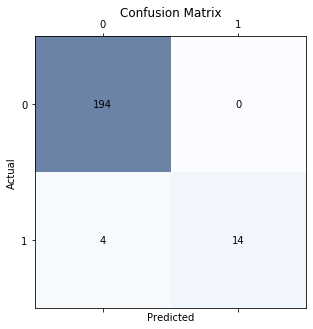

In [32]:
cm=confusion_matrix(ytest,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

212/212 [==============================] - 0s 46us/step


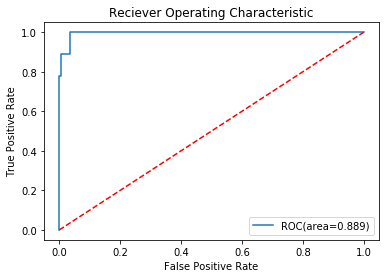

In [33]:
auc=roc_auc_score(ytest,pred)
fpr,tpr,thr=roc_curve(ytest,estimator.predict_proba(xtest)[:,1])
plt.plot(fpr,tpr,label='ROC(area=%0.3f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()